## Exploratory Data Analysis (EDA) for Real Estate Pricing

## Load Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Load the Dataset

In [2]:
housing_data = pd.read_csv("housing_data.csv")
housing_data

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave  None   
1              1       SC20       RL           80     9600   Pave  None   
2              2       SC60       RL           68    11250   Pave  None   
3              3       SC70       RL           60     9550   Pave  None   
4              4       SC60       RL           84    14260   Pave  None   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave  None   
1456        1456       SC20       RL           85    13175   Pave  None   
1457        1457       SC70       RL           66     9042   Pave  None   
1458        1458       SC20       RL           68     9717   Pave  None   
1459        1459       SC20       RL           75     9937   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
housing_data.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave  None      Reg   
1           1       SC20       RL           80     9600   Pave  None      Reg   
2           2       SC60       RL           68    11250   Pave  None      IR1   
3           3       SC70       RL           60     9550   Pave  None      IR1   
4           4       SC60       RL           84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Checking the shape of data

In [4]:
housing_data.shape

(1460, 81)

### Describe the data For Better Understanding

In [5]:
housing_data.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

# Drop the unnecessary single column

In [6]:
housing_data = housing_data.drop(["Unnamed: 0"],axis=1)

In [7]:
housing_data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave  None      Reg   
1          SC20       RL           80     9600   Pave  None      Reg   
2          SC60       RL           68    11250   Pave  None      IR1   
3          SC70       RL           60     9550   Pave  None      IR1   
4          SC60       RL           84    14260   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave  None      Reg   
1456       SC20       RL           85    13175   Pave  None      Reg   
1457       SC70       RL           66     9042   Pave  None      Reg   
1458       SC20       RL           68     9717   Pave  None      Reg   
1459       SC20       RL           75     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 80 columns]

# To watch the all Columns and all Rows

In [8]:
#pd.set_option('display.max_columns',None)

In [9]:
#pd.set_option('display.max_rows',None)

In [10]:
housing_data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave  None      Reg   
1          SC20       RL           80     9600   Pave  None      Reg   
2          SC60       RL           68    11250   Pave  None      IR1   
3          SC70       RL           60     9550   Pave  None      IR1   
4          SC60       RL           84    14260   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave  None      Reg   
1456       SC20       RL           85    13175   Pave  None      Reg   
1457       SC70       RL           66     9042   Pave  None      Reg   
1458       SC20       RL           68     9717   Pave  None      Reg   
1459       SC20       RL           75     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [11]:
housing_data['MoSold'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}, inplace= True)

# Renaming of the all column for better understanding

In [12]:
columns_name = ["Identifies the type of dwelling involved in the sale","Identifies the general zoning classification of the sale","Linear feet of street connected to the property","Lot size in square feet","Type of road access to property","Type of alley access to property","General shape of property","Flatness of the property","Type of utilities available","Lot configuration","Slope of property","Physical locations within Ames city limits","Proximity to various conditions","Proximity to various conditions if more than one is present","Type of dwelling","Style of dwelling","Rates the overall material and finish of the house","Rates the overall condition of the house","Original construction date","Remodel date same as construction date if no remodeling or additions","Type of roof","Roof material","Exterior covering on the house","Exterior covering on house if more than one material","Masonry veneer type","Masonry veneer area in square feet","Evaluates the quality of the material on the exterior","Evaluates the present condition of the material on the exterior","Type of foundation","Evaluates the height of the basement","Evaluate the general condition of the basement","Refers to walkout or garden-level walls","Rating of basement finished area","Type 1 finished square feet","Rating of basement finished area if multiple types","Type 2 finished square feet","Unfinished square feet of basement area","Total square feet of basement area","Type of heating","Heating quality and condition","Central air conditioning","Electrical system","First Floor square feet","Second floor square feet","Low quality finished square feet all floors","Above grade ground living area square feet","Basement full bathrooms","Basement half bathrooms","Full bathrooms above grade","Half baths above grade","Bedrooms above grade does not include basement bedrooms","Kitchens above grade","Kitchen Quality","Total rooms above grade does not include bathrooms","Home functionality Assume typical unless deductions are warranted","Number of fireplaces",
"Fireplace quality","Garage location","The year garage was built","Interior finish of the garage","Size of garage in car capacity","Size of garage in square feet","Garage quality","Garage condition", 
"Paved driveway","Wood deck area in square feet","Open porch area in square feet","Enclosed porch area in square feet","Three season porch area in square feet","Screen porch area in square feet","Pool area in square feet","Pool quality","Fence Quality","Miscellaneous feature not covered in other categories","Value of miscellaneous feature","Month Sold","Year Sold","Type of sale","Condition of sale","Sale price"]

In [13]:
housing_data.columns = columns_name

In [14]:
housing_data

Identifies the type of dwelling involved in the sale  \
0                                                  SC60     
1                                                  SC20     
2                                                  SC60     
3                                                  SC70     
4                                                  SC60     
...                                                 ...     
1455                                               SC60     
1456                                               SC20     
1457                                               SC70     
1458                                               SC20     
1459                                               SC20     

     Identifies the general zoning classification of the sale  \
0                                                    RL         
1                                                    RL         
2                                                    RL         
3                                                    RL         
4                                                    RL         
...                                                 ...         
1455                                                 RL         
1456                                                 RL         
1457                                                 RL         
1458                                                 RL         
1459                                                 RL         

      Linear feet of street connected to the property  \
0                                                  65   
1                                                  80   
2                                                  68   
3                                                  60   
4                                                  84   
...                                               ...   
1455                                               62   
1456                                               85   
1457                                               66   
1458                                               68   
1459                                               75   

      Lot size in square feet Type of road access to property  \
0                        8450                            Pave   
1                        9600                            Pave   
2                       11250                            Pave   
3                        9550                            Pave   
4                       14260                            Pave   
...                       ...                             ...   
1455                     7917                            Pave   
1456                    13175                            Pave   
1457                     9042                            Pave   
1458                     9717                            Pave   
1459                     9937                            Pave   

     Type of alley access to property General shape of property  \
0                                None                       Reg   
1                                None                       Reg   
2                                None                       IR1   
3                                None                       IR1   
4                                None                       IR1   
...                               ...                       ...   
1455                             None                       Reg   
1456                             None                       Reg   
1457                             None                       Reg   
1458                             None                       Reg   
1459                             None                       Reg   

     Flatness of the property Type of utilities available Lot configuration  \
0                         Lvl                      AllPub            Inside   
1                         Lvl                      AllPub     

# Renaming all the element type in columns

In [15]:
housing_data['Identifies the type of dwelling involved in the sale'].replace({'SC20':20,'SC30':30,'SC40':40,'SC45':45,'SC50':50,'SC60':60,'SC70':70,'SC75':75,'SC80':80,'SC85':85,'SC90':90,'SC120':120,'SC150':150,'SC160':160,'SC180':180,'SC190':190},inplace=True)

In [16]:
housing_data.head()

Identifies the type of dwelling involved in the sale  \
0                                                 60      
1                                                 20      
2                                                 60      
3                                                 70      
4                                                 60      

  Identifies the general zoning classification of the sale  \
0                                                 RL         
1                                                 RL         
2                                                 RL         
3                                                 RL         
4                                                 RL         

   Linear feet of street connected to the property  Lot size in square feet  \
0                                               65                     8450   
1                                               80                     9600   
2                                               68                    11250   
3                                               60                     9550   
4                                               84                    14260   

  Type of road access to property Type of alley access to property  \
0                            Pave                             None   
1                            Pave                             None   
2                            Pave                             None   
3                            Pave                             None   
4                            Pave                             None   

  General shape of property Flatness of the property  \
0                       Reg                      Lvl   
1                       Reg                      Lvl   
2                       IR1                      Lvl   
3                       IR1                      Lvl   
4                       IR1                      Lvl   

  Type of utilities available Lot configuration  ... Pool area in square feet  \
0                      AllPub            Inside  ...                        0   
1                      AllPub               FR2  ...                        0   
2                      AllPub            Inside  ...                        0   
3                      AllPub            Corner  ...                        0   
4                      AllPub               FR2  ...                        0   

  Pool quality Fence Quality  \
0           No            No   
1           No            No   
2           No            No   
3           No            No   
4           No            No   

  Miscellaneous feature not covered in other categories  \
0                                                 No      
1                                                 No      
2                                                 No      
3                                                 No      
4                                                 No      

  Value of miscellaneous feature Month Sold  Year Sold  Type of sale  \
0                              0          2       2008            WD   
1                              0          5       2007            WD   
2                              0          9       2008            WD   
3                              0          2       2006            WD   
4                              0         12       2008            WD   

   Condition of sale  Sale price  
0             Normal      208500  
1             Normal      181500  
2             Normal      223500  
3            Abnorml      140000  
4             Normal      250000  

[5 rows x 80 columns]

In [17]:
housing_data['Identifies the general zoning classification of the sale'].replace({'A':'Agriculture','C':'Commercial','FV':'Floating Village Residential','I':'Industrial','RH':'Residential High-Density','RL':'Residential Low-Density','RP':'Residential Low-Density Park','RM':'Residential Medium Density'},inplace=True)

In [18]:
housing_data['Type of road access to property'].replace({'Grvl':'Gravel','Pave':'Paved'},inplace=True)

In [19]:
housing_data['Type of alley access to property'].replace({'Grvl':'Gravel','Pave':'Paved','NA':'No alley access'},inplace=True)

In [20]:
housing_data['General shape of property'].replace({'Reg':'Regular','IR1':'Slightly irregular','IR2':'Moderately Irregular','IR3':'Irregular'},inplace=True)

In [21]:
housing_data['Flatness of the property'].replace({'Lvl':'Level','Bnk':'Banked','HLS':'Hillside','Low':'Low Depression'},inplace=True)

In [22]:
housing_data['Type of utilities available'].replace({'AllPub':'All public Utilities','NoSewr':'Electricity, Gas, and Water (Septic Tank)','NoSeWa':'Electricity and Gas Only','ELO':'Electricity only'},inplace=True)

In [23]:
housing_data['Lot configuration'].replace({'Inside':'Inside lot','Corner':'Corner lot','CulDSac':'Cul-de-sac','FR2':'Frontage on 2 sides of the property','FR3':'Frontage on 3 sides of the property'},inplace=True)

In [24]:
housing_data['Slope of property'].replace({'Gtl':'Gentle slope','Mod':'Moderate slope','Sev':'Severe Slope'},inplace=True)

In [25]:
housing_data['Physical locations within Ames city limits'].replace({'Blmngtn':'Bloomington Heights','Blueste':'Bluestem','BrDale':'Briardale','BrkSide':'Brookside','ClearCr':'Clear Creek','CollgCr':'College Creek','Crawfor':'Crawford','Edwards':'Edwards','Gilbert':'Gilbert','IDOTRR':'Iowa DOT and Rail Road','MeadowV':'Meadow Village','Mitchel':'Mitchell','Names':'North Ames','NoRidge':'Northridge','NPkVill':'Northpark Villa','NridgHt':'Northridge Heights','NWAmes':'Northwest Ames','OldTown':'Old Town','SWISU':'South & West of Iowa State University','Sawyer':'Sawyer','SawyerW':'Sawyer West','Somerst':'Somerset','StoneBr':'Stone Brook','Timber':'Timberland','Veenker':'Veenker'},inplace=True)

In [26]:
housing_data['Proximity to various conditions'].replace({'Artery':'Adjacent to arterial street','Feedr':'Adjacent to feeder street','Norm':'Normal','RRNn':'Within 200 of North-South Railroad','RRAn':'Adjacent to North-South Railroad','PosN':'Near positive off-site feature--park, greenbelt, etc.','PosA':'Adjacent to positive off-site feature','RRNe':'Within 200 of East-West Railroad','RRAe':'Adjacent to East-West Railroad'},inplace=True)

In [27]:
housing_data['Proximity to various conditions if more than one is present'].replace({'Artery':'Adjacent to arterial street','Feedr':'Adjacent to feeder street','Norm':'Normal','RRNn':'Within 200 of North-South Railroad','RRAn':'Adjacent to North-South Railroad','PosN':'Near positive off-site feature--park, greenbelt, etc.','PosA':'Adjacent to positive off-site feature','RRNe':'Within 200 of East-West Railroad','RRAe':'Adjacent to East-West Railroad'},inplace=True)

In [28]:
housing_data['Type of dwelling'].replace({'1Fam':'Single-family Detached',' 2FmCon':'Two-family Conversion; originally built as one-family dwelling','Duplx':'Duplex','TwnhsE':'Townhouse End Unit','TwnhsI':'Townhouse Inside Unit'},inplace=True)

In [29]:
housing_data['Style of dwelling'].replace({'1Story':'One story','1.5Fin':'One and one-half story: 2nd level finished','1.5Unf':'One and one-half story: 2nd level unfinished','2Story':'Two-story','2.5Fin':'Two and one-half story: 2nd level finished','2.5Unf':'Two and one-half story: 2nd level unfinished','SFoyer':'Split Foyer','SLvl':'Split Level'},inplace=True)

In [30]:
housing_data['Roof material'].replace({'ClyTile':'Clay or Tile','CompShg':'Standard (Composite) Shingle','Membran':'Membrane','Tar&Grv':'Gravel & Tar','WdShake':'Wood Shakes','WdShngl':'Wood Shingles'},inplace=True)

In [31]:
housing_data['Exterior covering on the house'].replace({'AsbShng':'Asbestos Shingles','AsphShn':'Asphalt Shingles','BrkComm':'Brick Common','BrkFace':'Brick Face','CBlock':'Cinder Block','CemntBd':'Cement Board','HdBoard':'Hard Board','ImStucc':'Imitation Stucco','MetalSd':'Metal Siding','VinylSd':'Vinyl Siding','Wd Sdng':'Wood Siding','WdShing':'Wood Shingles'},inplace=True)

In [32]:
housing_data['Exterior covering on house if more than one material'].replace({'AsbShng':'Asbestos Shingles','AsphShn':'Asphalt Shingles','BrkComm':'Brick Common','BrkFace':'Brick Face','CBlock':'Cinder Block','CemntBd':'Cement Board','HdBoard':'Hard Board','ImStucc':'Imitation Stucco','MetalSd':'Metal Siding','VinylSd':'Vinyl Siding','Wd Sdng':'Wood Siding','WdShing':'Wood Shingles'},inplace=True)

In [33]:
housing_data['Masonry veneer type'].replace({'BrkCmn':'Brick Common','BrkFace':'Brick Face','CBlock':'Cinder Block'},inplace=True)

In [34]:
housing_data['Evaluates the quality of the material on the exterior'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor'},inplace=True)

In [35]:
housing_data['Evaluates the present condition of the material on the exterior'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor'},inplace=True)

In [36]:
housing_data['Type of foundation'].replace({'BrkTil':'Brick & Tile','CBlock':'Cinder Block','PConc':'Poured Contrete'},inplace=True)

In [37]:
housing_data['Evaluates the height of the basement'].replace({'Ex':'Excellent (100+ inches)','Gd':'Good (90-99 inches)','TA':'Typical (80-89 inches)','Fa':'Fair (70-79 inches)','Po':'Poor (<70 inches)','NA':'No'},inplace=True)

In [38]:
housing_data['Evaluate the general condition of the basement'].replace({'Ex':'Excellent','Gd':'Good','TA':'Typical-slight dampness allowed','Fa':'Fair-dampness or some cracking or settling','Po':'Poor-Severe cracking, settling, or wetness','NA':'No'},inplace=True)

In [39]:
housing_data['Refers to walkout or garden-level walls'].replace({'Gd':'Good Exposure','Av':'Average Exposure','Mn':'Mimimum Exposure','No':'No Exposure','NA':'No'},inplace=True)

In [40]:
housing_data['Rating of basement finished area'].replace({'GLQ':'Good Living Quarters','ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters','Rec':'Average Rec Room','LwQ':'Low Quality','Unf':'Unfinished','NA':'No'},inplace=True)

In [41]:
housing_data['Rating of basement finished area if multiple types'].replace({'GLQ':'Good Living Quarters','ALQ':'Average Living Quarters','BLQ':'Below Average Living Quarters','Rec':'Average Rec Room','LwQ':'Low Quality','Unf':'Unfinished','NA':'No'},inplace=True)

In [42]:
housing_data['Type of heating'].replace({'Floor':'Floor Furnace','GasA':'Gas forced warm air furnace','GasW':'Gas hot water or steam heat','Grav':'Gravity furnace','OthW':'Hot water or steam heat other than gas','Wall':'Wall furnace'},inplace=True)

In [43]:
housing_data['Heating quality and condition'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor'},inplace=True)

In [44]:
housing_data['Central air conditioning'].replace({'N':'No','Y':'Yes'},inplace=True)

In [45]:
housing_data['Electrical system'].replace({'SBrkr':'Standard Circuit Breakers & Romex','FuseA':'Fuse Box over 60 AMP and all Romex wiring (Average)','FuseF':'60 AMP Fuse Box and mostly Romex wiring (Fair)','FuseP':'60 AMP Fuse Box and mostly knob & tube wiring (poor)','Mix':'Mixed'},inplace=True)

In [46]:
housing_data['Kitchen Quality'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor'},inplace=True)

In [47]:
housing_data['Home functionality Assume typical unless deductions are warranted'].replace({'Typ':'Typical Functionality','Min1':'Minor Deductions 1','Min2':'Minor Deductions 2','Mod':'Moderate Deductions','Maj1':'Major Deductions 1','Maj2':'Major Deductions 2','Sev':'Severely Damaged','Sal':'Salvage only'},inplace=True)

In [48]:
housing_data['Fireplace quality'].replace({'Ex':'Excellent-Exceptional Masonry Fireplace','Gd':'Good-Masonry Fireplace on the main level','TA':'Average-Prefabricated Fireplace in the main living area or Masonry Fireplace in the basement','Fa':'Fair-Prefabricated Fireplace in the basement','Po':'Poor-Ben Franklin Stove','NA':'No'},inplace=True)

In [49]:
housing_data['Garage location'].replace({'2Types':'More than one type of garage','Attchd':'Attached to the home','Basment':'Basement Garage','BuiltIn':'Built-In (Garage part of the house-typically has room above the garage)','CarPort':'Car Port','Detchd':'Detached from home','NA':'No'},inplace=True)

In [50]:
housing_data['Interior finish of the garage'].replace({'Fin':'Finished','RFn':'Rough Finished','Unf':'Unfinished','NA':'No'},inplace=True)

In [51]:
housing_data['Garage quality'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor','NA':'No'},inplace=True)

In [52]:
housing_data['Garage condition'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','Po':'Poor','NA':'No'},inplace=True)

In [53]:
housing_data['Paved driveway'].replace({'Y':'Paved','P':'Partial Pavement','N':'Dirt/Gravel'},inplace=True)

In [54]:
housing_data['Pool quality'].replace({'Ex':'Excellent','Gd':'Good','TA':'Average/Typical','Fa':'Fair','NA':'No'},inplace=True)

In [55]:
housing_data['Fence Quality'].replace({'GdPrv':'Good Privacy','MnPrv':'Minimum Privacy','GdWo':'Good Wood','MnWw':'Minimum Wood/Wire','NA':'No'},inplace=True)

In [56]:
housing_data['Miscellaneous feature not covered in other categories'].replace({'Elev':'Elevator','Gar2':'2nd Garage (if not described in garage section)','Othr':'Other','Shed':'Shed(over 100 SF)','TenC':'Tennis Court','NA':'None'},inplace=True)

In [57]:
housing_data['Type of sale'].replace({'WD':'Warranty Deed-Conventional','CWD':'Warranty Deed-Cash','VWD':'Warranty Deed-VA Loan','New':'Home just constructed and sold','COD':'Court Officer Deed/Estate','Con':'Contract 15% Down payment regular terms','ConLw':'Contract Low Down payment and low interest','ConLI':'Contract Low Interest','ConLD':'Contract Low Down','Oth':'Other'},inplace=True)

In [58]:
housing_data['Condition of sale'].replace({'Normal':'Normal Sale','Abnorml':'Abnormal Sale-trade, foreclosure, short sale','AdjLand':'Adjoining Land Purchase','Alloca':'Allocation-two linked properties with separate deeds,typically condo with a garage unit','Family':'Sale between family members','Partial':'Home was not completed when last assessed (associated with New Homes)'},inplace=True)

In [59]:
housing_data.rename(columns = {'Sale\xa0price':'Sale price'},inplace=True)

In [60]:
housing_data.head()

Identifies the type of dwelling involved in the sale  \
0                                                 60      
1                                                 20      
2                                                 60      
3                                                 70      
4                                                 60      

  Identifies the general zoning classification of the sale  \
0                            Residential Low-Density         
1                            Residential Low-Density         
2                            Residential Low-Density         
3                            Residential Low-Density         
4                            Residential Low-Density         

   Linear feet of street connected to the property  Lot size in square feet  \
0                                               65                     8450   
1                                               80                     9600   
2                                               68                    11250   
3                                               60                     9550   
4                                               84                    14260   

  Type of road access to property Type of alley access to property  \
0                           Paved                             None   
1                           Paved                             None   
2                           Paved                             None   
3                           Paved                             None   
4                           Paved                             None   

  General shape of property Flatness of the property  \
0                   Regular                    Level   
1                   Regular                    Level   
2        Slightly irregular                    Level   
3        Slightly irregular                    Level   
4        Slightly irregular                    Level   

  Type of utilities available                    Lot configuration  ...  \
0        All public Utilities                           Inside lot  ...   
1        All public Utilities  Frontage on 2 sides of the property  ...   
2        All public Utilities                           Inside lot  ...   
3        All public Utilities                           Corner lot  ...   
4        All public Utilities  Frontage on 2 sides of the property  ...   

  Pool area in square feet Pool quality Fence Quality  \
0                        0           No            No   
1                        0           No            No   
2                        0           No            No   
3                        0           No            No   
4                        0           No            No   

  Miscellaneous feature not covered in other categories  \
0                                                 No      
1                                                 No      
2                                                 No      
3                                                 No      
4                                                 No      

  Value of miscellaneous feature Month Sold  Year Sold  \
0                              0          2       2008   
1                              0          5       2007   
2                              0          9       2008   
3                              0          2       2006   
4                              0         12       2008   

                 Type of sale                             Condition of sale  \
0  Warranty Deed-Conventional                                   Normal Sale   
1  Warranty Deed-Conventional                                   Normal Sale   
2  Warranty Deed-Conventional                                   Normal Sale   
3  Warranty Deed-Conventional  Abnormal Sale-trade, foreclosure, short sale   
4  Warranty Deed-Conventional                                   Normal Sale   

   Sale price  
0      208500  
1      181500  
2      223500  
3    

In [61]:
housing_data.columns

Index(['Identifies the type of dwelling involved in the sale',
       'Identifies the general zoning classification of the sale',
       'Linear feet of street connected to the property',
       'Lot size in square feet', 'Type of road access to property',
       'Type of alley access to property', 'General shape of property',
       'Flatness of the property', 'Type of utilities available',
       'Lot configuration', 'Slope of property',
       'Physical locations within Ames city limits',
       'Proximity to various conditions',
       'Proximity to various conditions if more than one is present',
       'Type of dwelling', 'Style of dwelling',
       'Rates the overall material and finish of the house',
       'Rates the overall condition of the house',
       'Original construction date',
       'Remodel date same as construction date if no remodeling or additions',
       'Type of roof', 'Roof material', 'Exterior covering on the house',
       'Exterior covering on house if mor

# Get the Brief Information from Dataset

In [62]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Identifies the type of dwelling involved in the sale                  1460 non-null   int64  
 1   Identifies the general zoning classification of the sale              1460 non-null   object 
 2   Linear feet of street connected to the property                       1460 non-null   int64  
 3   Lot size in square feet                                               1460 non-null   int64  
 4   Type of road access to property                                       1460 non-null   object 
 5   Type of alley access to property                                      1460 non-null   object 
 6   General shape of property                                             1460 non-null   object 
 7

## Numerical variables

In [63]:
int_features = housing_data.select_dtypes(include=['int64']).columns
print('Total number of integer features:',int_features.shape[0] )

print('Integer feature names:', int_features.tolist())

Total number of integer features: 36
Integer feature names: ['Identifies the type of dwelling involved in the sale', 'Linear feet of street connected to the property', 'Lot size in square feet', 'Rates the overall material and finish of the house', 'Rates the overall condition of the house', 'Original construction date', 'Remodel date same as construction date if no remodeling or additions', 'Masonry veneer area in square feet', 'Type 1 finished square feet', 'Type 2 finished square feet', 'Unfinished square feet of basement area', 'Total square feet of basement area', 'First Floor square feet', 'Second floor square feet', 'Low quality finished square feet all floors', 'Above grade ground living area square feet', 'Basement full bathrooms', 'Basement half bathrooms', 'Full bathrooms above grade', 'Half baths above grade', 'Bedrooms above grade does not include basement bedrooms', 'Kitchens above grade', 'Total rooms above grade does not include bathrooms', 'Number of fireplaces', 'Size

## Numerical Floating variables

In [64]:
float_features = housing_data.select_dtypes(include=['float64']).columns
print('Total number of float features:',float_features.shape[0] )

print('floating feature names:', float_features.tolist())

Total number of float features: 1
floating feature names: ['The year garage was built']


## Categorical variables

In [65]:
cate_features = housing_data.select_dtypes(include=['object']).columns
print('Total number of categorical features:',cate_features.shape[0] )

print('categorical feature names:', cate_features.tolist())

Total number of categorical features: 43
categorical feature names: ['Identifies the general zoning classification of the sale', 'Type of road access to property', 'Type of alley access to property', 'General shape of property', 'Flatness of the property', 'Type of utilities available', 'Lot configuration', 'Slope of property', 'Physical locations within Ames city limits', 'Proximity to various conditions', 'Proximity to various conditions if more than one is present', 'Type of dwelling', 'Style of dwelling', 'Type of roof', 'Roof material', 'Exterior covering on the house', 'Exterior covering on house if more than one material', 'Masonry veneer type', 'Evaluates the quality of the material on the exterior', 'Evaluates the present condition of the material on the exterior', 'Type of foundation', 'Evaluates the height of the basement', 'Evaluate the general condition of the basement', 'Refers to walkout or garden-level walls', 'Rating of basement finished area', 'Rating of basement fini

# Get the Stastical Information of Numerical Features

In [66]:
housing_data.describe()

Identifies the type of dwelling involved in the sale  \
count                                        1460.000000      
mean                                           56.897260      
std                                            42.300571      
min                                            20.000000      
25%                                            20.000000      
50%                                            50.000000      
75%                                            70.000000      
max                                           190.000000      

       Linear feet of street connected to the property  \
count                                      1460.000000   
mean                                         57.623288   
std                                          34.664304   
min                                           0.000000   
25%                                          42.000000   
50%                                          63.000000   
75%                                          79.000000   
max                                         313.000000   

       Lot size in square feet  \
count              1460.000000   
mean              10516.828082   
std                9981.264932   
min                1300.000000   
25%                7553.500000   
50%                9478.500000   
75%               11601.500000   
max              215245.000000   

       Rates the overall material and finish of the house  \
count                                        1460.000000    
mean                                            6.099315    
std                                             1.382997    
min                                             1.000000    
25%                                             5.000000    
50%                                             6.000000    
75%                                             7.000000    
max                                            10.000000    

       Rates the overall condition of the house  Original construction date  \
count                               1460.000000                 1460.000000   
mean                                   5.575342                 1971.267808   
std                                    1.112799                   30.202904   
min                                    1.000000                 1872.000000   
25%                                    5.000000                 1954.000000   
50%                                    5.000000                 1973.000000   
75%                                    6.000000                 2000.000000   
max                                    9.000000                 2010.000000   

       Remodel date same as construction date if no remodeling or additions  \
count                                        1460.000000                      
mean                                         1984.865753                      
std                                            20.645407                      
min                                          1950.000000                      
25%                                          1967.000000                      
50%                                          1994.000000                      
75%                                          2004.000000                      
max                                          2010.000000                      

       Masonry veneer area in square feet  Type 1 finished square feet  \
count                         1460.000000                  1460.000000   
mean                           103.117123                   443.639726   
std                            180.731373                   456.098091   
min                              0.000000                     0.000000   
25%                              0.000000                     0.000000   
50%                              0.000000                   383.500000   
75%                            164.250000                   712.250000   
max                           1600.000000  

In [67]:
housing_data.describe().shape

(8, 37)

# Handling Missing Values

<Axes: >

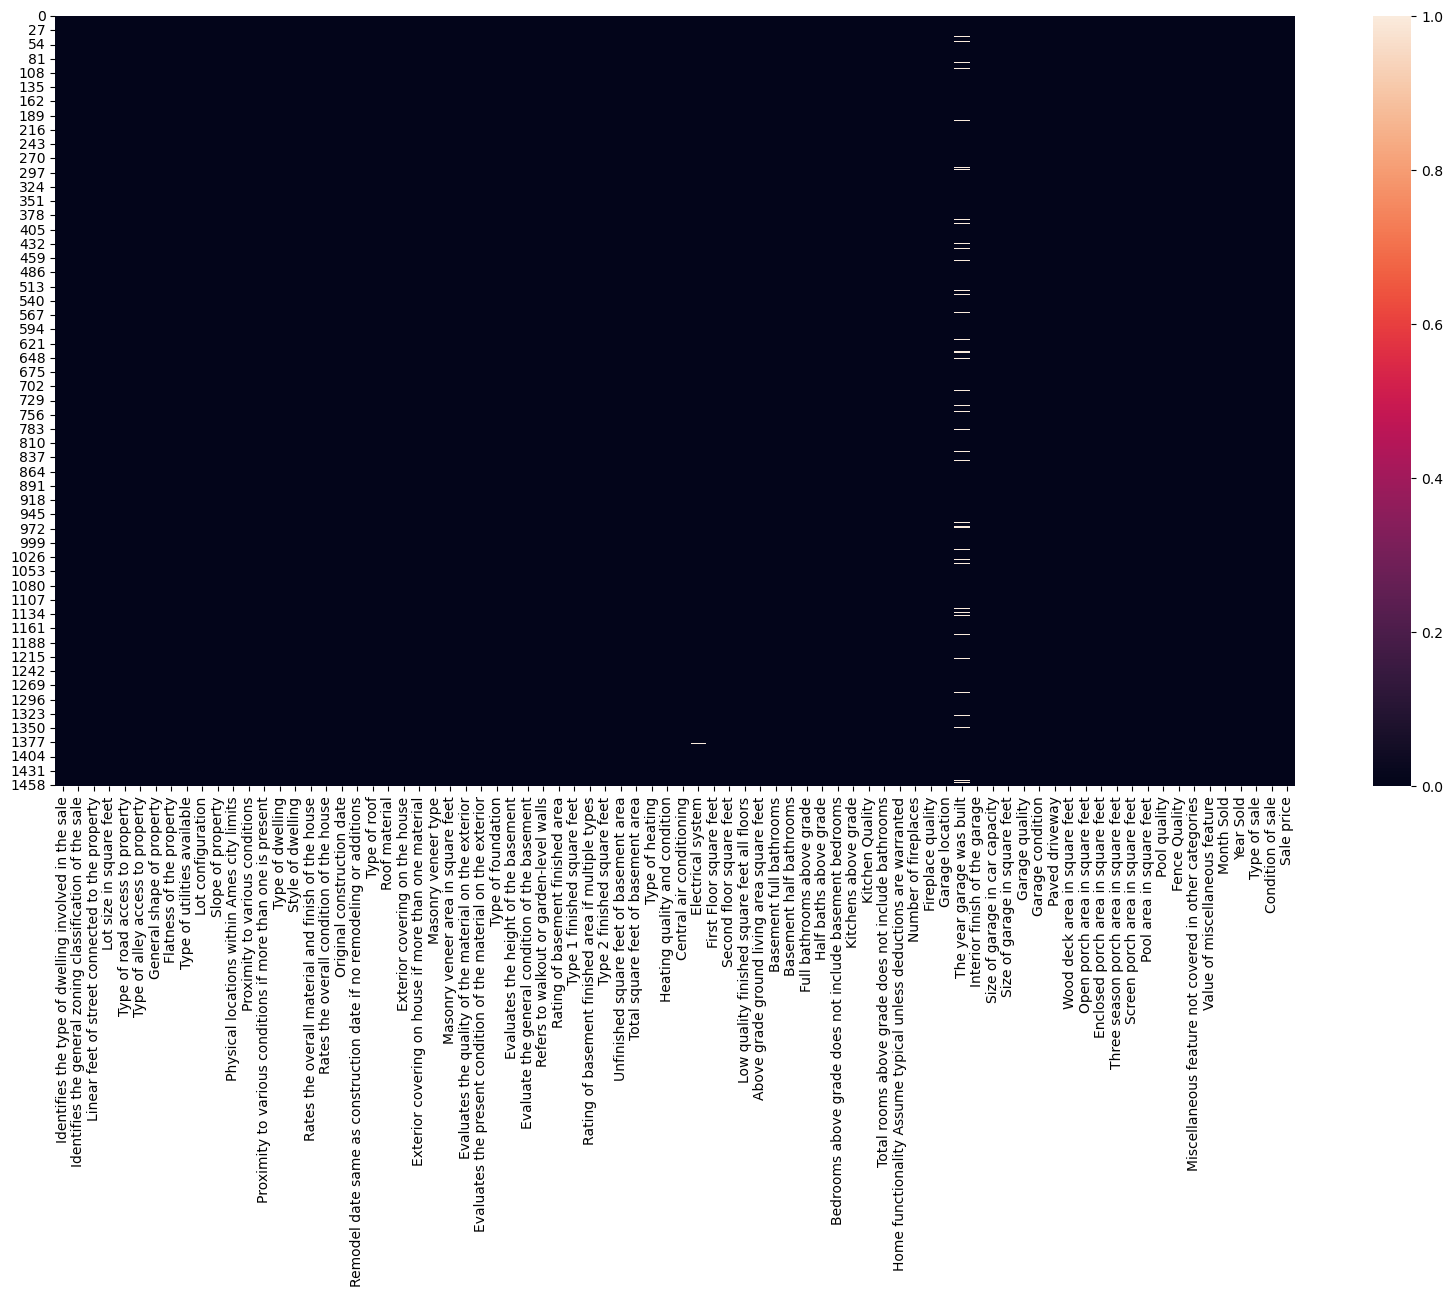

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(housing_data.isnull())

### Checking the Null Values

In [69]:
null_count = housing_data.isnull().sum()
null_count

Identifies the type of dwelling involved in the sale        0
Identifies the general zoning classification of the sale    0
Linear feet of street connected to the property             0
Lot size in square feet                                     0
Type of road access to property                             0
                                                           ..
Month Sold                                                  0
Year Sold                                                   0
Type of sale                                                0
Condition of sale                                           0
Sale price                                                  0
Length: 80, dtype: int64

### Checking the Null Values with percentage

In [70]:
null_percent = housing_data.isnull().sum()/housing_data.shape[0]*100
null_percent


Identifies the type of dwelling involved in the sale        0.0
Identifies the general zoning classification of the sale    0.0
Linear feet of street connected to the property             0.0
Lot size in square feet                                     0.0
Type of road access to property                             0.0
                                                           ... 
Month Sold                                                  0.0
Year Sold                                                   0.0
Type of sale                                                0.0
Condition of sale                                           0.0
Sale price                                                  0.0
Length: 80, dtype: float64

# Find The Duplicate Values

In [71]:
housing_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [72]:
housing_data.duplicated().sum()

0

# Treating the Missing Values

In [73]:
housing_data['Electrical system'].value_counts()

Standard Circuit Breakers & Romex                       1334
Fuse Box over 60 AMP and all Romex wiring (Average)       94
60 AMP Fuse Box and mostly Romex wiring (Fair)            27
60 AMP Fuse Box and mostly knob & tube wiring (poor)       3
Mixed                                                      1
Name: Electrical system, dtype: int64

In [74]:
housing_data['Electrical system'].unique()

array(['Standard Circuit Breakers & Romex',
       '60 AMP Fuse Box and mostly Romex wiring (Fair)',
       'Fuse Box over 60 AMP and all Romex wiring (Average)',
       '60 AMP Fuse Box and mostly knob & tube wiring (poor)', 'Mixed',
       nan], dtype=object)

In [75]:
Electrical_system_mode = housing_data['Electrical system'].mode()[0]
Electrical_system_mode

'Standard Circuit Breakers & Romex'

In [76]:
housing_data['Electrical system']

0                       Standard Circuit Breakers & Romex
1                       Standard Circuit Breakers & Romex
2                       Standard Circuit Breakers & Romex
3                       Standard Circuit Breakers & Romex
4                       Standard Circuit Breakers & Romex
                              ...                        
1455                    Standard Circuit Breakers & Romex
1456                    Standard Circuit Breakers & Romex
1457                    Standard Circuit Breakers & Romex
1458    Fuse Box over 60 AMP and all Romex wiring (Ave...
1459                    Standard Circuit Breakers & Romex
Name: Electrical system, Length: 1460, dtype: object

In [77]:
housing_data['Electrical system'].replace(np.nan, Electrical_system_mode ,inplace=True)

In [78]:
housing_data['Electrical system'].isnull().sum()

0

In [79]:
general_zoning_mode = housing_data['Identifies the general zoning classification of the sale'].mode()[0]
general_zoning_mode

'Residential Low-Density'

In [80]:
housing_data['Identifies the general zoning classification of the sale'].replace(np.nan, general_zoning_mode ,inplace=True)

In [81]:
height_of_basement_mode = housing_data['Evaluates the height of the basement'].mode()[0]
condition_of_basement_mode = housing_data['Evaluate the general condition of the basement'].mode()[0]
fireplace_quality_mode = housing_data['Fireplace quality'].mode()[0]
garage_location_mode = housing_data['Garage location'].mode()[0]

In [82]:
housing_data['Evaluates the height of the basement'].replace(np.nan, height_of_basement_mode ,inplace=True)
housing_data['Evaluate the general condition of the basement'].replace(np.nan, condition_of_basement_mode ,inplace=True)
housing_data['Fireplace quality'].replace(np.nan, fireplace_quality_mode ,inplace=True)
housing_data['Garage location'].replace(np.nan, garage_location_mode ,inplace=True)

In [83]:
garage_interior_mode = housing_data['Interior finish of the garage'].mode()[0]
garage_quality_mode = housing_data['Garage quality'].mode()[0]
garage_condition_mode = housing_data['Garage condition'].mode()[0]
masonry_veneer_mode = housing_data['Masonry veneer type'].mode()[0]
masonry_veneer_area_mode = housing_data['Masonry veneer area in square feet'].mode()[0]

In [84]:
housing_data['Interior finish of the garage'].replace(np.nan, garage_interior_mode ,inplace=True)
housing_data['Garage quality'].replace(np.nan, garage_quality_mode ,inplace=True)
housing_data['Garage condition'].replace(np.nan, garage_condition_mode ,inplace=True)
housing_data['Masonry veneer type'].replace(np.nan, masonry_veneer_mode ,inplace=True)
housing_data['Masonry veneer area in square feet'].replace(np.nan, masonry_veneer_area_mode ,inplace=True)

In [85]:
garden_level_mode = housing_data['Refers to walkout or garden-level walls'].mode()[0]
basement_finished_area_mode = housing_data['Rating of basement finished area if multiple types'].mode()[0]

In [86]:
housing_data['Refers to walkout or garden-level walls'].replace(np.nan, garden_level_mode ,inplace=True)
housing_data['Rating of basement finished area if multiple types'].replace(np.nan, basement_finished_area_mode ,inplace=True)

In [87]:
linear_feet_street_mean = housing_data['Linear feet of street connected to the property'].mean()
housing_data['Linear feet of street connected to the property'].fillna(housing_data['Linear feet of street connected to the property'].mean(),inplace=True)

In [88]:
housing_data['Linear feet of street connected to the property'].isnull().sum()

0

In [89]:
housing_data['The year garage was built'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: The year garage was built, Length: 1460, dtype: float64>

In [90]:
housing_data['The year garage was built'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [91]:
garage_yr_built_mean = housing_data['The year garage was built'].mean()
housing_data['The year garage was built'].fillna(housing_data['The year garage was built'].mean(),inplace=True)

In [92]:
housing_data['The year garage was built']= housing_data['The year garage was built'].astype(int)

In [93]:
housing_data['The year garage was built']

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: The year garage was built, Length: 1460, dtype: int32

In [94]:
housing_data['The year garage was built'].isnull().sum()

0

In [95]:
housing_data['The year garage was built'].describe()

count    1460.000000
mean     1978.478082
std        23.994863
min      1900.000000
25%      1962.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: The year garage was built, dtype: float64

In [96]:
housing_data.head()

Identifies the type of dwelling involved in the sale  \
0                                                 60      
1                                                 20      
2                                                 60      
3                                                 70      
4                                                 60      

  Identifies the general zoning classification of the sale  \
0                            Residential Low-Density         
1                            Residential Low-Density         
2                            Residential Low-Density         
3                            Residential Low-Density         
4                            Residential Low-Density         

   Linear feet of street connected to the property  Lot size in square feet  \
0                                               65                     8450   
1                                               80                     9600   
2                                               68                    11250   
3                                               60                     9550   
4                                               84                    14260   

  Type of road access to property Type of alley access to property  \
0                           Paved                             None   
1                           Paved                             None   
2                           Paved                             None   
3                           Paved                             None   
4                           Paved                             None   

  General shape of property Flatness of the property  \
0                   Regular                    Level   
1                   Regular                    Level   
2        Slightly irregular                    Level   
3        Slightly irregular                    Level   
4        Slightly irregular                    Level   

  Type of utilities available                    Lot configuration  ...  \
0        All public Utilities                           Inside lot  ...   
1        All public Utilities  Frontage on 2 sides of the property  ...   
2        All public Utilities                           Inside lot  ...   
3        All public Utilities                           Corner lot  ...   
4        All public Utilities  Frontage on 2 sides of the property  ...   

  Pool area in square feet Pool quality Fence Quality  \
0                        0           No            No   
1                        0           No            No   
2                        0           No            No   
3                        0           No            No   
4                        0           No            No   

  Miscellaneous feature not covered in other categories  \
0                                                 No      
1                                                 No      
2                                                 No      
3                                                 No      
4                                                 No      

  Value of miscellaneous feature Month Sold  Year Sold  \
0                              0          2       2008   
1                              0          5       2007   
2                              0          9       2008   
3                              0          2       2006   
4                              0         12       2008   

                 Type of sale                             Condition of sale  \
0  Warranty Deed-Conventional                                   Normal Sale   
1  Warranty Deed-Conventional                                   Normal Sale   
2  Warranty Deed-Conventional                                   Normal Sale   
3  Warranty Deed-Conventional  Abnormal Sale-trade, foreclosure, short sale   
4  Warranty Deed-Conventional                                   Normal Sale   

   Sale price  
0      208500  
1      181500  
2      223500  
3    

In [97]:
housing_data.isnull().sum().to_dict()

{'Identifies the type of dwelling involved in the sale': 0,
 'Identifies the general zoning classification of the sale': 0,
 'Linear feet of street connected to the property': 0,
 'Lot size in square feet': 0,
 'Type of road access to property': 0,
 'Type of alley access to property': 0,
 'General shape of property': 0,
 'Flatness of the property': 0,
 'Type of utilities available': 0,
 'Lot configuration': 0,
 'Slope of property': 0,
 'Physical locations within Ames city limits': 0,
 'Proximity to various conditions': 0,
 'Proximity to various conditions if more than one is present': 0,
 'Type of dwelling': 0,
 'Style of dwelling': 0,
 'Rates the overall material and finish of the house': 0,
 'Rates the overall condition of the house': 0,
 'Original construction date': 0,
 'Remodel date same as construction date if no remodeling or additions': 0,
 'Type of roof': 0,
 'Roof material': 0,
 'Exterior covering on the house': 0,
 'Exterior covering on house if more than one material': 0,
 

In [98]:
housing_data['Type of alley access to property'].value_counts()

None      1369
Gravel      50
Paved       41
Name: Type of alley access to property, dtype: int64

In [99]:
housing_data['Type of alley access to property'].unique()

array(['None', 'Gravel', 'Paved'], dtype=object)

In [100]:
housing_data['Type of alley access to property'].isnull().sum()

0

# Drop the Unnecessary 0 high value column

In [101]:
# Low quality finished square feet all floors
# Basement half bathrooms
# Pool area in square feet
# Screen porch area in square feet
# Three season porch area in square feet

In [102]:
housing_data_1 = housing_data

In [103]:
housing_data_1 = housing_data.drop(['Type of alley access to property','Pool quality','Fence Quality','Miscellaneous feature not covered in other categories','Three season porch area in square feet','Screen porch area in square feet'],axis=1)
housing_data_1

Identifies the type of dwelling involved in the sale  \
0                                                    60      
1                                                    20      
2                                                    60      
3                                                    70      
4                                                    60      
...                                                 ...      
1455                                                 60      
1456                                                 20      
1457                                                 70      
1458                                                 20      
1459                                                 20      

     Identifies the general zoning classification of the sale  \
0                               Residential Low-Density         
1                               Residential Low-Density         
2                               Residential Low-Density         
3                               Residential Low-Density         
4                               Residential Low-Density         
...                                                 ...         
1455                            Residential Low-Density         
1456                            Residential Low-Density         
1457                            Residential Low-Density         
1458                            Residential Low-Density         
1459                            Residential Low-Density         

      Linear feet of street connected to the property  \
0                                                  65   
1                                                  80   
2                                                  68   
3                                                  60   
4                                                  84   
...                                               ...   
1455                                               62   
1456                                               85   
1457                                               66   
1458                                               68   
1459                                               75   

      Lot size in square feet Type of road access to property  \
0                        8450                           Paved   
1                        9600                           Paved   
2                       11250                           Paved   
3                        9550                           Paved   
4                       14260                           Paved   
...                       ...                             ...   
1455                     7917                           Paved   
1456                    13175                           Paved   
1457                     9042                           Paved   
1458                     9717                           Paved   
1459                     9937                           Paved   

     General shape of property Flatness of the property  \
0                      Regular                    Level   
1                      Regular                    Level   
2           Slightly irregular                    Level   
3           Slightly irregular                    Level   
4           Slightly irregular                    Level   
...                        ...                      ...   
1455                   Regular                    Level   
1456                   Regular                    Level   
1457                   Regular                    Level   
1458                   Regular                    Level   
1459                   Regular                    Level   

     Type of utilities available                    Lot configuration  \
0           All public Utilities                           Inside lot   
1           All public Utilities  Frontage on 2 sides of the property   
2           All public Utilities                           Inside lot   
3           A

In [104]:
housing_data_1.shape

(1460, 74)

# Chart without Missing Values

<Axes: >

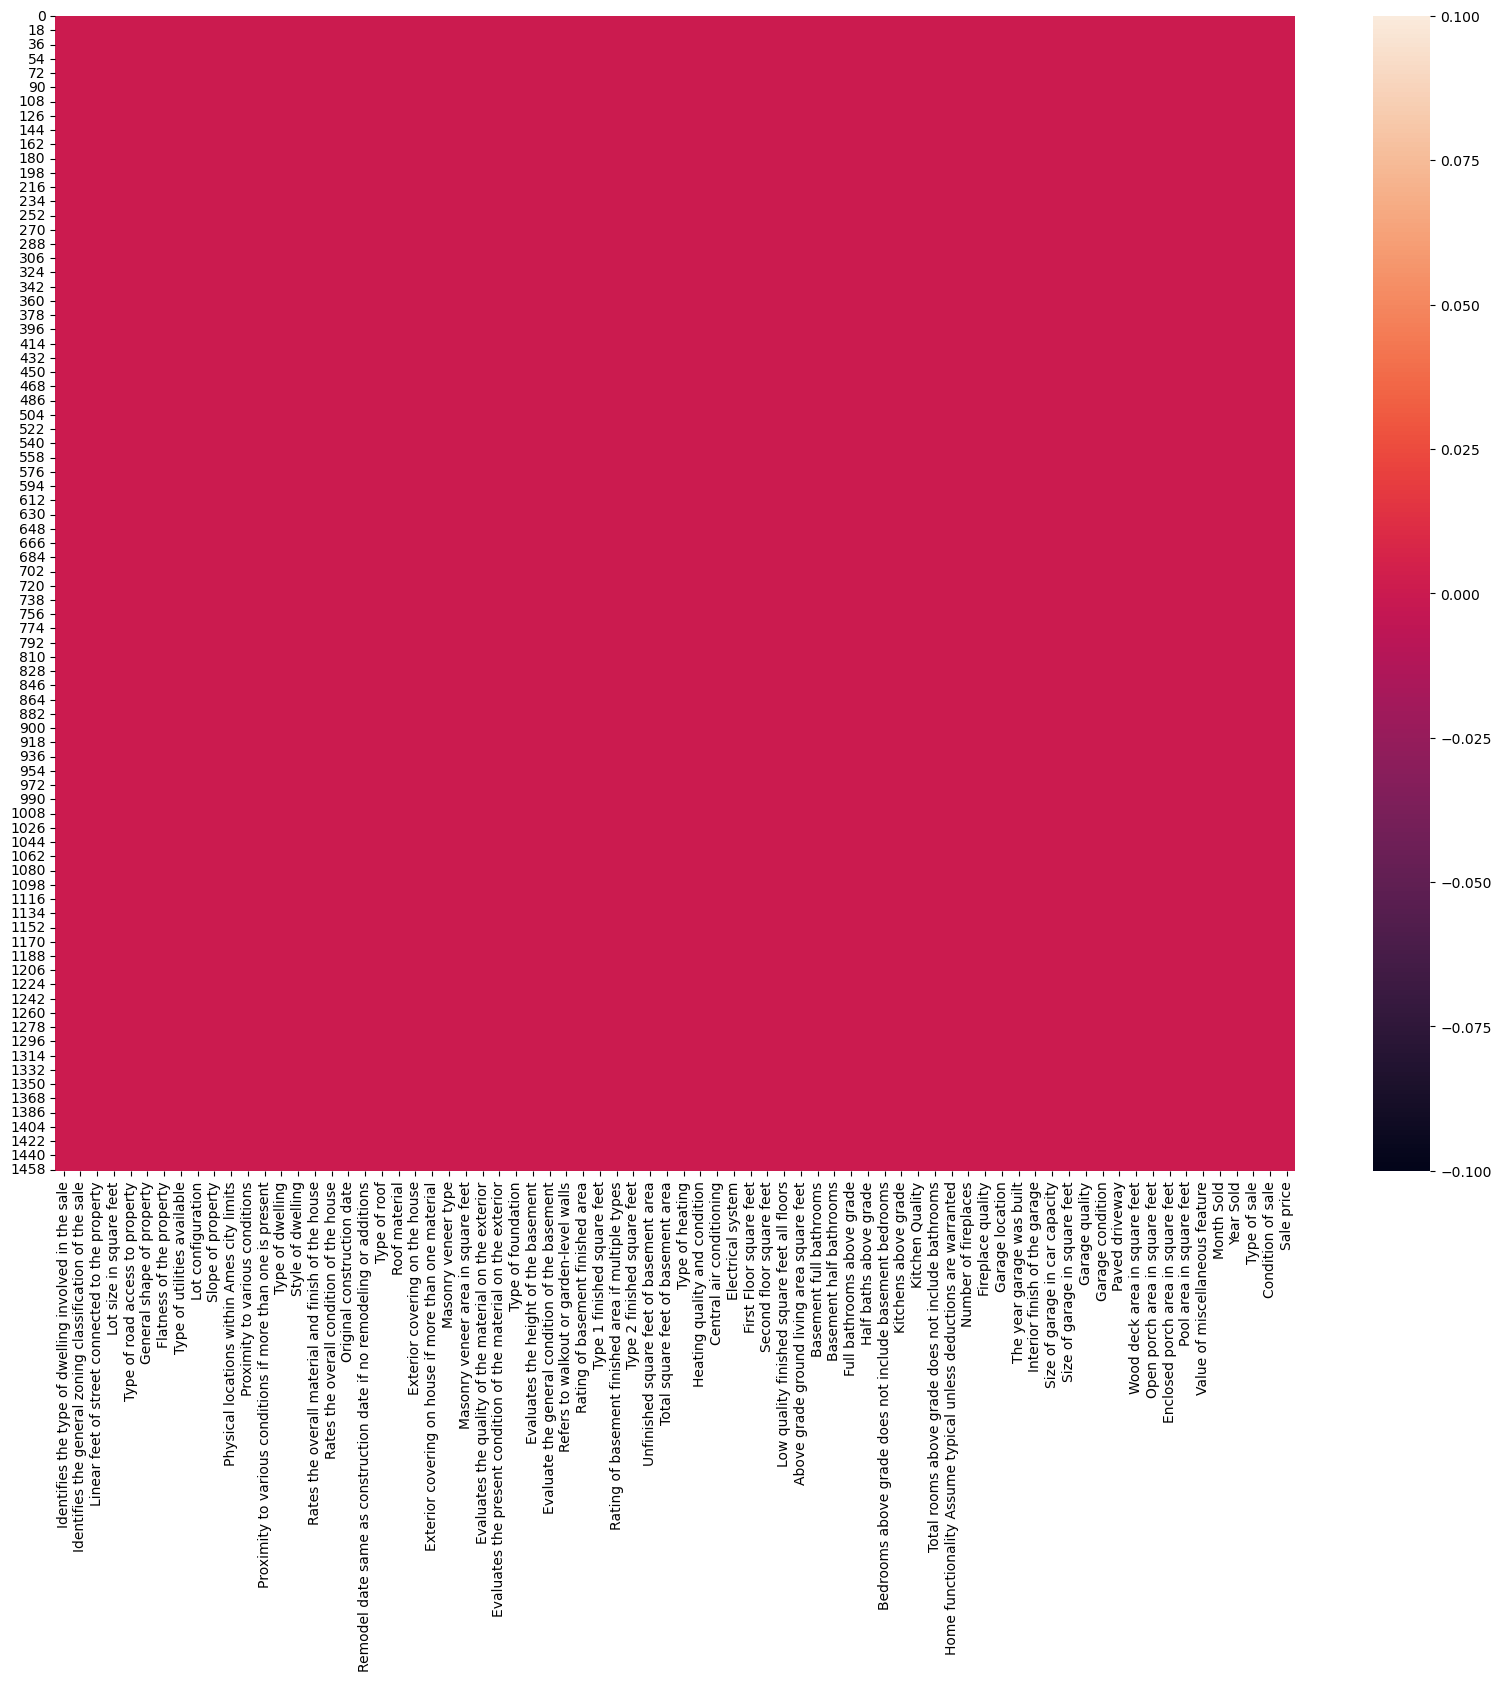

In [105]:
plt.figure(figsize=(20,15))
sns.heatmap(housing_data_1.isnull())

In [106]:
housing_data_1.describe()

Identifies the type of dwelling involved in the sale  \
count                                        1460.000000      
mean                                           56.897260      
std                                            42.300571      
min                                            20.000000      
25%                                            20.000000      
50%                                            50.000000      
75%                                            70.000000      
max                                           190.000000      

       Linear feet of street connected to the property  \
count                                      1460.000000   
mean                                         57.623288   
std                                          34.664304   
min                                           0.000000   
25%                                          42.000000   
50%                                          63.000000   
75%                                          79.000000   
max                                         313.000000   

       Lot size in square feet  \
count              1460.000000   
mean              10516.828082   
std                9981.264932   
min                1300.000000   
25%                7553.500000   
50%                9478.500000   
75%               11601.500000   
max              215245.000000   

       Rates the overall material and finish of the house  \
count                                        1460.000000    
mean                                            6.099315    
std                                             1.382997    
min                                             1.000000    
25%                                             5.000000    
50%                                             6.000000    
75%                                             7.000000    
max                                            10.000000    

       Rates the overall condition of the house  Original construction date  \
count                               1460.000000                 1460.000000   
mean                                   5.575342                 1971.267808   
std                                    1.112799                   30.202904   
min                                    1.000000                 1872.000000   
25%                                    5.000000                 1954.000000   
50%                                    5.000000                 1973.000000   
75%                                    6.000000                 2000.000000   
max                                    9.000000                 2010.000000   

       Remodel date same as construction date if no remodeling or additions  \
count                                        1460.000000                      
mean                                         1984.865753                      
std                                            20.645407                      
min                                          1950.000000                      
25%                                          1967.000000                      
50%                                          1994.000000                      
75%                                          2004.000000                      
max                                          2010.000000                      

       Masonry veneer area in square feet  Type 1 finished square feet  \
count                         1460.000000                  1460.000000   
mean                           103.117123                   443.639726   
std                            180.731373                   456.098091   
min                              0.000000                     0.000000   
25%                              0.000000                     0.000000   
50%                              0.000000                   383.500000   
75%                            164.250000                   712.250000   
max                           1600.000000  

In [107]:
def boxHistPlot(housing_data_1, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(housing_data_1)
    plt.subplot(122)
    sns.distplot(housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\1325202918.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1)


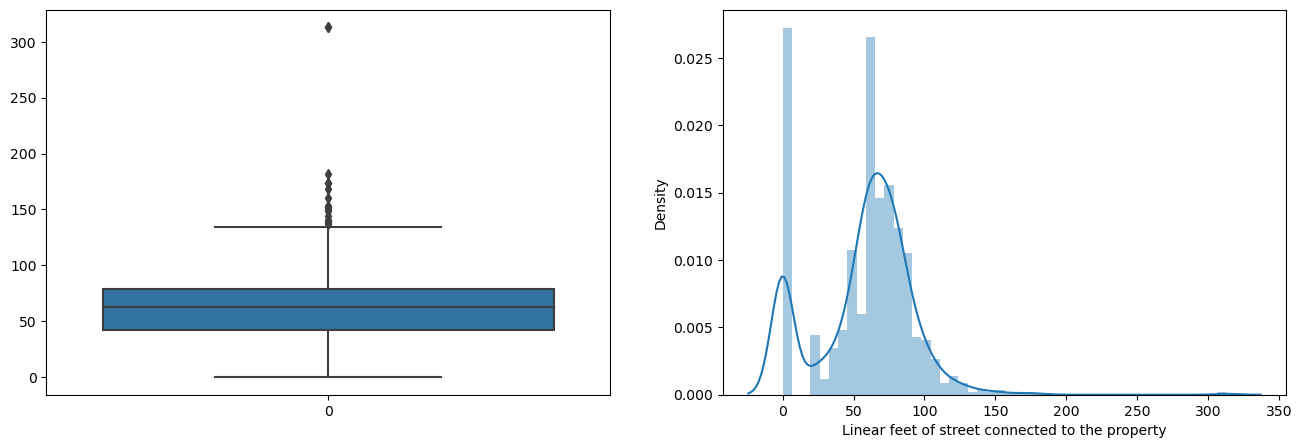

In [108]:
boxHistPlot(housing_data_1['Linear feet of street connected to the property'])

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\1325202918.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1)


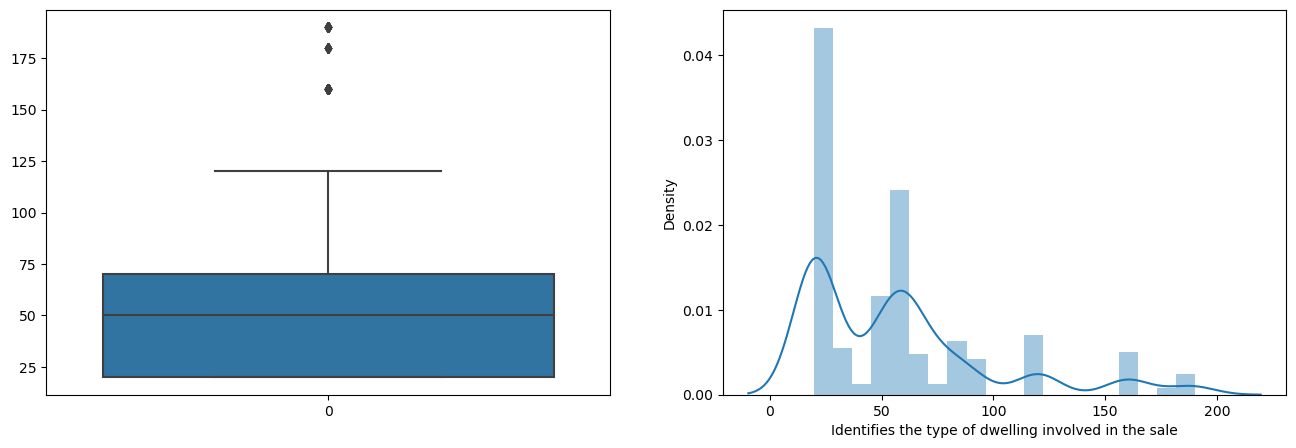

In [109]:
boxHistPlot(housing_data_1['Identifies the type of dwelling involved in the sale'])

In [110]:
housing_data_1.isnull().sum().sum()

0

In [111]:
housing_data_1.shape

(1460, 74)

In [112]:
# Creating cleaned without missing values dataset

housing_data_1.to_csv('housing_dataset.csv',index=False)

# Categorical Features

In [113]:
categorical_features = [feature for feature in housing_data_1.columns if housing_data_1[feature].dtypes=='O']
categorical_features

['Identifies the general zoning classification of the sale',
 'Type of road access to property',
 'General shape of property',
 'Flatness of the property',
 'Type of utilities available',
 'Lot configuration',
 'Slope of property',
 'Physical locations within Ames city limits',
 'Proximity to various conditions',
 'Proximity to various conditions if more than one is present',
 'Type of dwelling',
 'Style of dwelling',
 'Type of roof',
 'Roof material',
 'Exterior covering on the house',
 'Exterior covering on house if more than one material',
 'Masonry veneer type',
 'Evaluates the quality of the material on the exterior',
 'Evaluates the present condition of the material on the exterior',
 'Type of foundation',
 'Evaluates the height of the basement',
 'Evaluate the general condition of the basement',
 'Refers to walkout or garden-level walls',
 'Rating of basement finished area',
 'Rating of basement finished area if multiple types',
 'Type of heating',
 'Heating quality and conditio

# Convert Categorical features into Numerical features With the Ordinal Encoding

## Ordinal Encoding

In [114]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_end_var = [
'Evaluates the quality of the material on the exterior',
'Evaluates the present condition of the material on the exterior',
'Evaluates the height of the basement',
'Evaluate the general condition of the basement',
'Refers to walkout or garden-level walls',
'Rating of basement finished area',
'Rating of basement finished area if multiple types',
'Heating quality and condition',
'Kitchen Quality',
'Fireplace quality',
'Garage quality',
'Garage condition',
'Home functionality Assume typical unless deductions are warranted',
'Interior finish of the garage',
'Paved driveway',
'Type of utilities available'
] 

print('Total number of feature to convert ordinal numeric format:' , len(ordinal_end_var))

Total number of feature to convert ordinal numeric format: 16


In [115]:
enc = OrdinalEncoder(dtype = np.int64)

In [116]:
housing_data_1['Evaluates the quality of the material on the exterior'].value_counts()

Average/Typical    906
Good               488
Excellent           52
Fair                14
Name: Evaluates the quality of the material on the exterior, dtype: int64

In [117]:
ExterQual = ['Poor','Fair','Average/Typical','Good','Excellent']

In [118]:
enc = OrdinalEncoder(categories = [ExterQual])

In [119]:
enc.fit_transform(housing_data_1[['Evaluates the quality of the material on the exterior']])

array([[3.],
       [2.],
       [3.],
       ...,
       [4.],
       [2.],
       [3.]])

In [120]:
housing_data_1[['Evaluates the quality of the material on the exterior']] = enc.fit_transform(housing_data_1[['Evaluates the quality of the material on the exterior']])

In [121]:
housing_data_1['Evaluates the quality of the material on the exterior'].value_counts()

2.0    906
3.0    488
4.0     52
1.0     14
Name: Evaluates the quality of the material on the exterior, dtype: int64

In [122]:
housing_data_1['Evaluates the present condition of the material on the exterior'].value_counts()

Average/Typical    1282
Good                146
Fair                 28
Excellent             3
Poor                  1
Name: Evaluates the present condition of the material on the exterior, dtype: int64

In [123]:
ExterCond = ['Poor','Fair','Average/Typical','Good','Excellent']

In [124]:
enc = OrdinalEncoder(categories = [ExterCond])

In [125]:
enc.fit_transform(housing_data_1[['Evaluates the present condition of the material on the exterior']])

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [2.],
       [2.]])

In [126]:
housing_data_1[['Evaluates the present condition of the material on the exterior']] = enc.fit_transform(housing_data_1[['Evaluates the present condition of the material on the exterior']])

In [127]:
housing_data_1['Evaluates the present condition of the material on the exterior'].unique()

array([2., 3., 1., 0., 4.])

In [128]:
housing_data_1['Evaluates the height of the basement'].value_counts()

Typical (80-89 inches)     649
Good (90-99 inches)        618
Excellent (100+ inches)    121
No                          37
Fair (70-79 inches)         35
Name: Evaluates the height of the basement, dtype: int64

In [129]:
BsmtQual = ['No','Poor (<70 inches)','Fair (70-79 inches)','Typical (80-89 inches)','Good (90-99 inches)','Excellent (100+ inches)']
enc = OrdinalEncoder(categories = [BsmtQual])
enc.fit_transform(housing_data_1[['Evaluates the height of the basement']])

array([[4.],
       [4.],
       [4.],
       ...,
       [3.],
       [3.],
       [3.]])

In [130]:
housing_data_1[['Evaluates the height of the basement']] = enc.fit_transform(housing_data_1[['Evaluates the height of the basement']])

In [131]:
housing_data_1['Evaluates the height of the basement'].value_counts()

3.0    649
4.0    618
5.0    121
0.0     37
2.0     35
Name: Evaluates the height of the basement, dtype: int64

In [132]:
BsmtCond = ['No','Poor-Severe cracking, settling, or wetness','Fair-dampness or some cracking or settling','Typical-slight dampness allowed','Good','Excellent']
enc = OrdinalEncoder(categories = [BsmtCond])
enc.fit_transform(housing_data_1[['Evaluate the general condition of the basement']])

array([[3.],
       [3.],
       [3.],
       ...,
       [4.],
       [3.],
       [3.]])

In [133]:
housing_data_1['Evaluate the general condition of the basement'] = enc.fit_transform(housing_data_1[['Evaluate the general condition of the basement']])

In [134]:
BsmtExposure = ['No','No Exposure','Mimimum Exposure','Average Exposure','Good Exposure']
enc = OrdinalEncoder(categories = [BsmtExposure])
enc.fit_transform(housing_data_1[['Refers to walkout or garden-level walls']])

array([[1.],
       [4.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [135]:
housing_data_1['Refers to walkout or garden-level walls'] = enc.fit_transform(housing_data_1[['Refers to walkout or garden-level walls']])

In [136]:
BsmtFinType1 = ['No','Unfinished','Low Quality','Average Rec Room','Below Average Living Quarters','Average Living Quarters','Good Living Quarters']
enc = OrdinalEncoder(categories = [BsmtFinType1])
enc.fit_transform(housing_data_1[['Rating of basement finished area']])

array([[6.],
       [5.],
       [6.],
       ...,
       [6.],
       [6.],
       [4.]])

In [137]:
housing_data_1['Rating of basement finished area'] = enc.fit_transform(housing_data_1[['Rating of basement finished area']])

In [138]:
BsmtFinType2 = ['No','Unfinished','Low Quality','Average Rec Room','Below Average Living Quarters','Average Living Quarters','Good Living Quarters']
enc = OrdinalEncoder(categories = [BsmtFinType2])
enc.fit_transform(housing_data_1[['Rating of basement finished area if multiple types']])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [3.],
       [2.]])

In [139]:
housing_data_1['Rating of basement finished area if multiple types'] = enc.fit_transform(housing_data_1[['Rating of basement finished area if multiple types']])

In [140]:
HeatingQc = ['Poor','Fair','Average/Typical','Good','Excellent']
enc = OrdinalEncoder(categories = [HeatingQc])
enc.fit_transform(housing_data_1[['Heating quality and condition']])

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [3.],
       [3.]])

In [141]:
housing_data_1['Heating quality and condition'] = enc.fit_transform(housing_data_1[['Heating quality and condition']])

In [142]:
KitchenQual = ['Poor','Fair','Average/Typical','Good','Excellent']
enc = OrdinalEncoder(categories = [KitchenQual])
enc.fit_transform(housing_data_1[['Kitchen Quality']])

array([[3.],
       [2.],
       [3.],
       ...,
       [3.],
       [3.],
       [2.]])

In [143]:
housing_data_1['Kitchen Quality'] = enc.fit_transform(housing_data_1[['Kitchen Quality']])

In [144]:
FireplaceQu = ['No','Poor-Ben Franklin Stove','Fair-Prefabricated Fireplace in the basement','Average-Prefabricated Fireplace in the main living area or Masonry Fireplace in the basement','Good-Masonry Fireplace on the main level','Excellent-Exceptional Masonry Fireplace']
enc = OrdinalEncoder(categories = [FireplaceQu])
enc.fit_transform(housing_data_1[['Fireplace quality']])

array([[0.],
       [3.],
       [3.],
       ...,
       [4.],
       [0.],
       [0.]])

In [145]:
housing_data_1['Fireplace quality'] = enc.fit_transform(housing_data_1[['Fireplace quality']])

In [146]:
GarageQual = ['No','Poor','Fair','Average/Typical','Good','Excellent']
enc = OrdinalEncoder(categories = [GarageQual])
enc.fit_transform(housing_data_1[['Garage quality']])

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [147]:
housing_data_1['Garage quality'] = enc.fit_transform(housing_data_1[['Garage quality']])

In [148]:
GarageCond = ['No','Poor','Fair','Average/Typical','Good','Excellent']
enc = OrdinalEncoder(categories = [GarageCond])
enc.fit_transform(housing_data_1[['Garage condition']])

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [149]:
housing_data_1['Garage condition'] = enc.fit_transform(housing_data_1[['Garage condition']])

In [150]:
Functional = ['Salvage only','Severely Damaged','Major Deductions 2','Major Deductions 1','Moderate Deductions','Minor Deductions 2','Minor Deductions 1','Typical Functionality']
enc = OrdinalEncoder(categories = [Functional])
enc.fit_transform(housing_data_1[['Home functionality Assume typical unless deductions are warranted']])

array([[7.],
       [7.],
       [7.],
       ...,
       [7.],
       [7.],
       [7.]])

In [151]:
housing_data_1['Home functionality Assume typical unless deductions are warranted'] = enc.fit_transform(housing_data_1[['Home functionality Assume typical unless deductions are warranted']])

In [152]:
GarageFinish = ['No','Unfinished','Rough Finished','Finished']
enc = OrdinalEncoder(categories = [GarageFinish])
enc.fit_transform(housing_data_1[['Interior finish of the garage']])

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [3.]])

In [153]:
housing_data_1['Interior finish of the garage'] = enc.fit_transform(housing_data_1[['Interior finish of the garage']])

In [154]:
PavedDrive = ['Dirt/Gravel','Partial Pavement','Paved']
enc = OrdinalEncoder(categories = [PavedDrive])
enc.fit_transform(housing_data_1[['Paved driveway']])

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [155]:
housing_data_1['Paved driveway'] = enc.fit_transform(housing_data_1[['Paved driveway']])

In [156]:
housing_data_1['Type of utilities available'].value_counts()

All public Utilities        1459
Electricity and Gas Only       1
Name: Type of utilities available, dtype: int64

In [157]:
Utilities = ['Electricity only','Electricity and Gas Only','Electricity, Gas, and Water (Septic Tank)','All public Utilities']
enc = OrdinalEncoder(categories = [Utilities])
enc.fit_transform(housing_data_1[['Type of utilities available']])

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [158]:
housing_data_1['Type of utilities available'] = enc.fit_transform(housing_data_1[['Type of utilities available']])

In [159]:
housing_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Identifies the type of dwelling involved in the sale                  1460 non-null   int64  
 1   Identifies the general zoning classification of the sale              1460 non-null   object 
 2   Linear feet of street connected to the property                       1460 non-null   int64  
 3   Lot size in square feet                                               1460 non-null   int64  
 4   Type of road access to property                                       1460 non-null   object 
 5   General shape of property                                             1460 non-null   object 
 6   Flatness of the property                                              1460 non-null   object 
 7

# Categorical Variables

In [160]:
categorical_features = [feature for feature in housing_data_1.columns if housing_data_1[feature].dtypes=='O']
categorical_features

['Identifies the general zoning classification of the sale',
 'Type of road access to property',
 'General shape of property',
 'Flatness of the property',
 'Lot configuration',
 'Slope of property',
 'Physical locations within Ames city limits',
 'Proximity to various conditions',
 'Proximity to various conditions if more than one is present',
 'Type of dwelling',
 'Style of dwelling',
 'Type of roof',
 'Roof material',
 'Exterior covering on the house',
 'Exterior covering on house if more than one material',
 'Masonry veneer type',
 'Type of foundation',
 'Type of heating',
 'Central air conditioning',
 'Electrical system',
 'Garage location',
 'Type of sale',
 'Condition of sale']

In [161]:
housing_data_1[categorical_features].shape

(1460, 23)

In [162]:
for feature in categorical_features:
    print('the feature is {} and number of categorical are : {}'.format(feature,len(housing_data_1[feature].unique())))

the feature is Identifies the general zoning classification of the sale and number of categorical are : 5
the feature is Type of road access to property and number of categorical are : 2
the feature is General shape of property and number of categorical are : 4
the feature is Flatness of the property and number of categorical are : 4
the feature is Lot configuration and number of categorical are : 5
the feature is Slope of property and number of categorical are : 3
the feature is Physical locations within Ames city limits and number of categorical are : 25
the feature is Proximity to various conditions and number of categorical are : 9
the feature is Proximity to various conditions if more than one is present and number of categorical are : 8
the feature is Type of dwelling and number of categorical are : 5
the feature is Style of dwelling and number of categorical are : 8
the feature is Type of roof and number of categorical are : 6
the feature is Roof material and number of categoric

# Convert Categorical features into Numerical features with the OneHotEncoding

## OneHotEncoding

In [163]:
# encoder = OneHotEncoder(dtype = np.int32)

In [164]:
housing_data_1_encod = housing_data_1.copy()

object_features = housing_data_1_encod.select_dtypes(include = 'object').columns.tolist()
print('Total object data type features', len(object_features))

print('Features: \n', object_features)

Total object data type features 23
Features: 
 ['Identifies the general zoning classification of the sale', 'Type of road access to property', 'General shape of property', 'Flatness of the property', 'Lot configuration', 'Slope of property', 'Physical locations within Ames city limits', 'Proximity to various conditions', 'Proximity to various conditions if more than one is present', 'Type of dwelling', 'Style of dwelling', 'Type of roof', 'Roof material', 'Exterior covering on the house', 'Exterior covering on house if more than one material', 'Masonry veneer type', 'Type of foundation', 'Type of heating', 'Central air conditioning', 'Electrical system', 'Garage location', 'Type of sale', 'Condition of sale']


In [165]:
# Select Categorical columns

categorical_cols = ['Identifies the general zoning classification of the sale', 'Type of road access to property', 'General shape of property', 'Flatness of the property', 'Lot configuration', 'Slope of property', 'Physical locations within Ames city limits', 'Proximity to various conditions', 'Proximity to various conditions if more than one is present', 'Type of dwelling', 'Style of dwelling', 'Type of roof', 'Roof material', 'Exterior covering on the house', 'Exterior covering on house if more than one material', 'Masonry veneer type', 'Type of foundation', 'Type of heating', 'Central air conditioning', 'Electrical system', 'Garage location', 'Type of sale', 'Condition of sale']

# Create a Dataframe containing only the categorical columns
categorical_data = housing_data_1_encod[categorical_cols]
categorical_data.sample(10)

Identifies the general zoning classification of the sale  \
289                             Residential Low-Density         
1120                         Residential Medium Density         
616                             Residential Low-Density         
467                             Residential Low-Density         
1379                            Residential Low-Density         
409                        Floating Village Residential         
1288                            Residential Low-Density         
282                             Residential Low-Density         
1064                            Residential Low-Density         
1034                            Residential Low-Density         

     Type of road access to property General shape of property  \
289                            Paved                   Regular   
1120                           Paved                   Regular   
616                            Paved        Slightly irregular   
467                            Paved                   Regular   
1379                           Paved                   Regular   
409                            Paved                   Regular   
1288                           Paved        Slightly irregular   
282                            Paved                   Regular   
1064                           Paved        Slightly irregular   
1034                           Paved                   Regular   

     Flatness of the property Lot configuration Slope of property  \
289                     Level        Inside lot      Gentle slope   
1120                   Banked        Inside lot    Moderate slope   
616                     Level        Inside lot      Gentle slope   
467                     Level        Inside lot      Gentle slope   
1379                    Level        Inside lot      Gentle slope   
409                     Level        Inside lot      Gentle slope   
1288                    Level        Inside lot      Gentle slope   
282                     Level        Inside lot      Gentle slope   
1064                    Level        Cul-de-sac      Gentle slope   
1034                   Banked        Inside lot      Gentle slope   

     Physical locations within Ames city limits  \
289                                   Brookside   
1120                     Iowa DOT and Rail Road   
616                                     Gilbert   
467                                       NAmes   
1379                                 Timberland   
409                                    Somerset   
1288                                Stone Brook   
282                          Northridge Heights   
1064                                      NAmes   
1034                                   Crawford   

       Proximity to various conditions  \
289   Adjacent to North-South Railroad   
1120                            Normal   
616                             Normal   
467        Adjacent to arterial street   
1379                            Normal   
409                             Normal   
1288                            Normal   
282                             Normal   
1064                            Normal   
1034                            Normal   

     Proximity to various conditions if more than one is present  \
289                                              Normal            
1120                                             Normal            
616                                              Normal            
467                                              Normal            
1379                                             Normal            
409                                              Normal            
1288                                             Normal            
282                                              Normal            
1064                                             Normal            
1034                                             Normal            

            Type of dwelling

In [166]:
# Apply OneHot Coding
encoder = OneHotEncoder(drop ='first' , sparse = False) # 'drop=first' to avoid multicollinearity
encoded_data = pd.DataFrame(encoder.fit_transform(categorical_data))


C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [167]:
# Replace Original categorical columns with encoded columns in the original dataframe
housing_data_1_encod.drop(columns=categorical_cols, inplace=True)
housing_data_1_encod = pd.concat([housing_data_1_encod,encoded_data], axis=1)

# Now, data contains encoded categorical features

In [168]:
housing_data_1_encod.sample(10)

Identifies the type of dwelling involved in the sale  \
1112                                                 20      
1458                                                 20      
427                                                  20      
242                                                  50      
1082                                                 20      
556                                                  20      
888                                                  20      
1089                                                120      
1222                                                 50      
745                                                  60      

      Linear feet of street connected to the property  \
1112                                               73   
1458                                               68   
427                                                77   
242                                                63   
1082                                               70   
556                                                69   
888                                                95   
1089                                               37   
1222                                               78   
745                                                 0   

      Lot size in square feet  Type of utilities available  \
1112                     7100                          3.0   
1458                     9717                          3.0   
427                      8593                          3.0   
242                      5000                          3.0   
1082                     8749                          3.0   
556                     14850                          3.0   
888                     15865                          3.0   
1089                     3316                          3.0   
1222                    10496                          3.0   
745                      8963                          3.0   

      Rates the overall material and finish of the house  \
1112                                                  5    
1458                                                  5    
427                                                   4    
242                                                   5    
1082                                                  7    
556                                                   5    
888                                                   8    
1089                                                  8    
1222                                                  6    
745                                                   8    

      Rates the overall condition of the house  Original construction date  \
1112                                         7                        1957   
1458                                         6                        1950   
427                                          6                        1957   
242                                          4                        1900   
1082                                         5                        2002   
556                                          5                        1957   
888                                          6                        1970   
1089                                         5                        2005   
1222                                         6                        1949   
745                                          9                        1976   

      Remodel date same as construction date if no remodeling or additions  \
1112                                               1957                      
1458                                               1996                      
427                                                1957                      
242                                                1950                      
1082                                               2002                      
556                     

In [169]:
housing_data_1_encod.select_dtypes(include='object').columns.tolist()

[]

In [170]:
housing_data_1_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Identifies the type of dwelling involved in the sale to 144
dtypes: float64(161), int32(1), int64(34)
memory usage: 2.2 MB


# DataFrame Without Categorical Values

In [171]:
housing_data_1_encod

Identifies the type of dwelling involved in the sale  \
0                                                    60      
1                                                    20      
2                                                    60      
3                                                    70      
4                                                    60      
...                                                 ...      
1455                                                 60      
1456                                                 20      
1457                                                 70      
1458                                                 20      
1459                                                 20      

      Linear feet of street connected to the property  \
0                                                  65   
1                                                  80   
2                                                  68   
3                                                  60   
4                                                  84   
...                                               ...   
1455                                               62   
1456                                               85   
1457                                               66   
1458                                               68   
1459                                               75   

      Lot size in square feet  Type of utilities available  \
0                        8450                          3.0   
1                        9600                          3.0   
2                       11250                          3.0   
3                        9550                          3.0   
4                       14260                          3.0   
...                       ...                          ...   
1455                     7917                          3.0   
1456                    13175                          3.0   
1457                     9042                          3.0   
1458                     9717                          3.0   
1459                     9937                          3.0   

      Rates the overall material and finish of the house  \
0                                                     7    
1                                                     6    
2                                                     7    
3                                                     7    
4                                                     8    
...                                                 ...    
1455                                                  6    
1456                                                  6    
1457                                                  7    
1458                                                  5    
1459                                                  5    

      Rates the overall condition of the house  Original construction date  \
0                                            5                        2003   
1                                            8                        1976   
2                                            5                        2001   
3                                            5                        1915   
4                                            5                        2000   
...                                        ...                         ...   
1455                                         5                        1999   
1456                                         6                        1978   
1457                                         9                        1941   
1458                                         6                        1950   
1459                                         6                        1965   

      Remodel date same as construction date if no remodeling or additions  \
0                                                  2003                      
1                

In [172]:
# Creating cleaned numeric dataset (without categorical value) 

housing_data_1_encod.to_csv('copy of original dataset without categorical data.csv',index=False)

## Numerical Variables

In [173]:
numerical_features = [feature for feature in housing_data_1_encod.columns if housing_data_1_encod[feature].dtypes !=  'O']

print('number of numerical variables:' , len (numerical_features))

housing_data_1_encod[numerical_features].head()

number of numerical variables: 196


Identifies the type of dwelling involved in the sale  \
0                                                 60      
1                                                 20      
2                                                 60      
3                                                 70      
4                                                 60      

   Linear feet of street connected to the property  Lot size in square feet  \
0                                               65                     8450   
1                                               80                     9600   
2                                               68                    11250   
3                                               60                     9550   
4                                               84                    14260   

   Type of utilities available  \
0                          3.0   
1                          3.0   
2                          3.0   
3                          3.0   
4                          3.0   

   Rates the overall material and finish of the house  \
0                                                  7    
1                                                  6    
2                                                  7    
3                                                  7    
4                                                  8    

   Rates the overall condition of the house  Original construction date  \
0                                         5                        2003   
1                                         8                        1976   
2                                         5                        2001   
3                                         5                        1915   
4                                         5                        2000   

   Remodel date same as construction date if no remodeling or additions  \
0                                               2003                      
1                                               1976                      
2                                               2002                      
3                                               1970                      
4                                               2000                      

   Masonry veneer area in square feet  \
0                                 196   
1                                   0   
2                                 162   
3                                   0   
4                                 350   

   Evaluates the quality of the material on the exterior  ...  135  136  137  \
0                                                3.0      ...  0.0  0.0  0.0   
1                                                2.0      ...  0.0  0.0  0.0   
2                                                3.0      ...  0.0  0.0  0.0   
3                                                2.0      ...  0.0  0.0  0.0   
4                                                3.0      ...  0.0  0.0  0.0   

   138  139  140  141  142  143  144  
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 196 columns]

## Checking the Relation Between Year the house is sold and sale price

Text(0.5, 1.0, 'House price vs Year old')

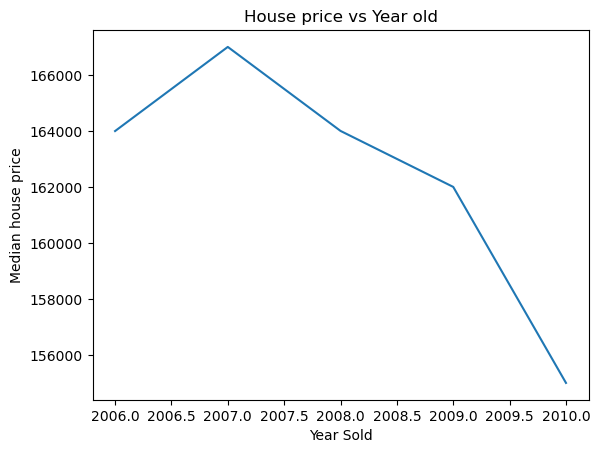

In [174]:
# We will check weather there is a relation between year the house is sold and sale price
 
housing_data_1_encod.groupby('Year Sold')['Sale price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median house price')
plt.title('House price vs Year old')

Text(0.5, 1.0, 'House price vs Year old')

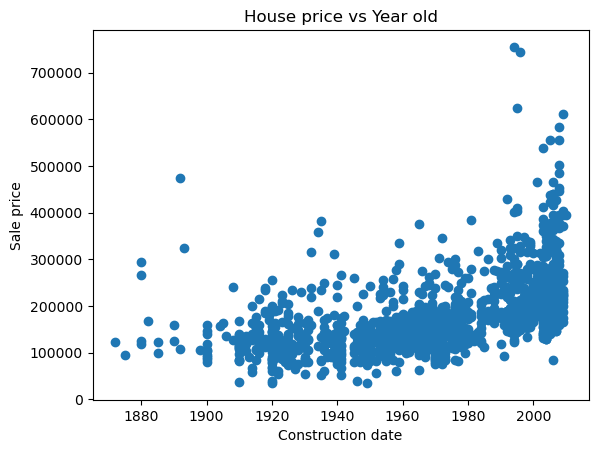

In [175]:
plt.scatter(housing_data_1_encod['Original construction date'], housing_data_1_encod['Sale price'])
plt.xlabel('Construction date')
plt.ylabel('Sale price')
plt.title('House price vs Year old')

Text(0.5, 1.0, 'House price vs Year old')

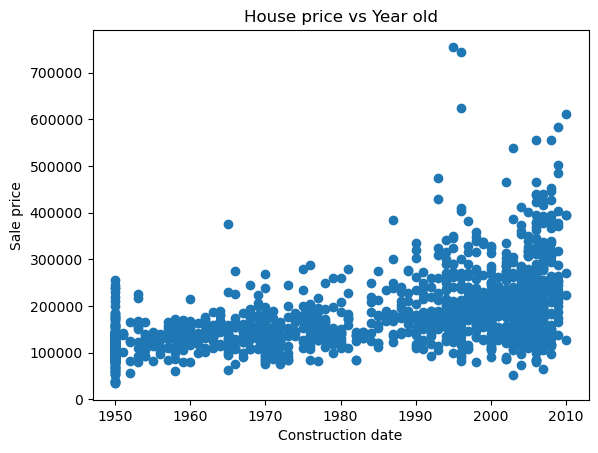

In [176]:
plt.scatter(housing_data_1_encod['Remodel date same as construction date if no remodeling or additions'], housing_data_1_encod['Sale price'])
plt.xlabel('Construction date')
plt.ylabel('Sale price')
plt.title('House price vs Year old')

Text(0.5, 1.0, 'House price vs Year old')

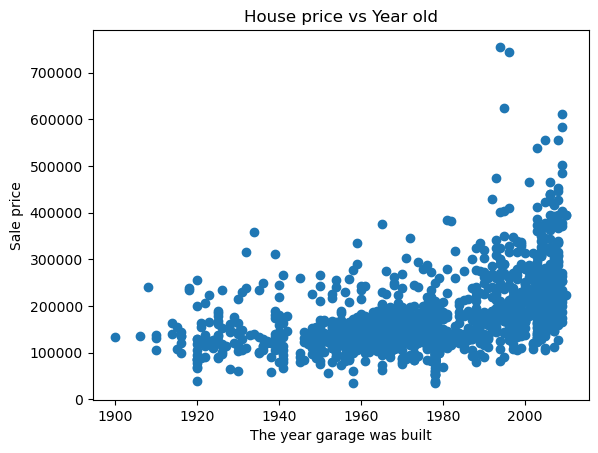

In [177]:
plt.scatter(housing_data_1_encod['The year garage was built'], housing_data_1_encod['Sale price'])
plt.xlabel('The year garage was built')
plt.ylabel('Sale price')
plt.title('House price vs Year old')

## Continuous Variables

In [178]:
continuous_feature= [feature for feature in numerical_features if feature not in  ['The year garage was built','Remodel date same as construction date if no remodeling or additions']]

print('continuous feature count {}' .format(len(continuous_feature)))

continuous feature count 194


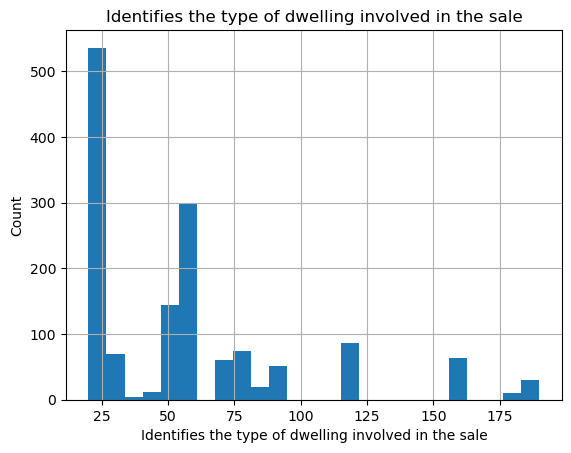

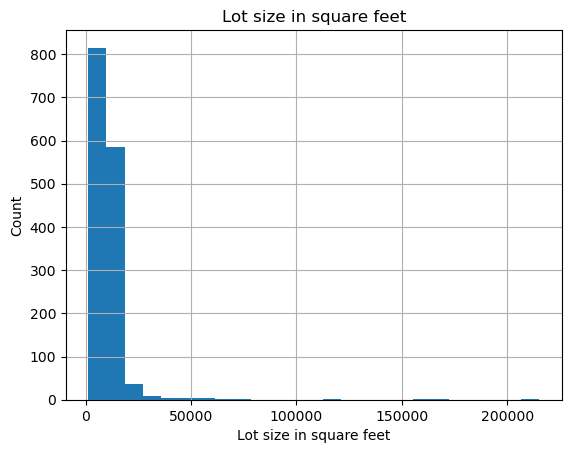

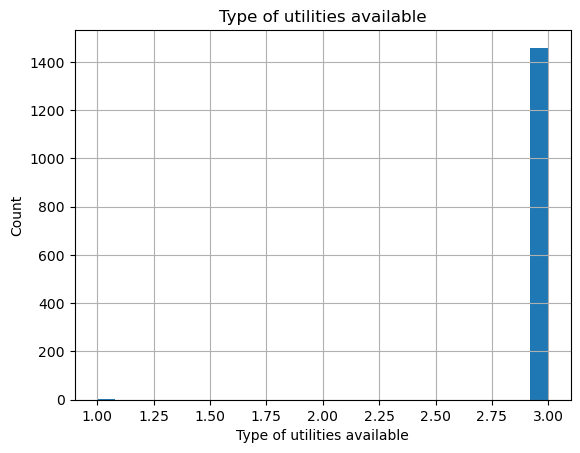

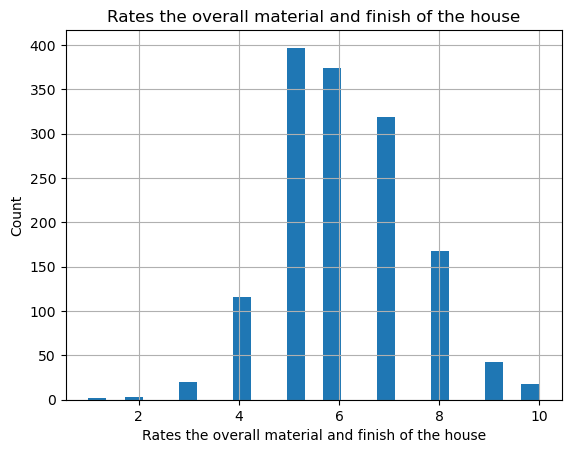

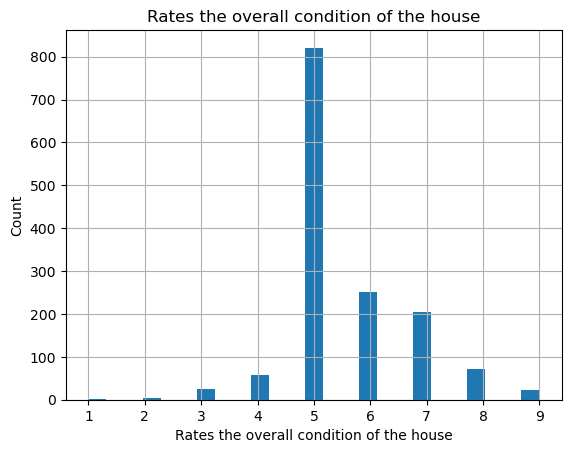

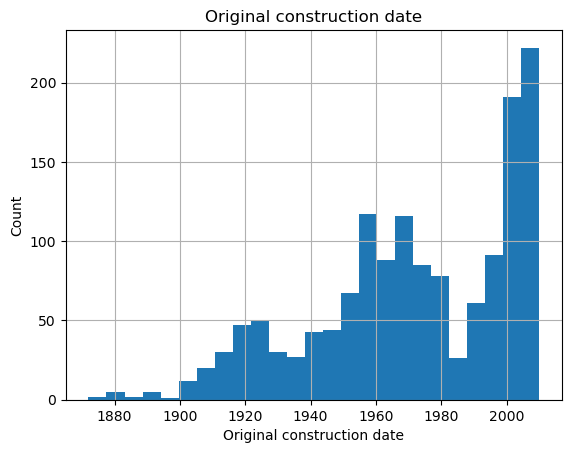

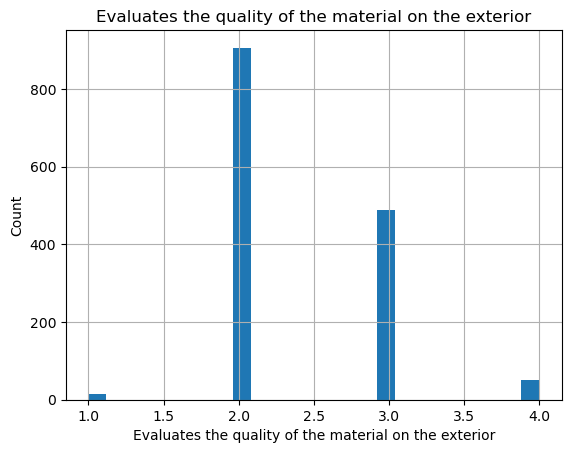

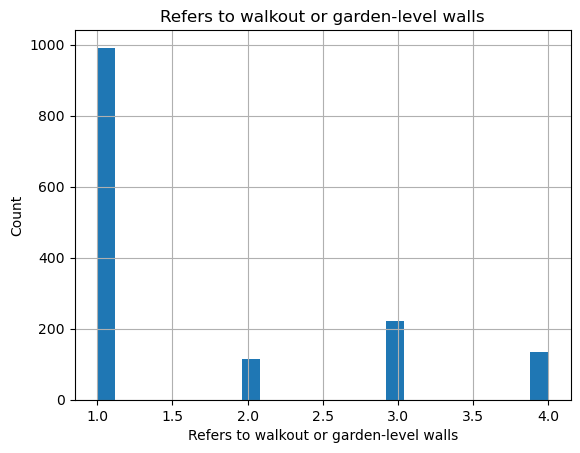

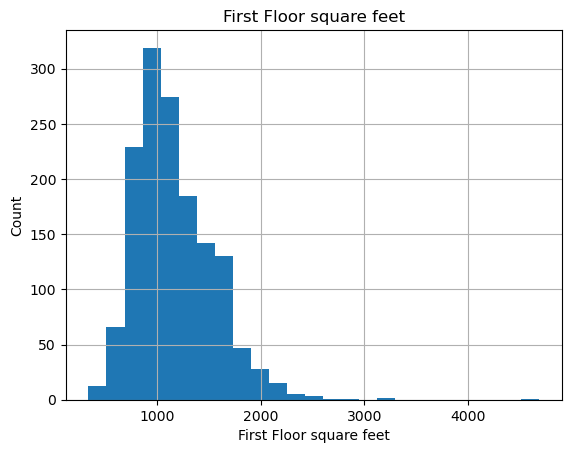

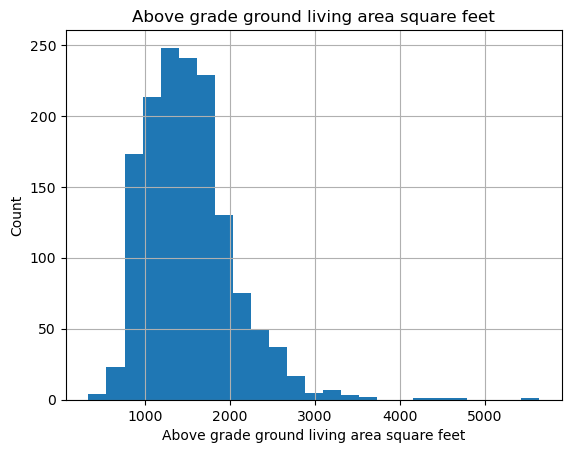

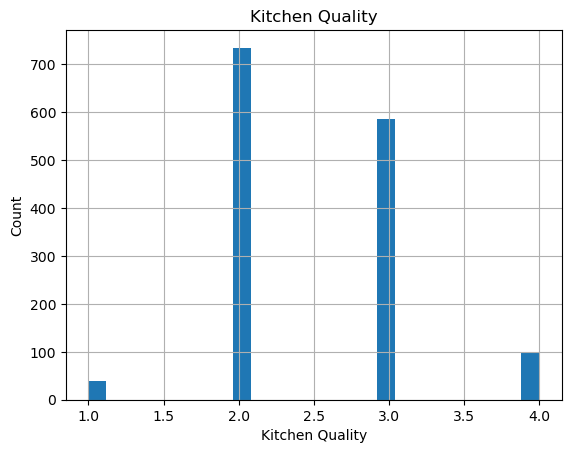

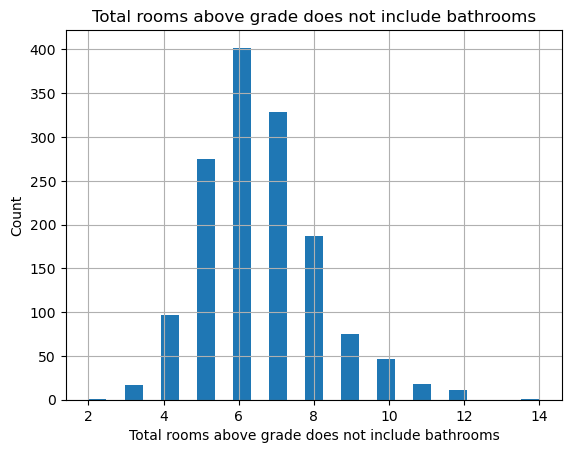

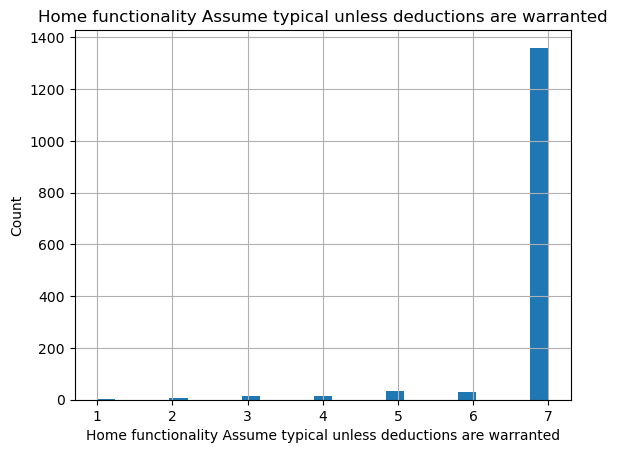

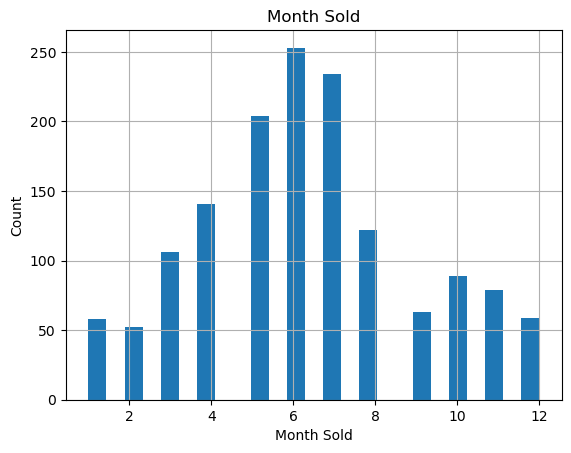

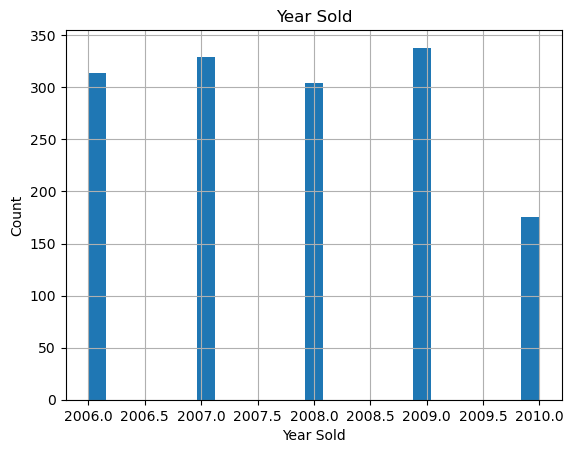

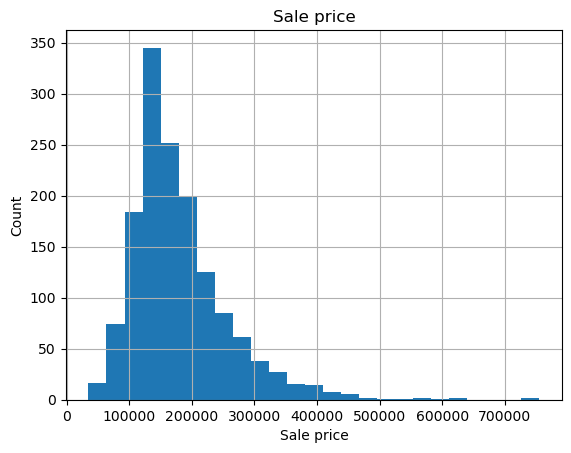

In [179]:
# Lets analyze the continuous values by creating histograms to understand the features

for feature in continuous_feature:
    housing_data_= housing_data_1_encod.copy()
    if 0 in housing_data_[feature].unique():
        pass
    else:
        housing_data_[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

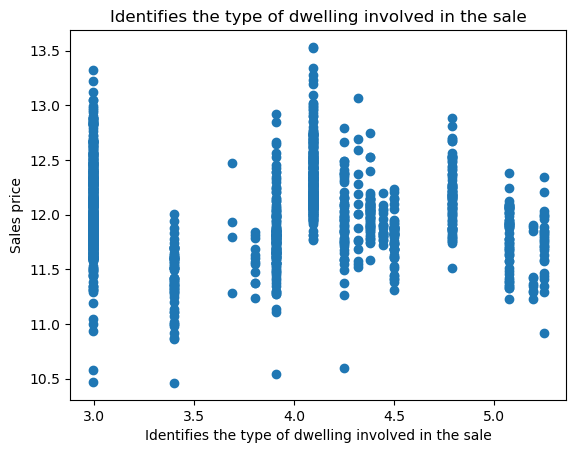

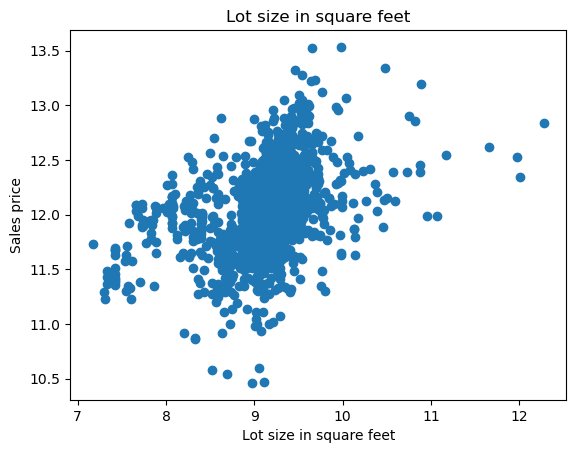

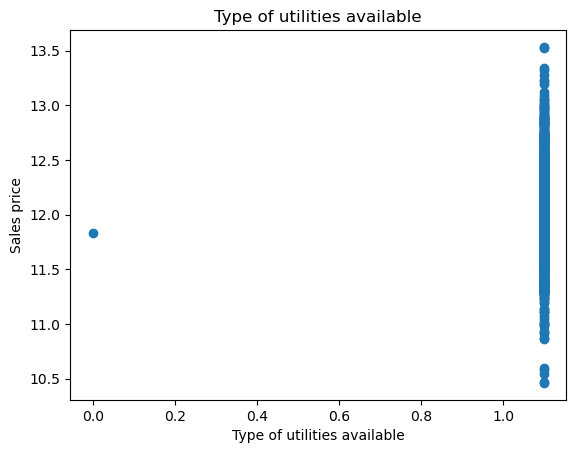

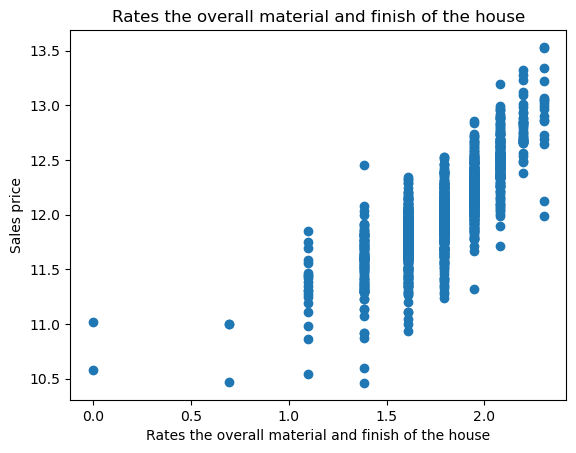

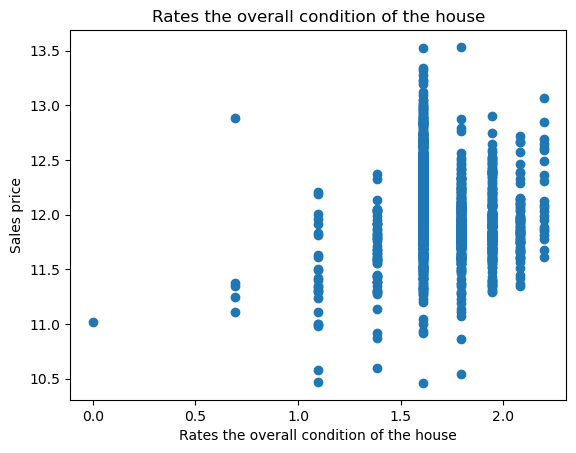

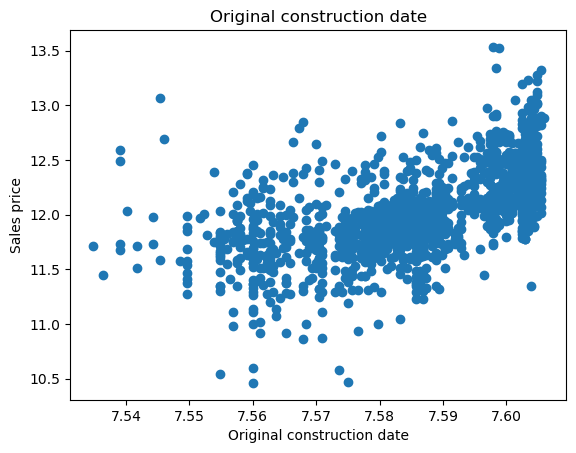

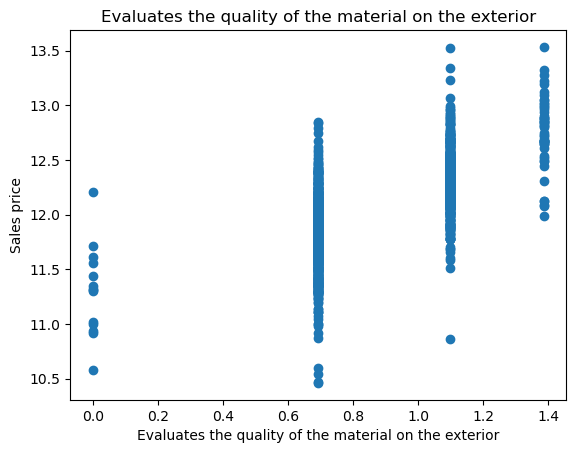

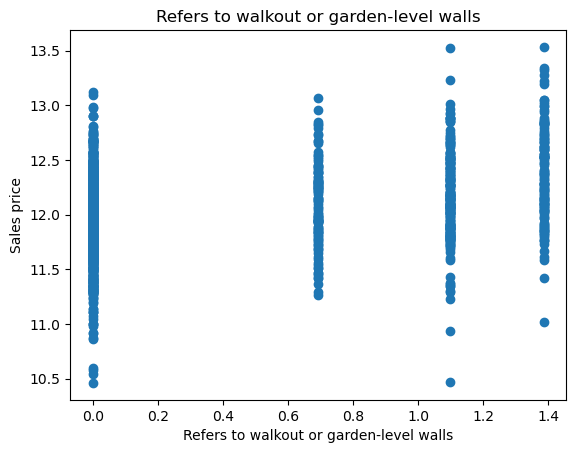

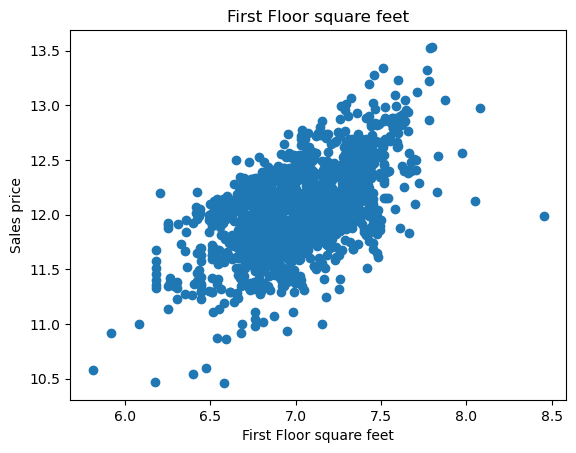

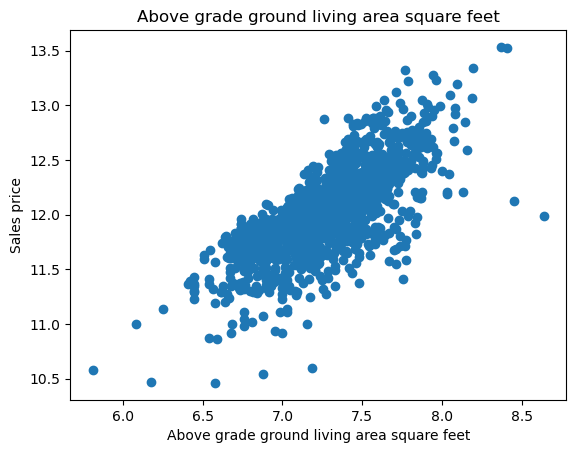

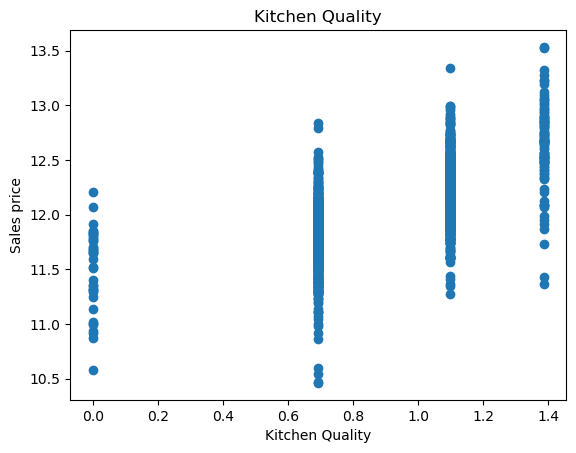

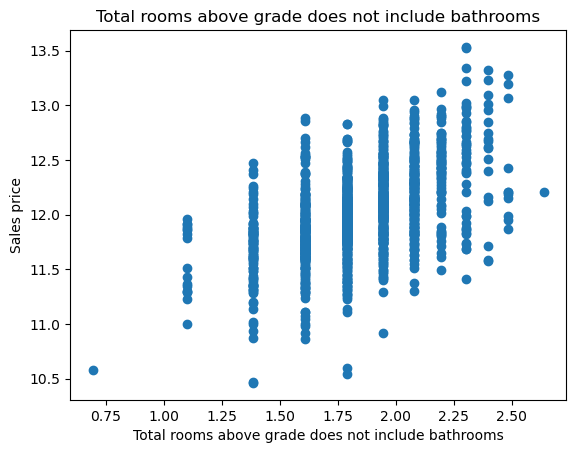

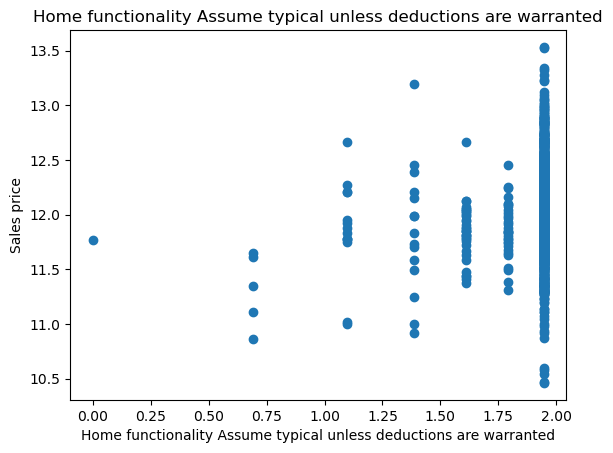

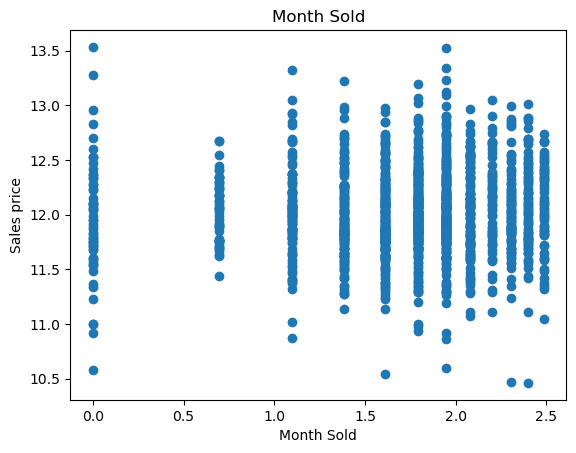

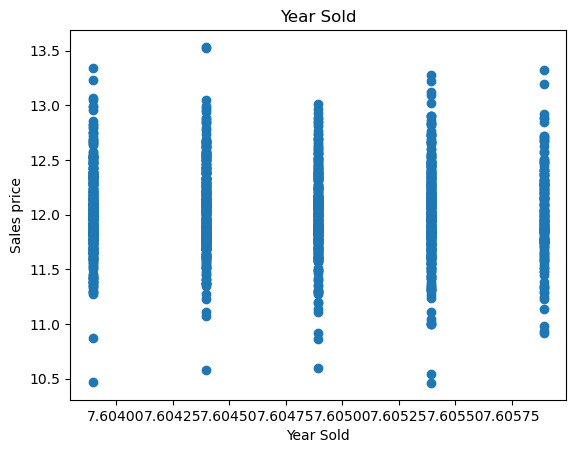

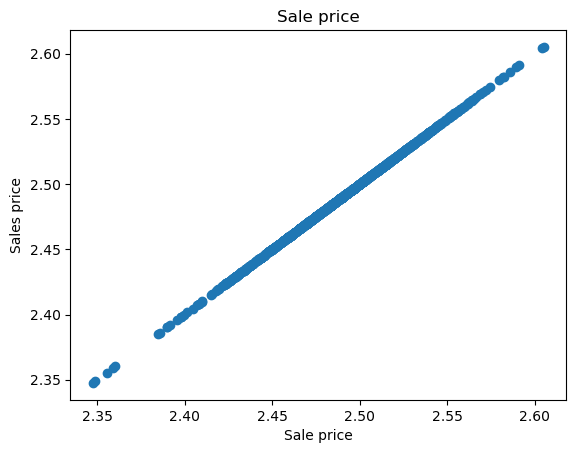

In [180]:
for feature in continuous_feature:
    housing_data_corr = housing_data_1_encod.copy()
    if 0 in housing_data_corr[feature].unique():
        pass
    else:
        housing_data_corr[feature] = np.log(housing_data_corr[feature])
        housing_data_corr['Sale price'] = np.log(housing_data_corr['Sale price'])
        plt.scatter(housing_data_corr[feature],housing_data_corr['Sale price'])
        plt.xlabel(feature)
        plt.ylabel('Sales price')
        plt.title(feature)
        plt.show()

# Finding outliers and then trimming and capping

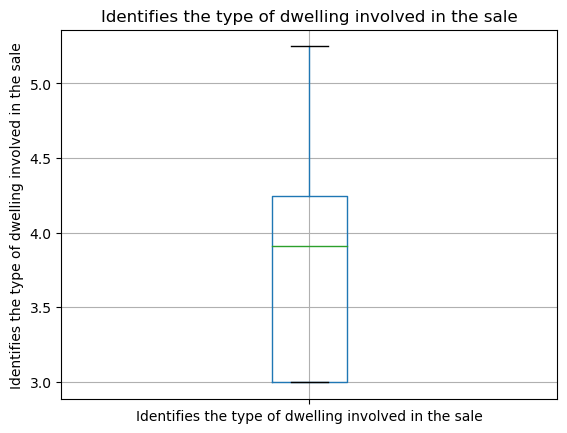

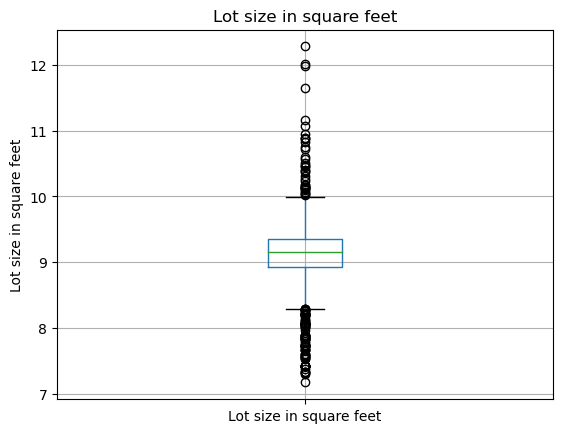

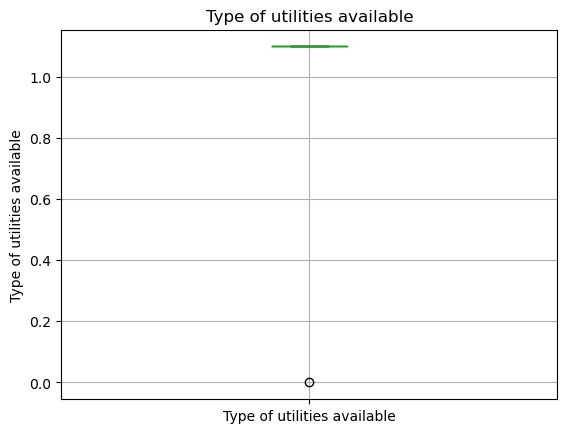

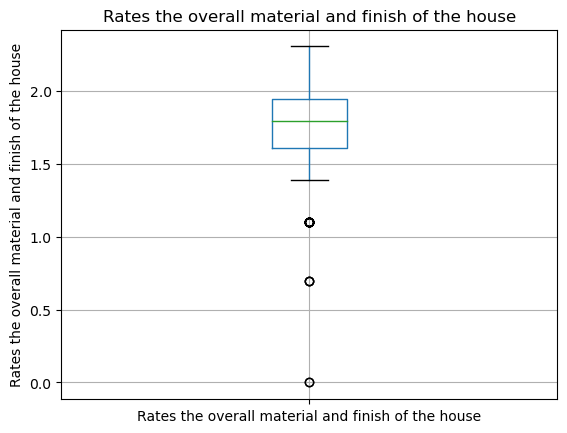

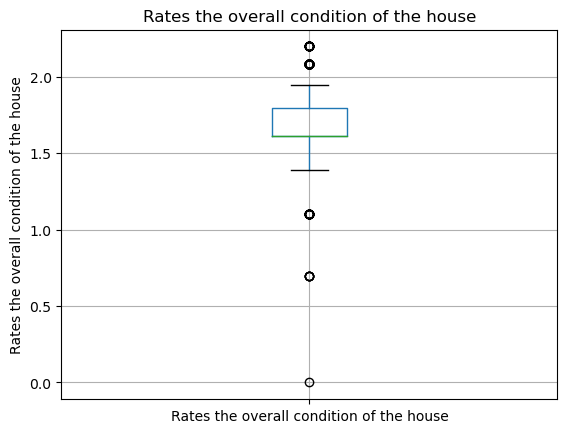

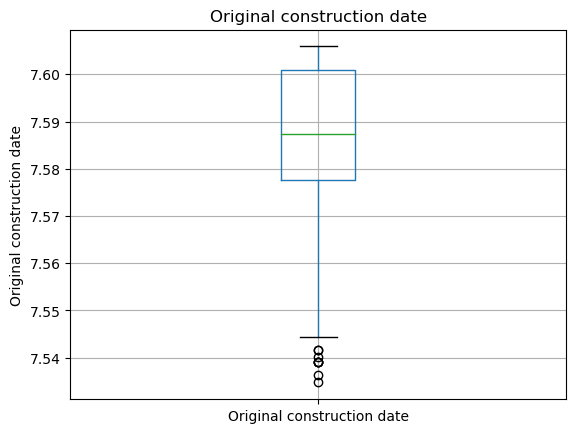

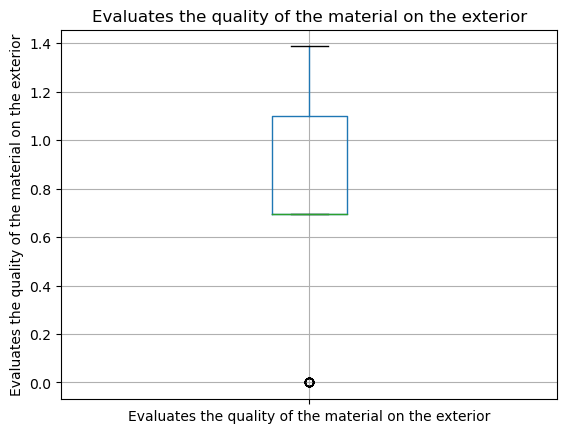

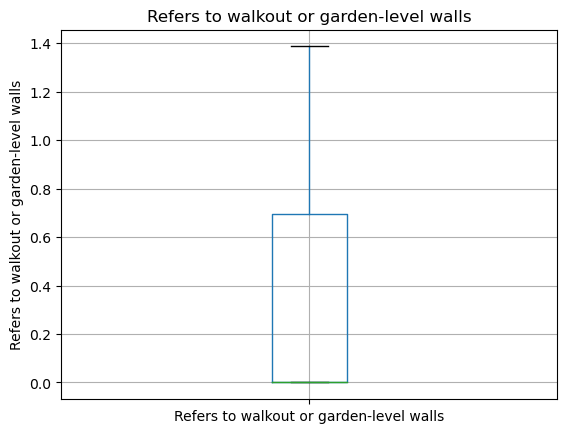

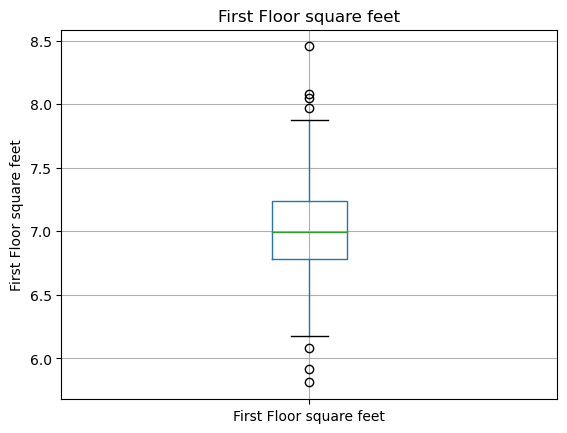

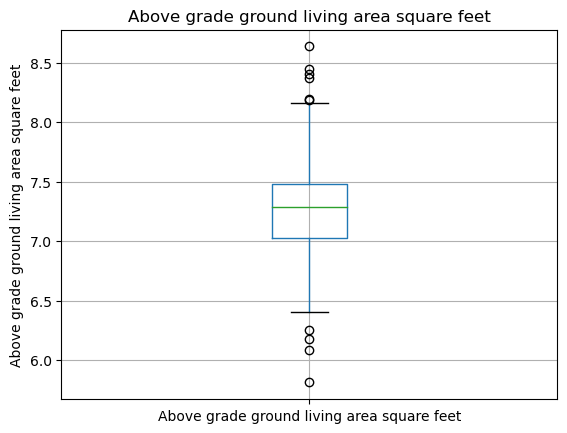

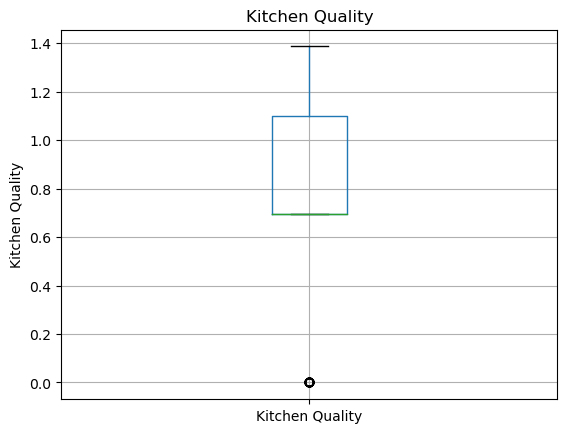

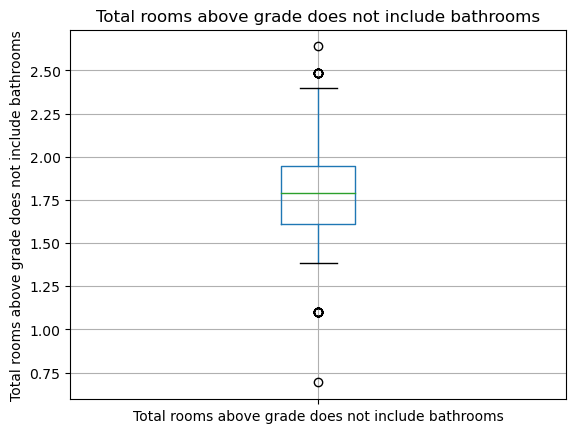

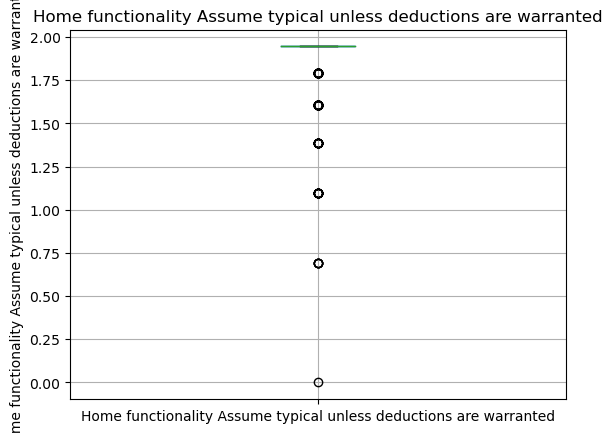

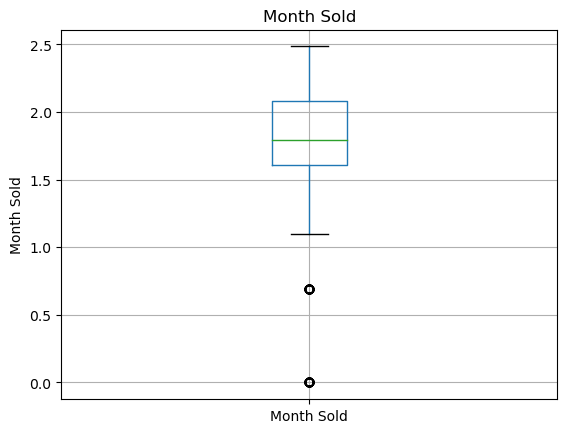

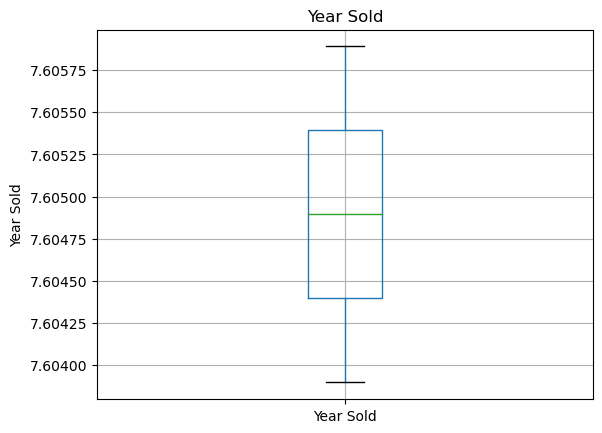

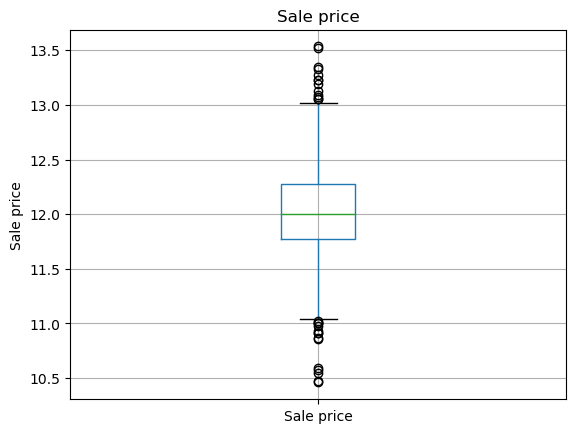

In [181]:
for feature in continuous_feature:
    housing_data_outlier = housing_data_1_encod.copy()
    if 0 in housing_data_outlier[feature].unique():
        pass
    else:
        housing_data_outlier[feature] = np.log(housing_data_outlier[feature])
        housing_data_outlier.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

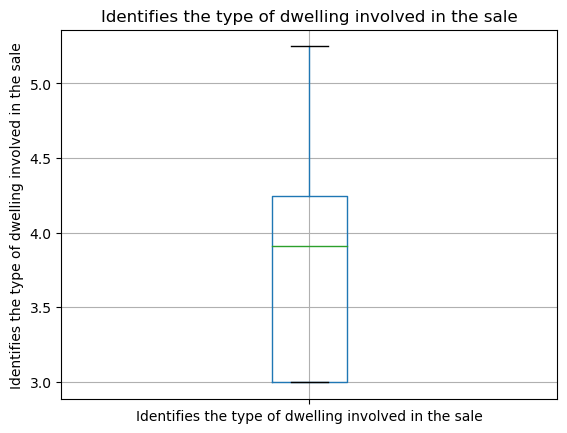

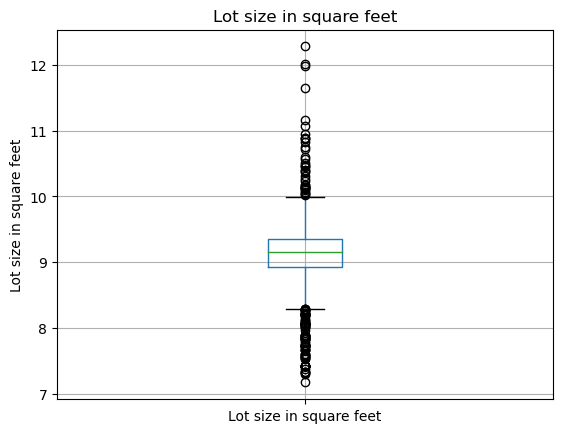

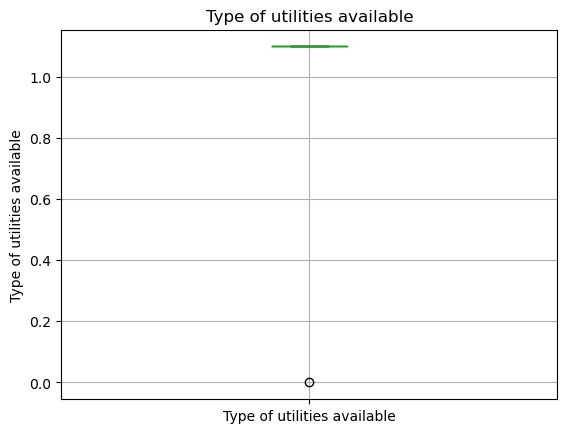

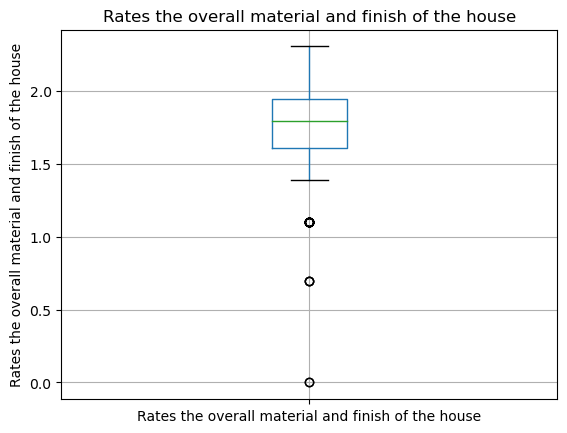

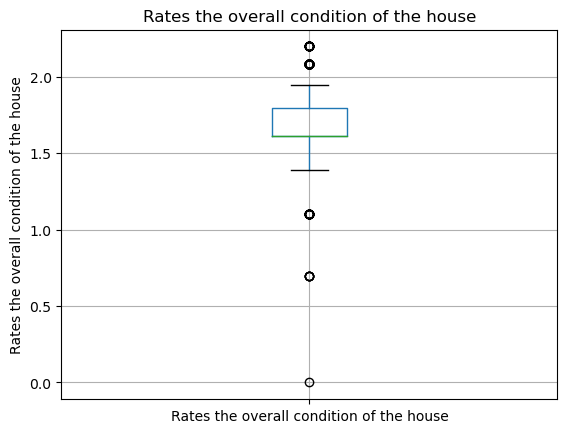

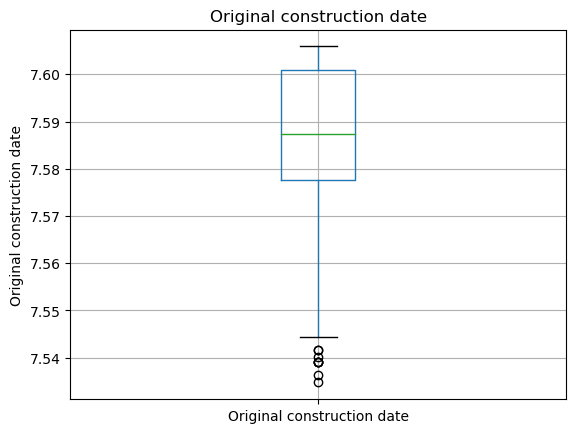

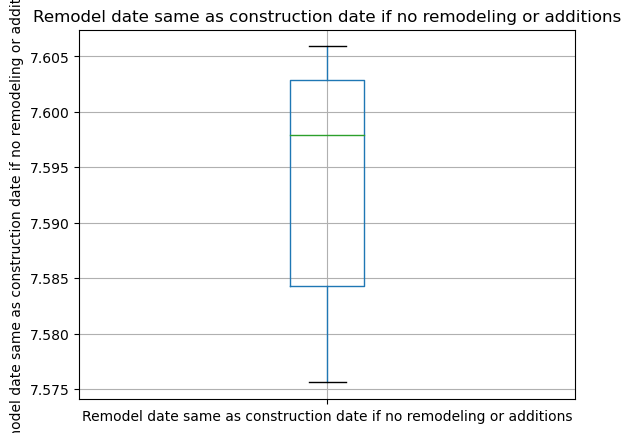

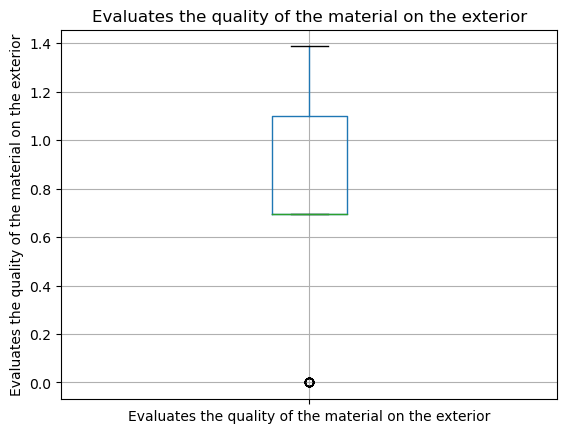

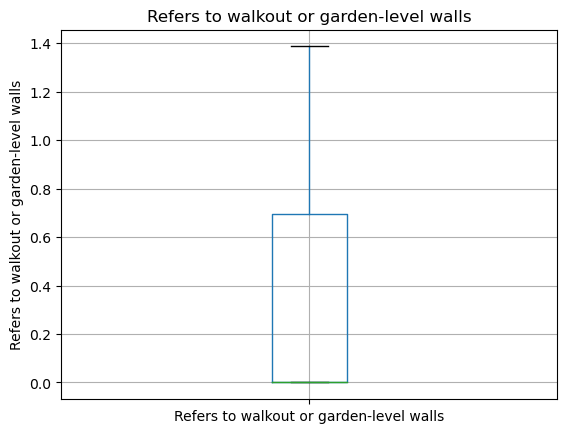

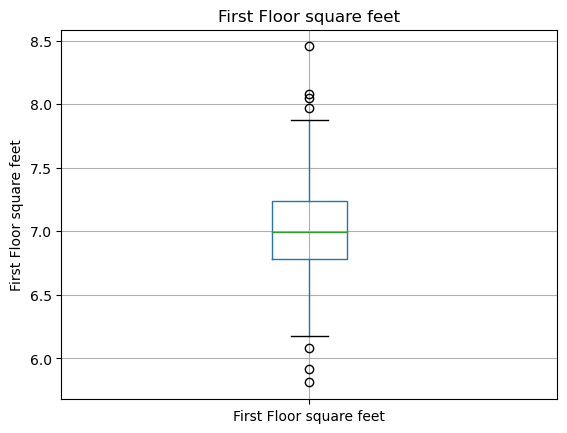

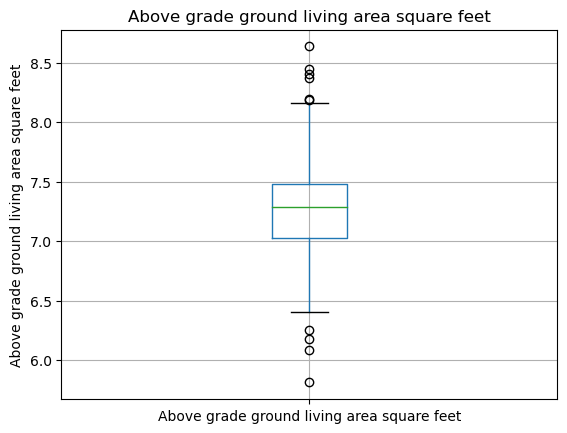

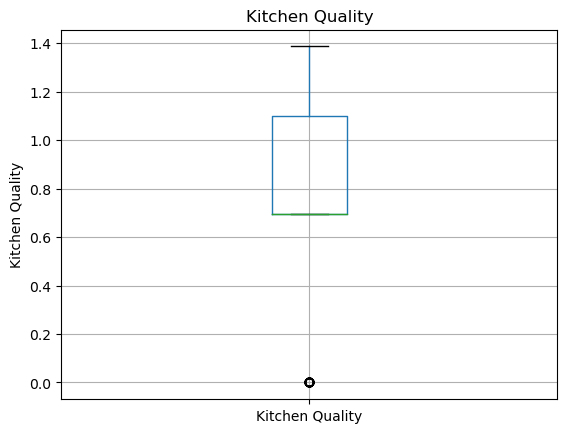

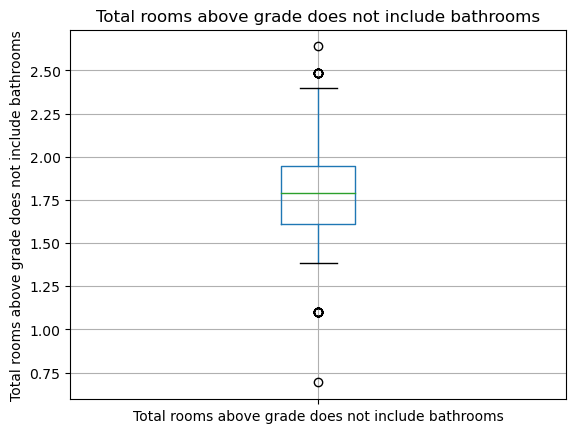

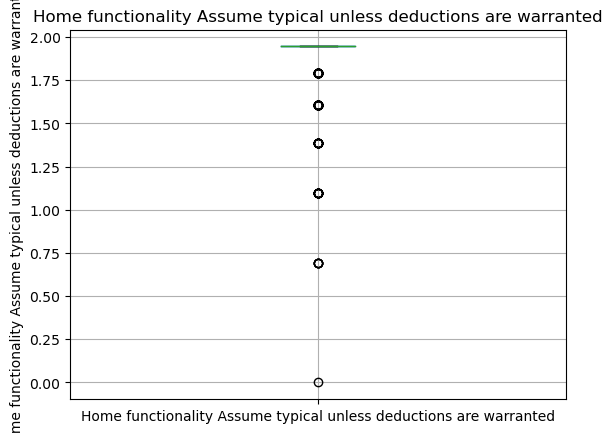

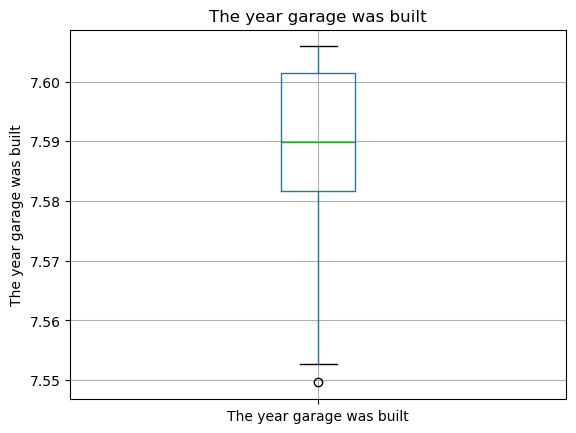

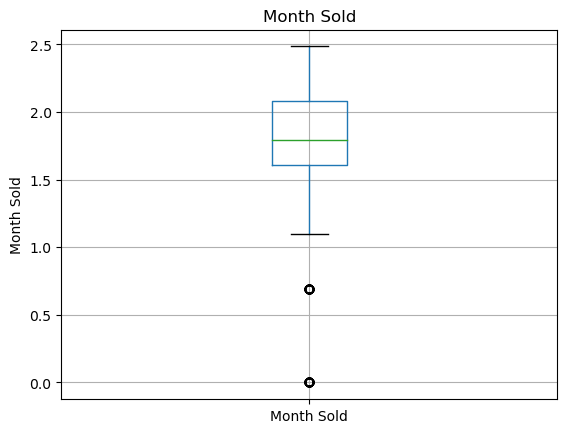

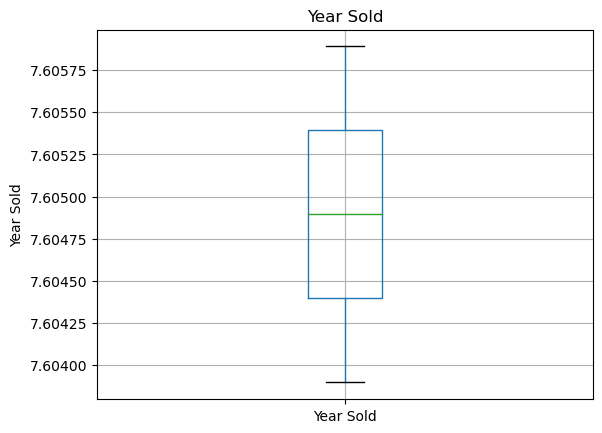

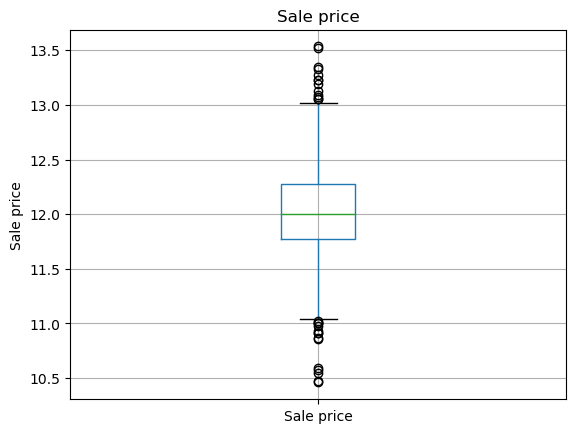

In [182]:
for feature in numerical_features:
    housing_data_numeric_outlier = housing_data_1_encod.copy()
    if 0 in housing_data_numeric_outlier[feature].unique():
        pass
    else:
        housing_data_numeric_outlier[feature] = np.log(housing_data_numeric_outlier[feature])
        housing_data_numeric_outlier.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show() 

In [183]:
outliers = [] 

def detect_outliers_iqr(Data):
    data = sorted(Data)
    q1= np.percentile(Data,25)
    q3= np.percentile(Data,75)
    # print(q1,q3)
    IQR = q3 - q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in Data:
        if(i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

# Finding Sale price outlier and trimming and capping that

In [184]:
outliers = detect_outliers_iqr(housing_data_1_encod['Sale price'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617]

<Axes: ylabel='Sale price'>

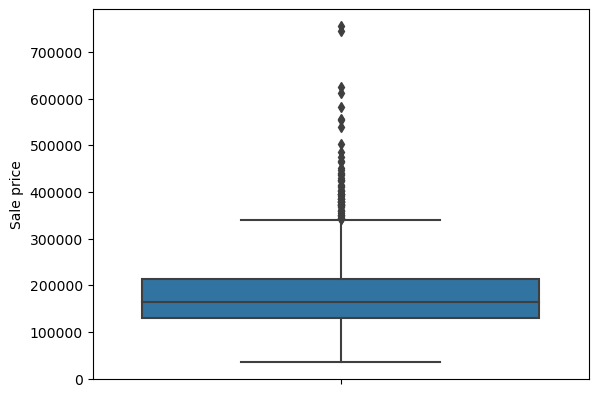

In [185]:
sns.boxplot(y ='Sale price', data=housing_data_1_encod)
# sns.boxplot(y ='Lot size in square feet', data=housing_data_1)
# sns.boxplot(y ='Original construction date', data=housing_data_1)
# sns.boxplot(y ='First Floor square feet', data=housing_data_1)
# sns.boxplot(y ='Above grade ground living area square feet', data=housing_data_1)
# sns.boxplot(y ='Total rooms above grade does not include bathrooms', data=housing_data_1)

In [186]:
q3 = housing_data_1_encod['Sale price'].quantile(0.75)
q1 = housing_data_1_encod['Sale price'].quantile(0.25)
print(q3)
print(q1)

214000.0
129975.0


In [187]:
IQR = q3-q1
print(IQR)

84025.0


In [188]:
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

3937.5
340037.5


In [189]:
Sale_price_outliers = np.where(housing_data_1_encod['Sale price'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Sale price'] < lower_limit, True, False))

In [190]:
print(Sale_price_outliers)

[False False False ... False False False]


In [191]:
housing_data_1 = housing_data_1_encod.loc[~(Sale_price_outliers)]

In [192]:
print(housing_data_1_encod.shape)
print(housing_data_1.shape)

(1460, 196)
(1399, 196)


<Axes: ylabel='Sale price'>

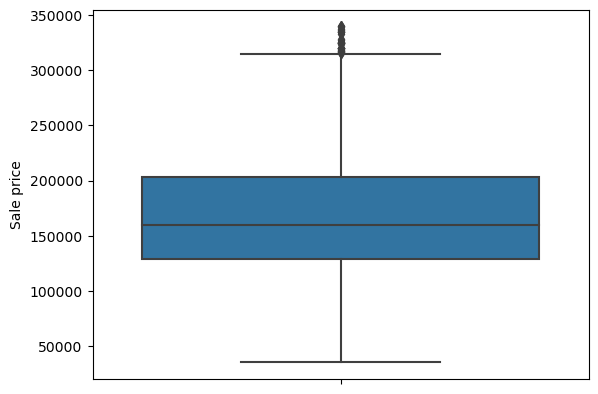

In [193]:
sns.boxplot(y = 'Sale price', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2702021828.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Sale price'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2702021828.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1['Sale

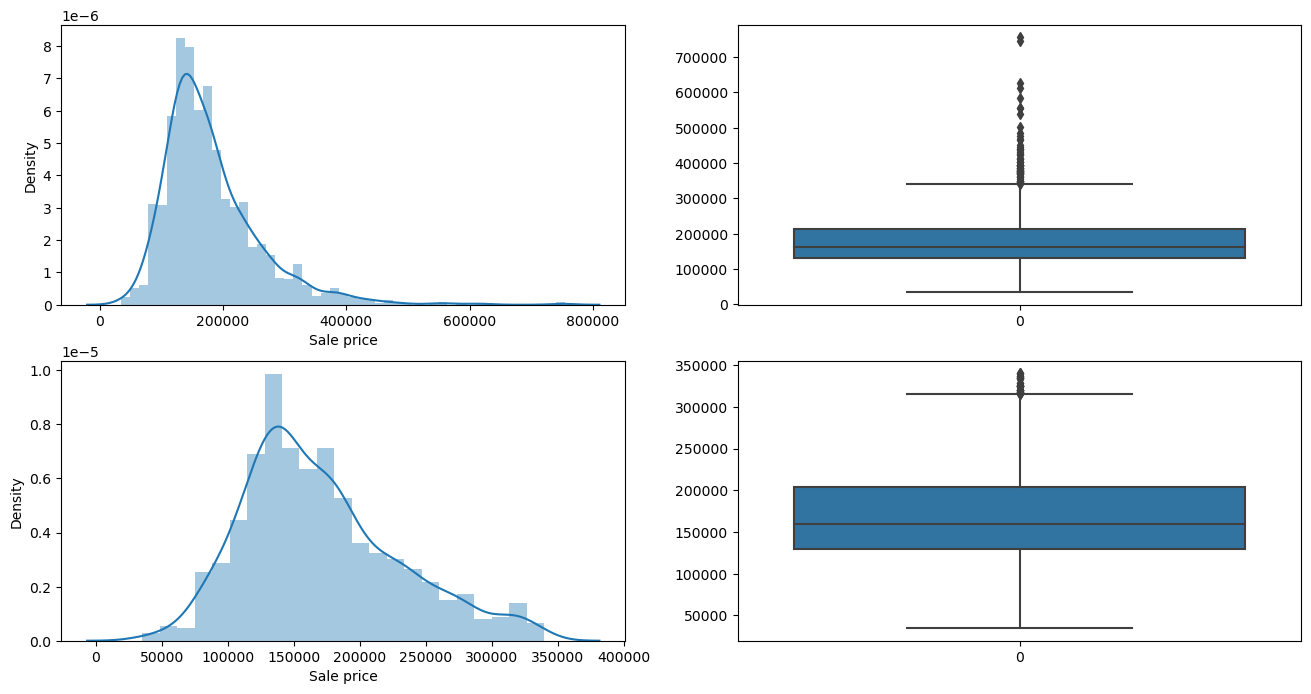

In [194]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Sale price'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Sale price'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Sale price'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Sale price'])
plt.show()

# Finding Lot size in square feet outlier and trimming and capping that

In [195]:
outliers = detect_outliers_iqr(housing_data_1_encod['Lot size in square feet'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Lot size in square feet'>

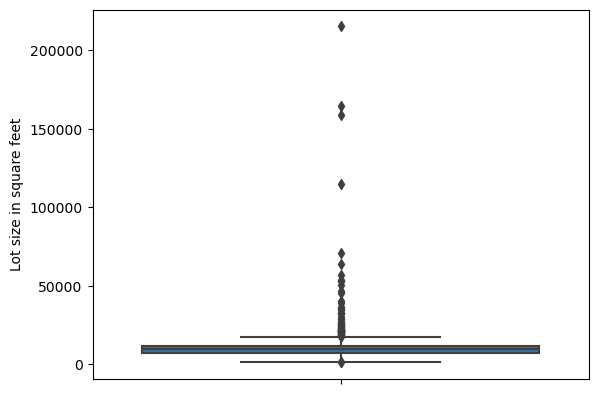

In [196]:
sns.boxplot(y ='Lot size in square feet', data=housing_data_1_encod)

In [197]:
q3 = housing_data_1_encod['Lot size in square feet'].quantile(0.75)
q1 = housing_data_1_encod['Lot size in square feet'].quantile(0.25)
print(q3)
print(q1)

11601.5
7553.5


In [198]:
IQR = q3 -q1
print(IQR)

4048.0


In [199]:
lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

Lot_size_squarefeet_outliers = np.where(housing_data_1_encod['Lot size in square feet'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Lot size in square feet'] < lower_limit, True, False))

print(Lot_size_squarefeet_outliers)

1481.5
17673.5
[False False False ... False False False]


(1460, 196)
(1391, 196)


<Axes: ylabel='Lot size in square feet'>

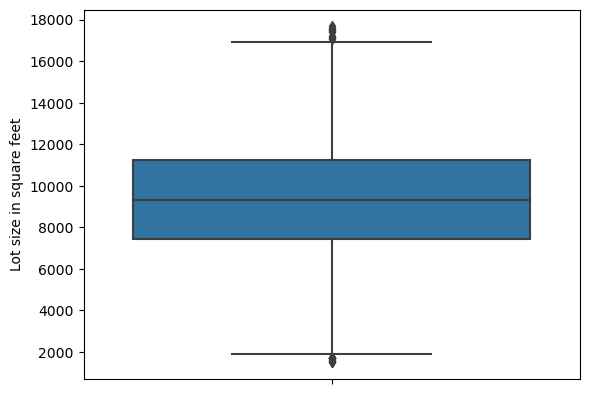

In [200]:
housing_data_1 = housing_data_1_encod.loc[~(Lot_size_squarefeet_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Lot size in square feet', data=housing_data_1 )

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\4088611886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Lot size in square feet'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\4088611886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing

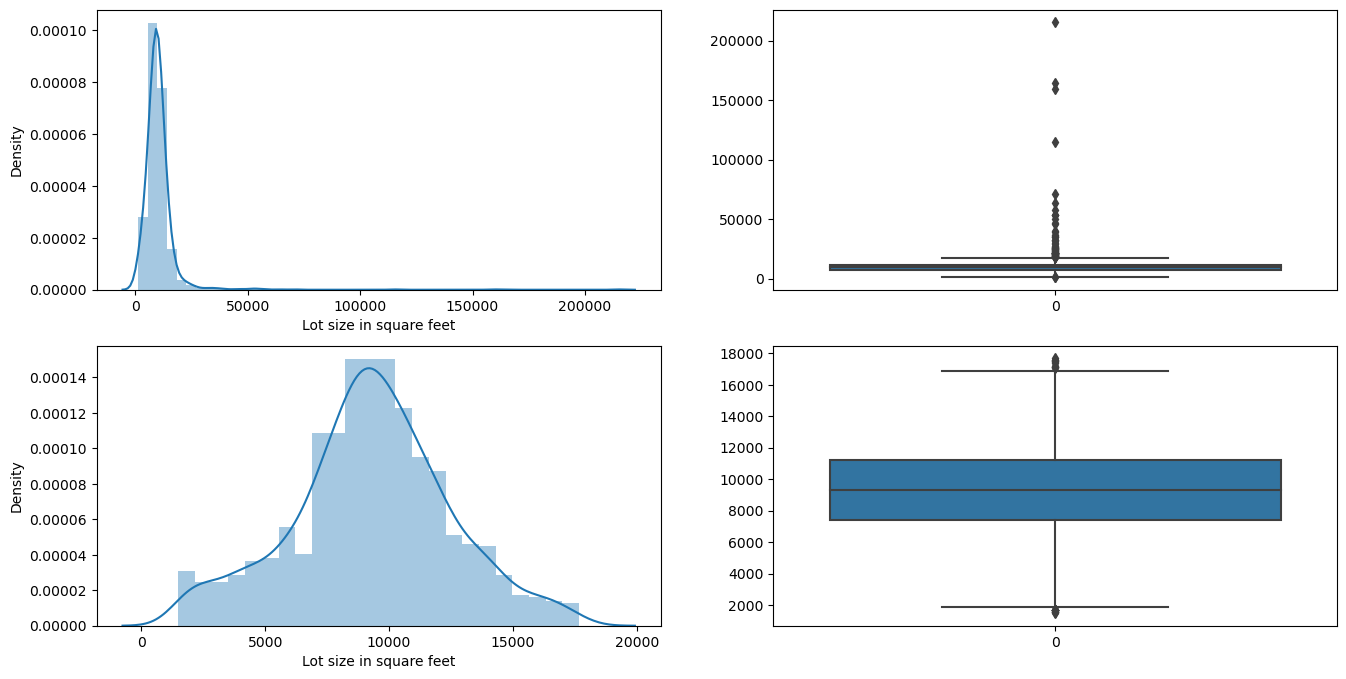

In [201]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Lot size in square feet'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Lot size in square feet'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Lot size in square feet'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Lot size in square feet'])
plt.show()

# Finding Original construction date outlier and trimming and capping that

In [202]:
outliers = detect_outliers_iqr(housing_data_1_encod['Original construction date'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Original construction date'>

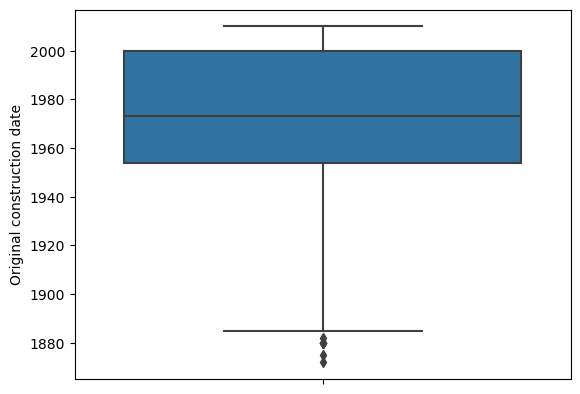

In [203]:
sns.boxplot(y ='Original construction date', data=housing_data_1_encod)

2000.0
1954.0
46.0
1885.0
2069.0
[False False False ... False False False]
(1460, 196)
(1453, 196)


<Axes: ylabel='Original construction date'>

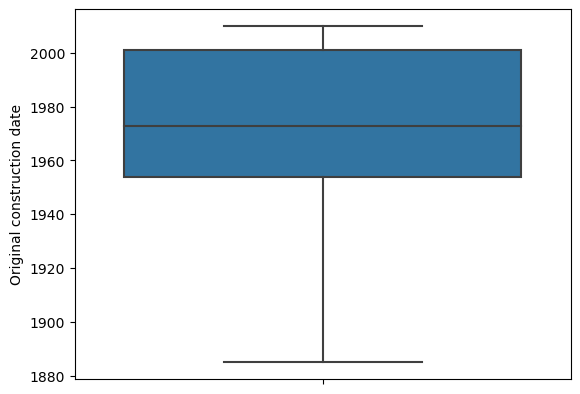

In [204]:
q3 = housing_data_1_encod['Original construction date'].quantile(0.75)
q1 = housing_data_1_encod['Original construction date'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

original_construction_outliers = np.where(housing_data_1_encod['Original construction date'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Original construction date'] < lower_limit, True, False))

print(original_construction_outliers)


housing_data_1 = housing_data_1_encod.loc[~(original_construction_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Original construction date', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\1612419057.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Original construction date'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\1612419057.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hous

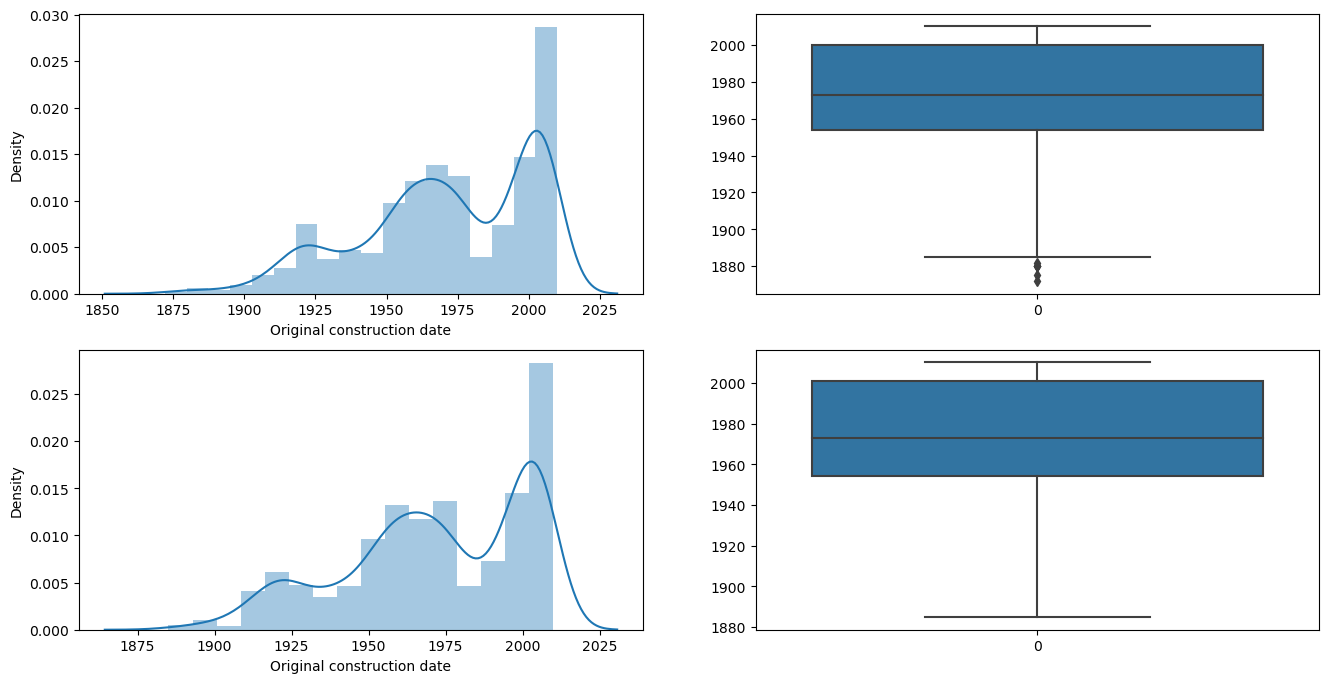

In [205]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Original construction date'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Original construction date'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Original construction date'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Original construction date'])
plt.show()

# Finding First floor square feet outlier and trimming and capping that

In [206]:
outliers = detect_outliers_iqr(housing_data_1_encod['First Floor square feet'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='First Floor square feet'>

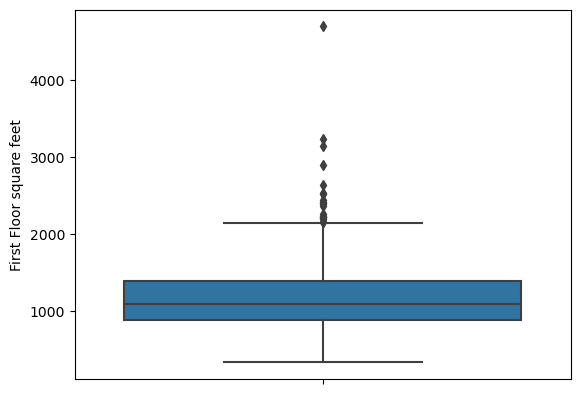

In [207]:
sns.boxplot(y ='First Floor square feet', data=housing_data_1_encod)

1391.25
882.0
509.25
118.125
2155.125
[False False False ... False False False]
(1460, 196)
(1440, 196)


<Axes: ylabel='First Floor square feet'>

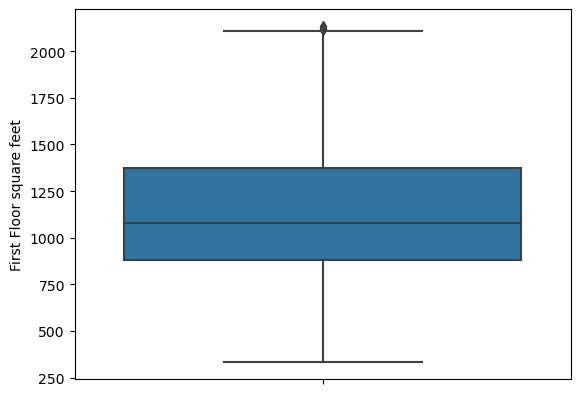

In [208]:
q3 = housing_data_1_encod['First Floor square feet'].quantile(0.75)
q1 = housing_data_1_encod['First Floor square feet'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

first_floor_construction_outliers = np.where(housing_data_1_encod['First Floor square feet'] > upper_limit, True, 
                               np.where(housing_data_1_encod['First Floor square feet'] < lower_limit, True, False))

print(first_floor_construction_outliers)


housing_data_1 = housing_data_1_encod.loc[~(first_floor_construction_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'First Floor square feet', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\4172449595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['First Floor square feet'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\4172449595.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing

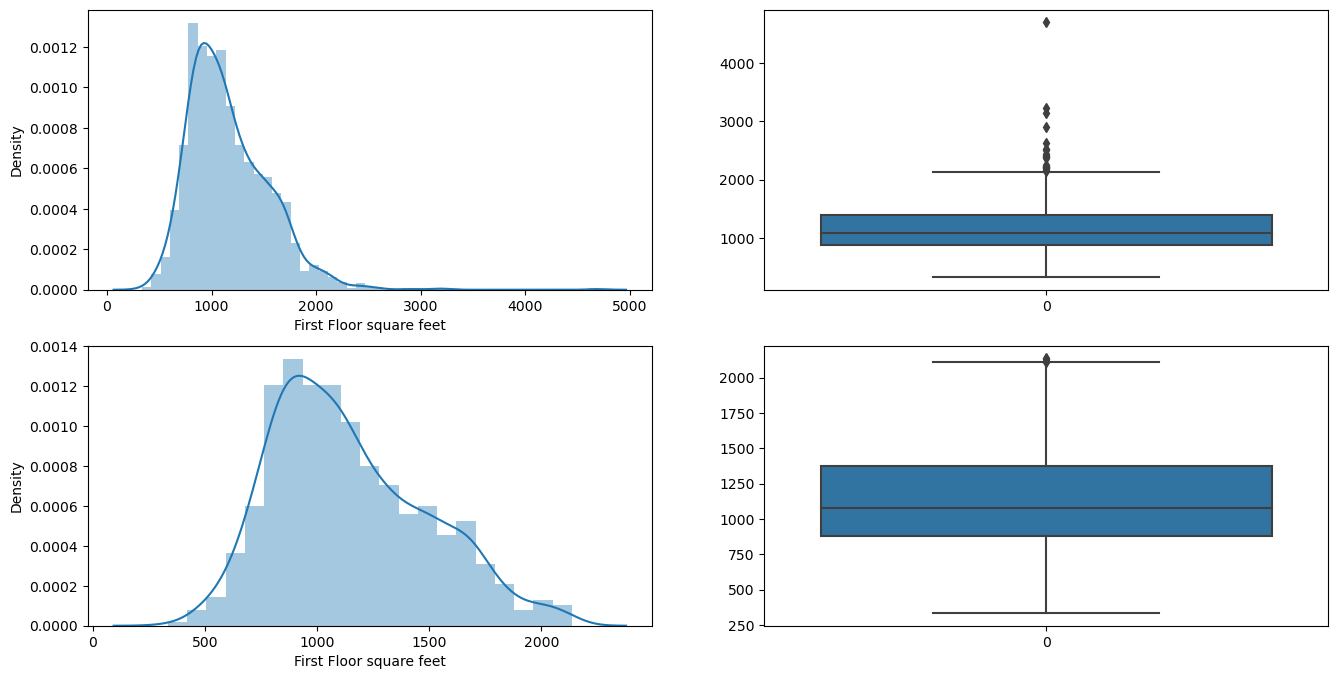

In [209]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['First Floor square feet'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['First Floor square feet'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['First Floor square feet'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['First Floor square feet'])
plt.show()

# Finding Above grade ground living area square feet outlier and trimming and capping that

In [210]:
outliers = detect_outliers_iqr(housing_data_1_encod['Above grade ground living area square feet'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Above grade ground living area square feet'>

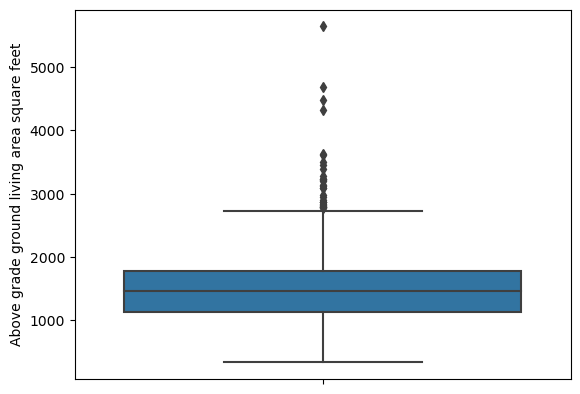

In [211]:
sns.boxplot(y= 'Above grade ground living area square feet', data = housing_data_1_encod)

1776.75
1129.5
647.25
158.625
2747.625
[False False False ... False False False]
(1460, 196)
(1429, 196)


<Axes: ylabel='Above grade ground living area square feet'>

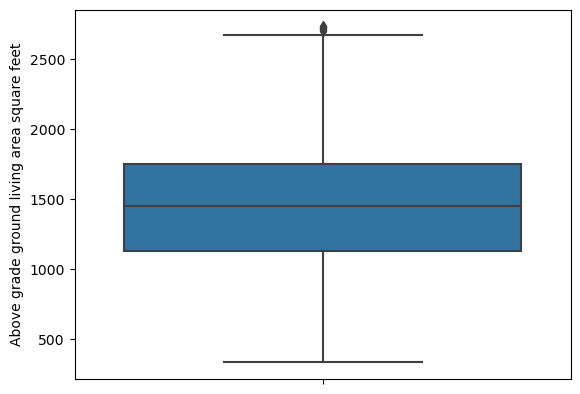

In [212]:
q3 = housing_data_1_encod['Above grade ground living area square feet'].quantile(0.75)
q1 = housing_data_1_encod['Above grade ground living area square feet'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

above_grade_ground_living_outliers = np.where(housing_data_1_encod['Above grade ground living area square feet'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Above grade ground living area square feet'] < lower_limit, True, False))

print(above_grade_ground_living_outliers)


housing_data_1 = housing_data_1_encod.loc[~(above_grade_ground_living_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Above grade ground living area square feet', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2855268462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Above grade ground living area square feet'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2855268462.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

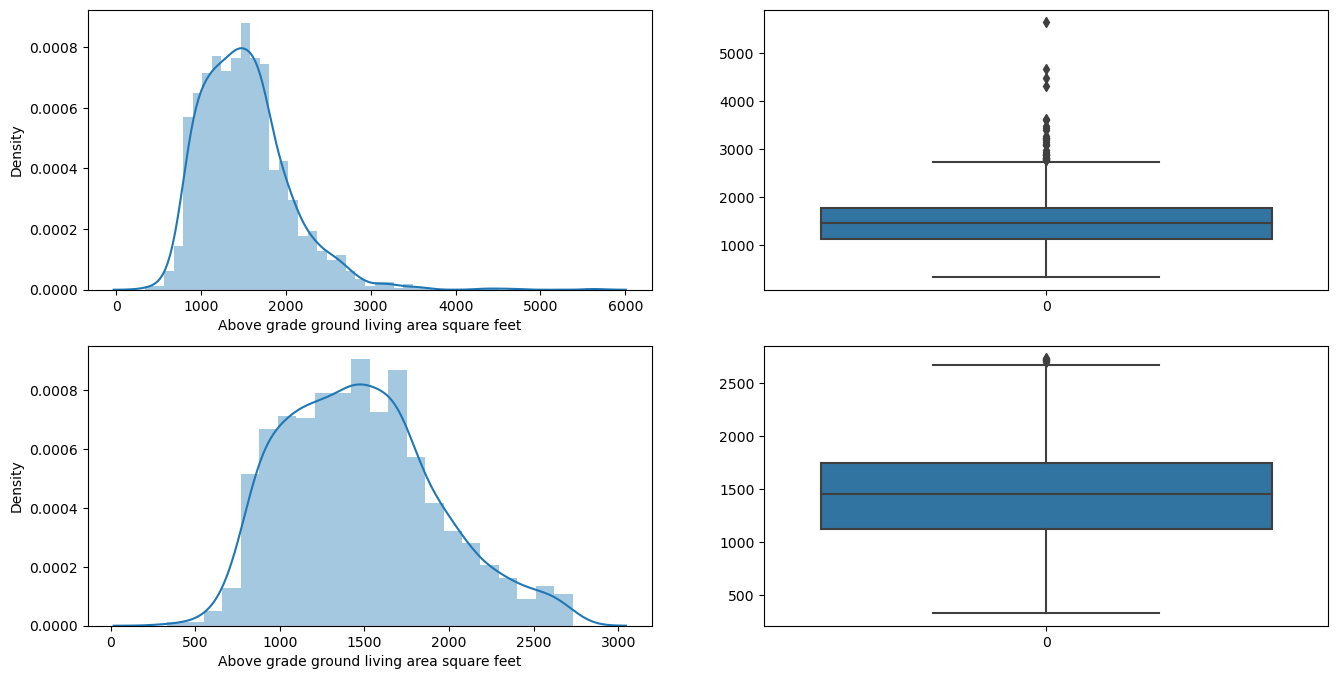

In [213]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Above grade ground living area square feet'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Above grade ground living area square feet'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Above grade ground living area square feet'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Above grade ground living area square feet'])
plt.show()

# Finding Total rooms above grade does not include bathrooms outlier and trimming and capping that

In [214]:
outliers = detect_outliers_iqr(housing_data_1_encod['Total rooms above grade does not include bathrooms'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Total rooms above grade does not include bathrooms'>

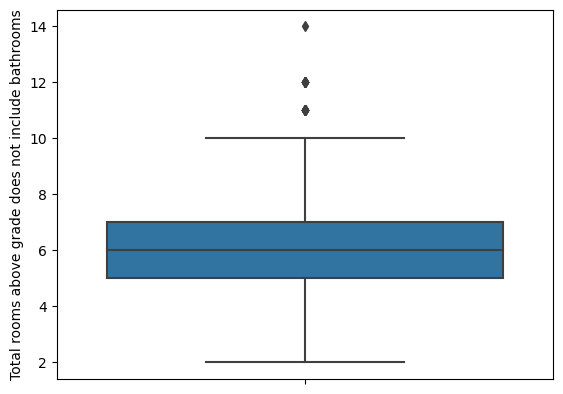

In [215]:
sns.boxplot(y= 'Total rooms above grade does not include bathrooms', data = housing_data_1_encod)

7.0
5.0
2.0
2.0
10.0
[False False False ... False False False]
(1460, 196)
(1430, 196)


<Axes: ylabel='Total rooms above grade does not include bathrooms'>

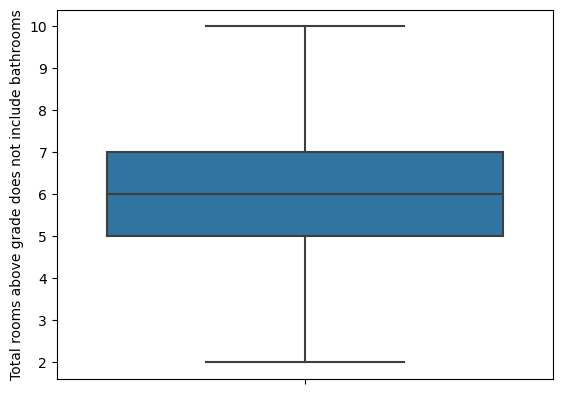

In [216]:
q3 = housing_data_1_encod['Total rooms above grade does not include bathrooms'].quantile(0.75)
q1 = housing_data_1_encod['Total rooms above grade does not include bathrooms'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

rooms_without_bathrooms_outliers = np.where(housing_data_1_encod['Total rooms above grade does not include bathrooms'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Total rooms above grade does not include bathrooms'] < lower_limit, True, False))

print(rooms_without_bathrooms_outliers)


housing_data_1 = housing_data_1_encod.loc[~(rooms_without_bathrooms_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Total rooms above grade does not include bathrooms', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2144930596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Total rooms above grade does not include bathrooms'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\2144930596.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

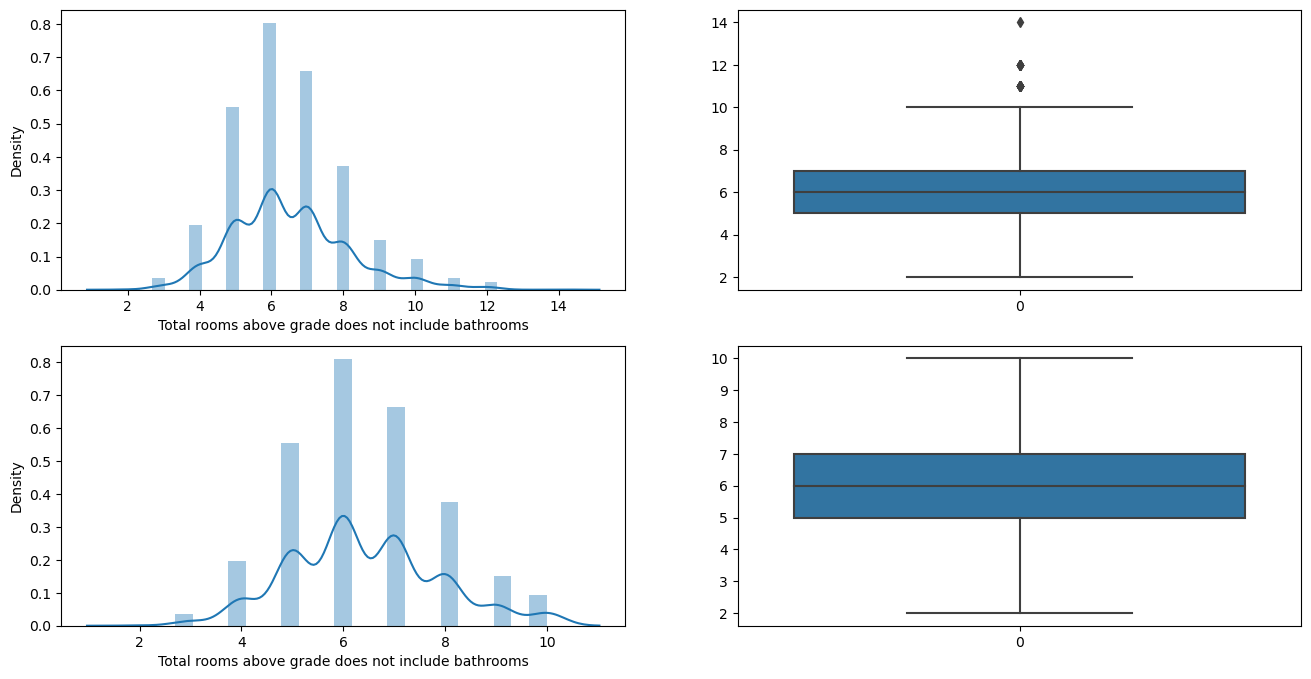

In [217]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Total rooms above grade does not include bathrooms'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Total rooms above grade does not include bathrooms'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Total rooms above grade does not include bathrooms'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Total rooms above grade does not include bathrooms'])
plt.show()

# Finding Rates the overall condition of the house outlier and trimming and capping that

In [218]:
outliers = detect_outliers_iqr(housing_data_1_encod['Rates the overall condition of the house'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Rates the overall condition of the house'>

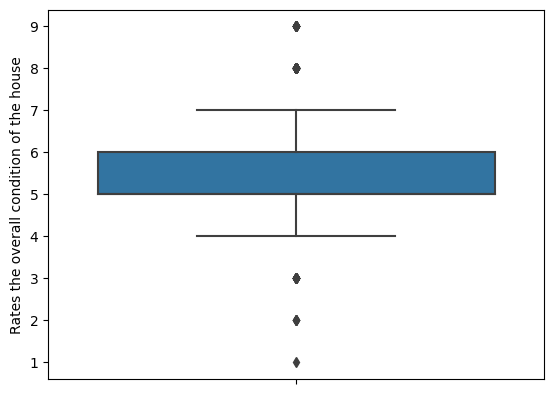

In [219]:
sns.boxplot(y= 'Rates the overall condition of the house', data = housing_data_1_encod)

6.0
5.0
1.0
3.5
7.5
[False  True False ...  True False False]
(1460, 196)
(1335, 196)


<Axes: ylabel='Rates the overall condition of the house'>

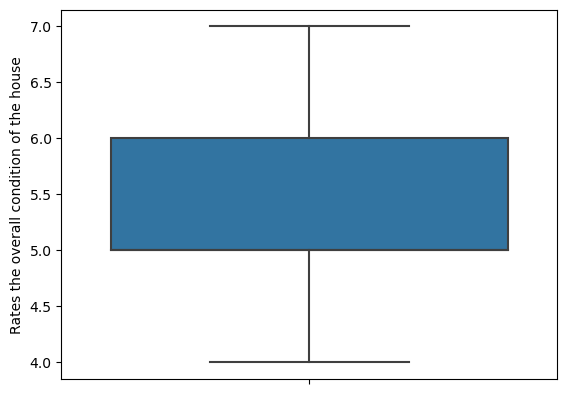

In [220]:
q3 = housing_data_1_encod['Rates the overall condition of the house'].quantile(0.75)
q1 = housing_data_1_encod['Rates the overall condition of the house'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

condition_of_the_house_outliers = np.where(housing_data_1_encod['Rates the overall condition of the house'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Rates the overall condition of the house'] < lower_limit, True, False))

print(condition_of_the_house_outliers)


housing_data_1 = housing_data_1_encod.loc[~(condition_of_the_house_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Rates the overall condition of the house', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\3989620806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Rates the overall condition of the house'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\3989620806.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

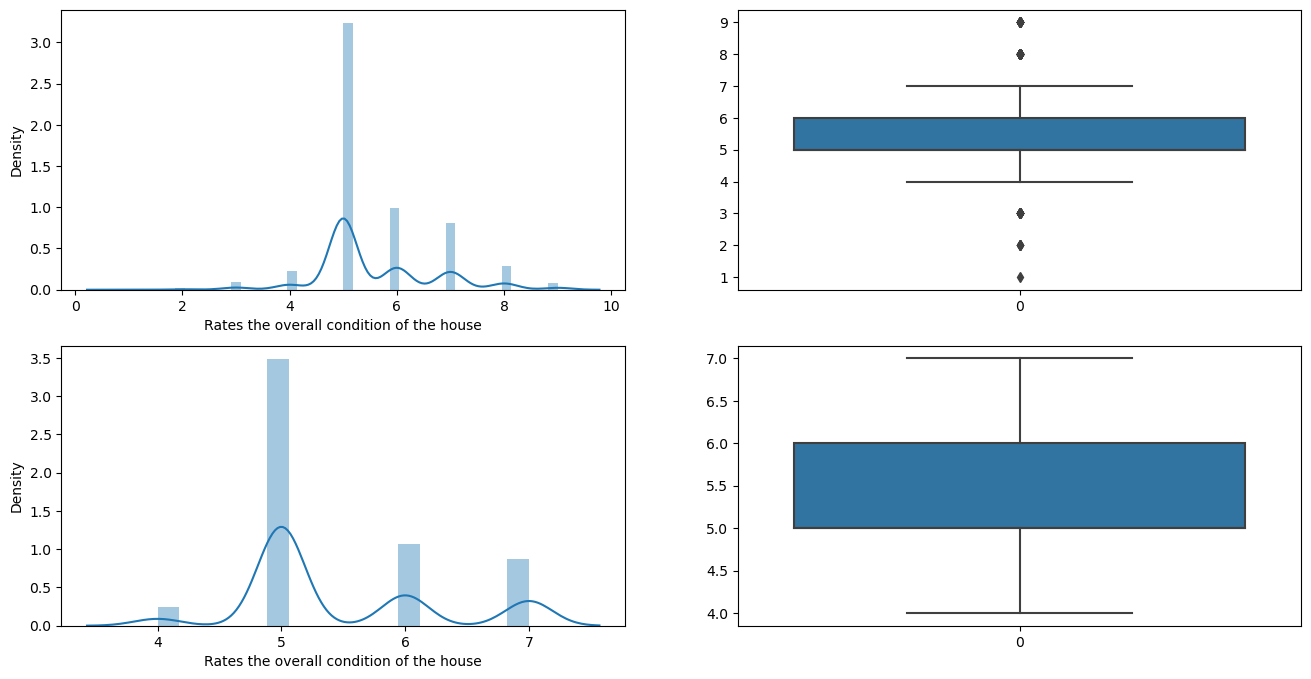

In [221]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Rates the overall condition of the house'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Rates the overall condition of the house'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Rates the overall condition of the house'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Rates the overall condition of the house'])
plt.show()

# Finding Rates the overall material and finish of the house outlier and trimming and capping that

In [222]:
outliers = detect_outliers_iqr(housing_data_1_encod['Rates the overall material and finish of the house'])
outliers

[345000,
 385000,
 438780,
 383970,
 372402,
 412500,
 501837,
 475000,
 386250,
 403000,
 415298,
 360000,
 375000,
 342643,
 354000,
 377426,
 437154,
 394432,
 426000,
 555000,
 440000,
 380000,
 374000,
 430000,
 402861,
 446261,
 369900,
 451950,
 359100,
 345000,
 370878,
 350000,
 402000,
 423000,
 372500,
 392000,
 755000,
 361919,
 341000,
 538000,
 395000,
 485000,
 582933,
 385000,
 350000,
 611657,
 395192,
 348000,
 556581,
 424870,
 625000,
 392500,
 745000,
 367294,
 465000,
 378500,
 381000,
 410000,
 466500,
 377500,
 394617,
 50271,
 19900,
 21000,
 21453,
 19378,
 31770,
 22950,
 25419,
 159000,
 19296,
 39104,
 19138,
 18386,
 215245,
 164660,
 20431,
 18800,
 53107,
 34650,
 22420,
 21750,
 70761,
 53227,
 40094,
 32668,
 21872,
 21780,
 25095,
 46589,
 20896,
 18450,
 21535,
 26178,
 115149,
 21695,
 53504,
 21384,
 28698,
 45600,
 17920,
 25286,
 27650,
 24090,
 25000,
 1300,
 21286,
 1477,
 21750,
 29959,
 18000,
 23257,
 17755,
 35760,
 18030,
 35133,
 32463,
 

<Axes: ylabel='Rates the overall material and finish of the house'>

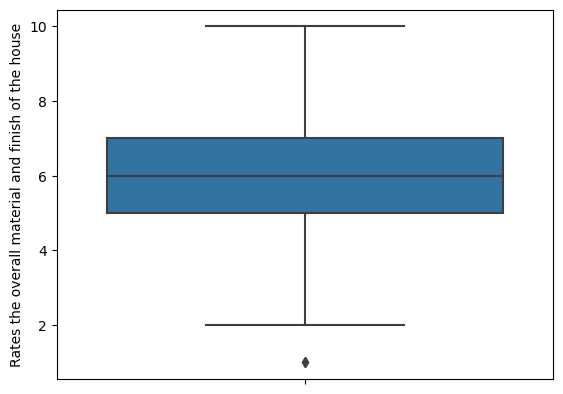

In [223]:
sns.boxplot(y= 'Rates the overall material and finish of the house', data = housing_data_1_encod)

7.0
5.0
2.0
2.0
10.0
[False False False ... False False False]
(1460, 196)
(1458, 196)


<Axes: ylabel='Rates the overall material and finish of the house'>

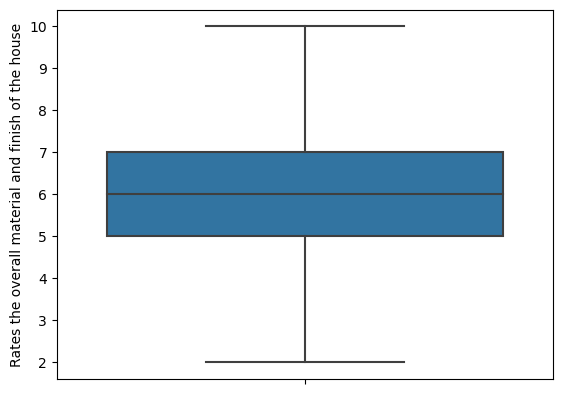

In [224]:
q3 = housing_data_1_encod['Rates the overall material and finish of the house'].quantile(0.75)
q1 = housing_data_1_encod['Rates the overall material and finish of the house'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

material_and_finish_of_the_house_outliers = np.where(housing_data_1_encod['Rates the overall material and finish of the house'] > upper_limit, True, 
                               np.where(housing_data_1_encod['Rates the overall material and finish of the house'] < lower_limit, True, False))

print(material_and_finish_of_the_house_outliers)


housing_data_1 = housing_data_1_encod.loc[~(material_and_finish_of_the_house_outliers)]

print(housing_data_1_encod.shape)
print(housing_data_1.shape)

sns.boxplot(y = 'Rates the overall material and finish of the house', data=housing_data_1)

C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\64072129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data_1_encod['Rates the overall material and finish of the house'])
C:\Users\NITESH NAMDEV\AppData\Local\Temp\ipykernel_3292\64072129.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


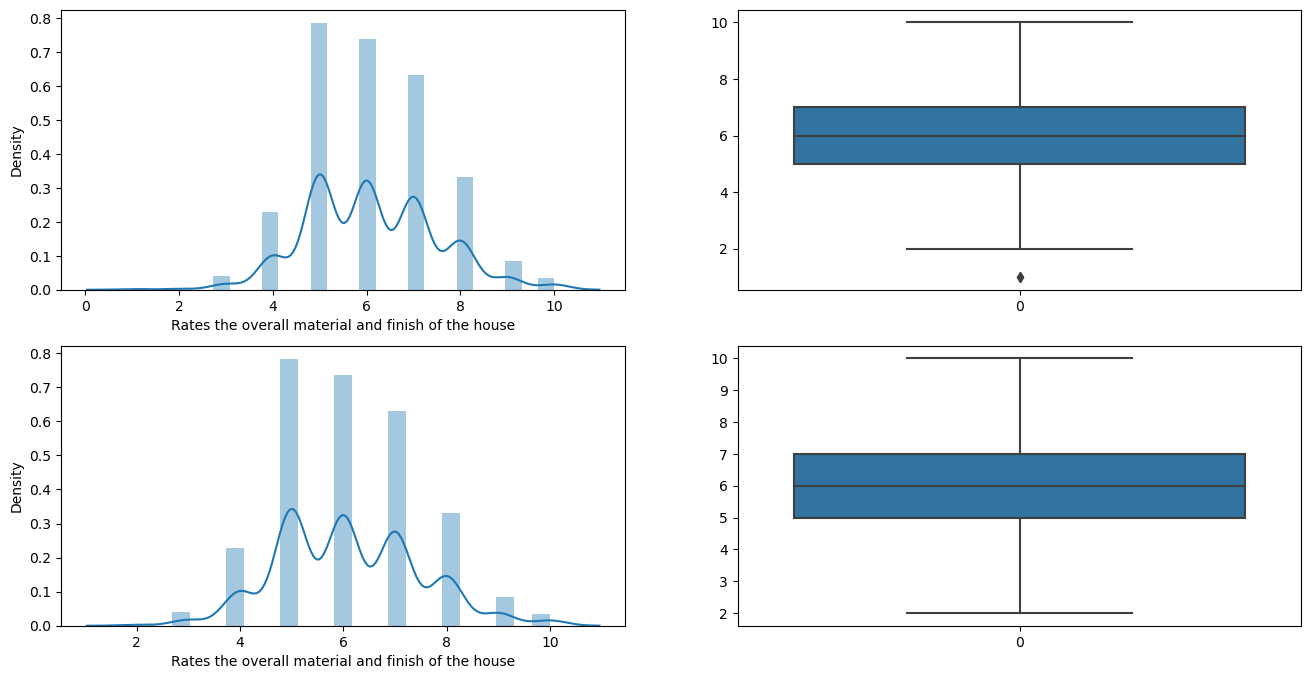

In [225]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(housing_data_1_encod['Rates the overall material and finish of the house'])
plt.subplot(2,2,2)
sns.boxplot(housing_data_1_encod['Rates the overall material and finish of the house'])
plt.subplot(2,2,3)
sns.distplot(housing_data_1['Rates the overall material and finish of the house'])
plt.subplot(2,2,4)
sns.boxplot(housing_data_1['Rates the overall material and finish of the house'])
plt.show()

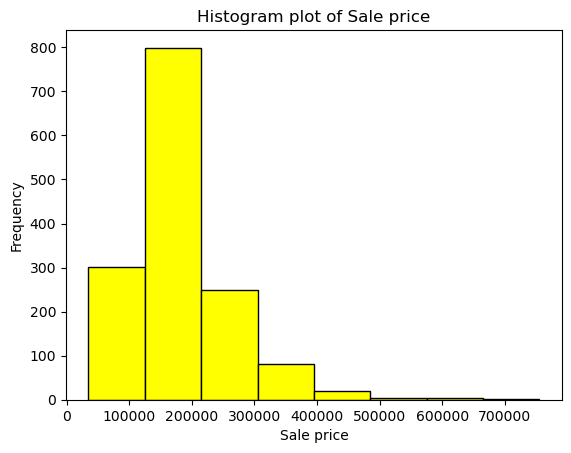

In [226]:
# Ploting Histogram

plt.hist(housing_data_1_encod['Sale price'],color = 'Yellow' , edgecolor = 'black', bins=8)
plt.title('Histogram plot of Sale price')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.show()

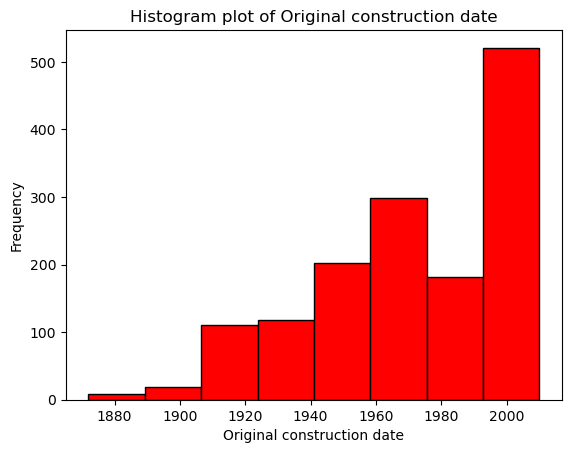

In [227]:
# Ploting Histogram

plt.hist(housing_data_1_encod['Original construction date'],color = 'red' , edgecolor = 'black', bins=8)
plt.title('Histogram plot of Original construction date')
plt.xlabel('Original construction date')
plt.ylabel('Frequency')
plt.show()

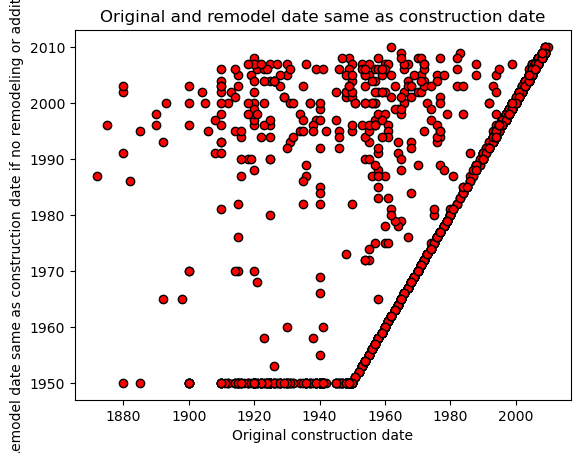

In [228]:
# Ploting Scatter plot

plt.scatter(housing_data_1_encod['Original construction date'],housing_data_1_encod['Remodel date same as construction date if no remodeling or additions'], color = 'red' , edgecolor = 'black')
plt.title('Original and remodel date same as construction date')
plt.xlabel('Original construction date')
plt.ylabel('Remodel date same as construction date if no remodeling or additions')
plt.show()

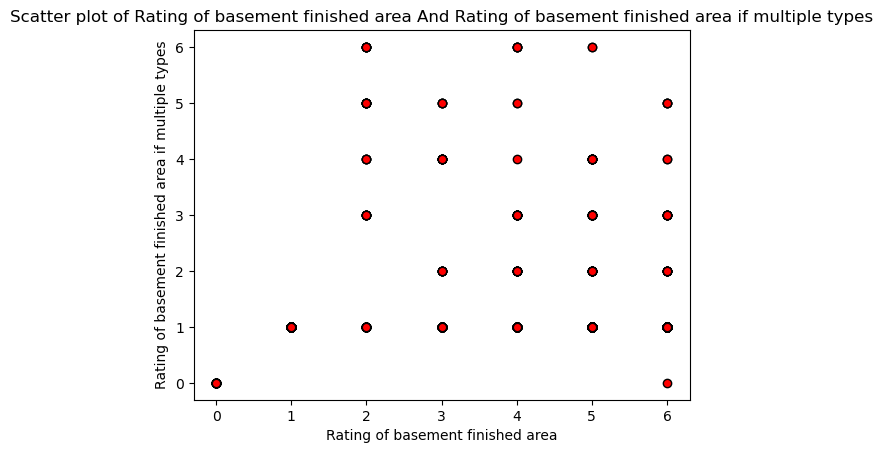

In [229]:
# Ploting Scatter plot

plt.scatter(housing_data_1_encod['Rating of basement finished area'],housing_data_1_encod['Rating of basement finished area if multiple types'], color = 'red' , edgecolor = 'black')
plt.title('Scatter plot of Rating of basement finished area And Rating of basement finished area if multiple types')
plt.xlabel('Rating of basement finished area')
plt.ylabel('Rating of basement finished area if multiple types')
plt.show()

# Z - Score Value

In [230]:
# Sum the all encoded columns
housing_data_1_encod['Sum'] = housing_data_1_encod.sum(axis=1)

print(housing_data_1_encod['Sum'])

# Outliers from Z-score
mean = housing_data_1_encod['Sum'].mean()
std_dev = housing_data_1_encod['Sum'].std()
threshold = 3 # Define Threshold
outliers = housing_data_1_encod[(housing_data_1_encod['Sum']-mean).abs() > threshold * std_dev]

print('outliers value :')
print(outliers)


0       231129.0
1       205047.0
2       249224.0
3       163561.0
4       280680.0
          ...   
1455    196844.0
1456    239530.0
1457    293486.0
1458    164959.0
1459    171635.0
Name: Sum, Length: 1460, dtype: float64
outliers value :
      Identifies the type of dwelling involved in the sale  \
58                                                   60      
178                                                  20      
185                                                  75      
313                                                  20      
349                                                  60      
440                                                  20      
473                                                  20      
496                                                  20      
527                                                  60      
591                                                  60      
661                                                  60      
664         

<Axes: ylabel='Sale price'>

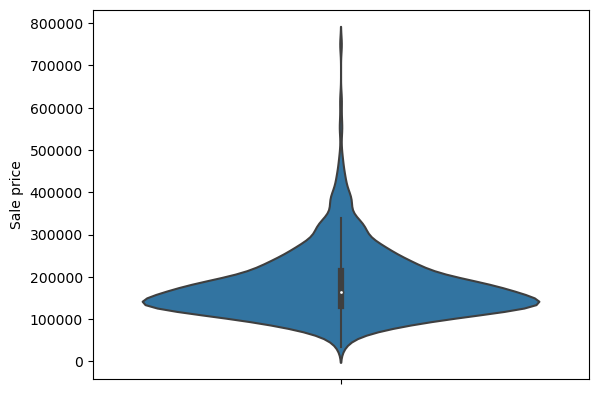

In [231]:
# From Z-score value Using Violin plot to checking outlier

sns.violinplot(y ='Sale price', data=housing_data_1_encod)

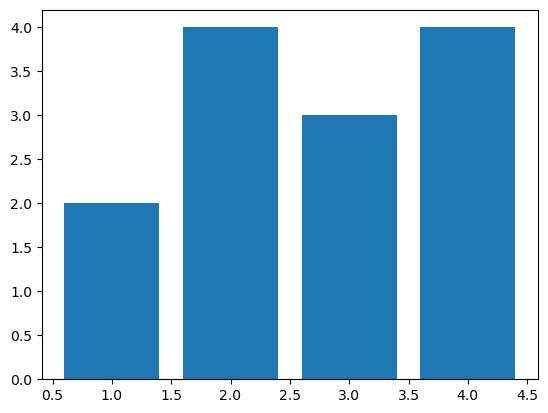

In [232]:
plt.bar(housing_data_1_encod['Evaluates the quality of the material on the exterior'],housing_data_1_encod['Evaluates the present condition of the material on the exterior'])
plt.show()

# Univariate Analysis

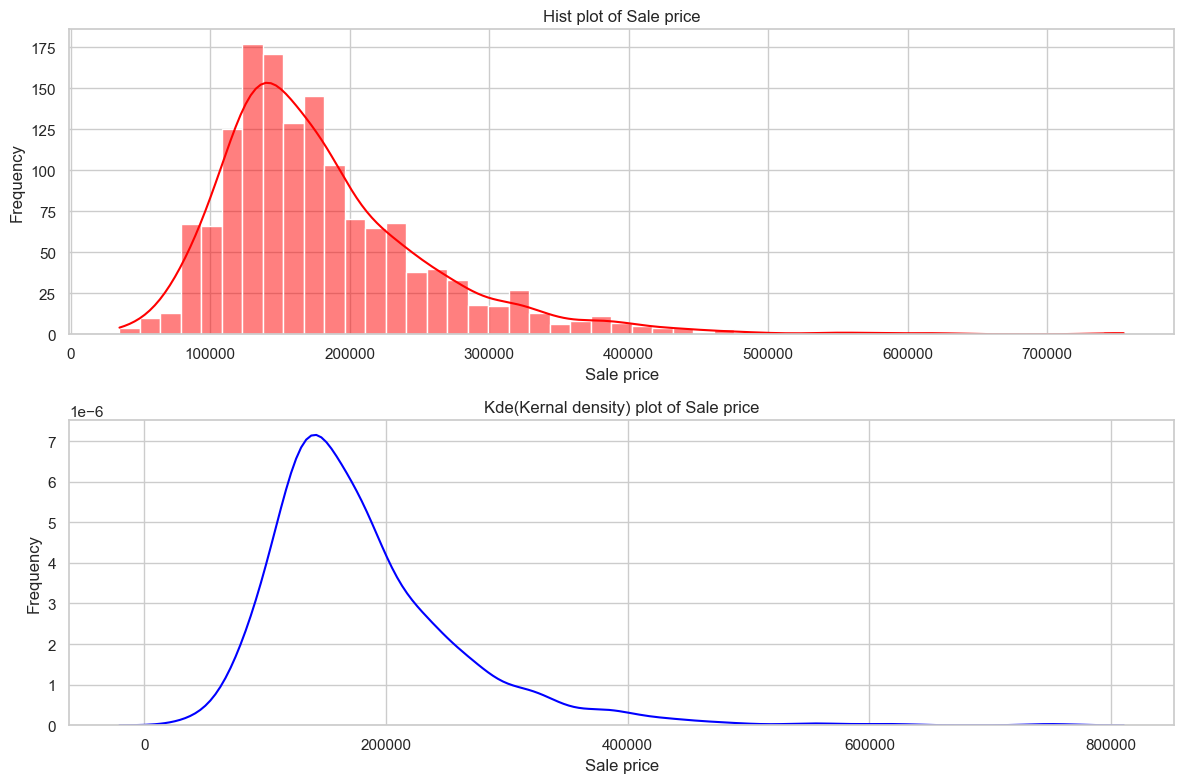

In [233]:
# Ploting Seaborn plot

sns.set(style = 'whitegrid')

fig , axes = plt.subplots(nrows=2, ncols=1, figsize = (12,8))

sns.histplot(housing_data_1['Sale price'], kde = True , color = 'red' , ax=axes[0])
axes[0].set_title('Hist plot of Sale price')
axes[0].set_xlabel('Sale price')
axes[0].set_ylabel('Frequency')

sns.kdeplot(housing_data_1['Sale price'], color = 'blue' , ax=axes[1])
axes[1].set_title('Kde(Kernal density) plot of Sale price')
axes[1].set_xlabel('Sale price')
axes[1].set_ylabel('Frequency')


plt.tight_layout()

# Show the plot
plt.show()

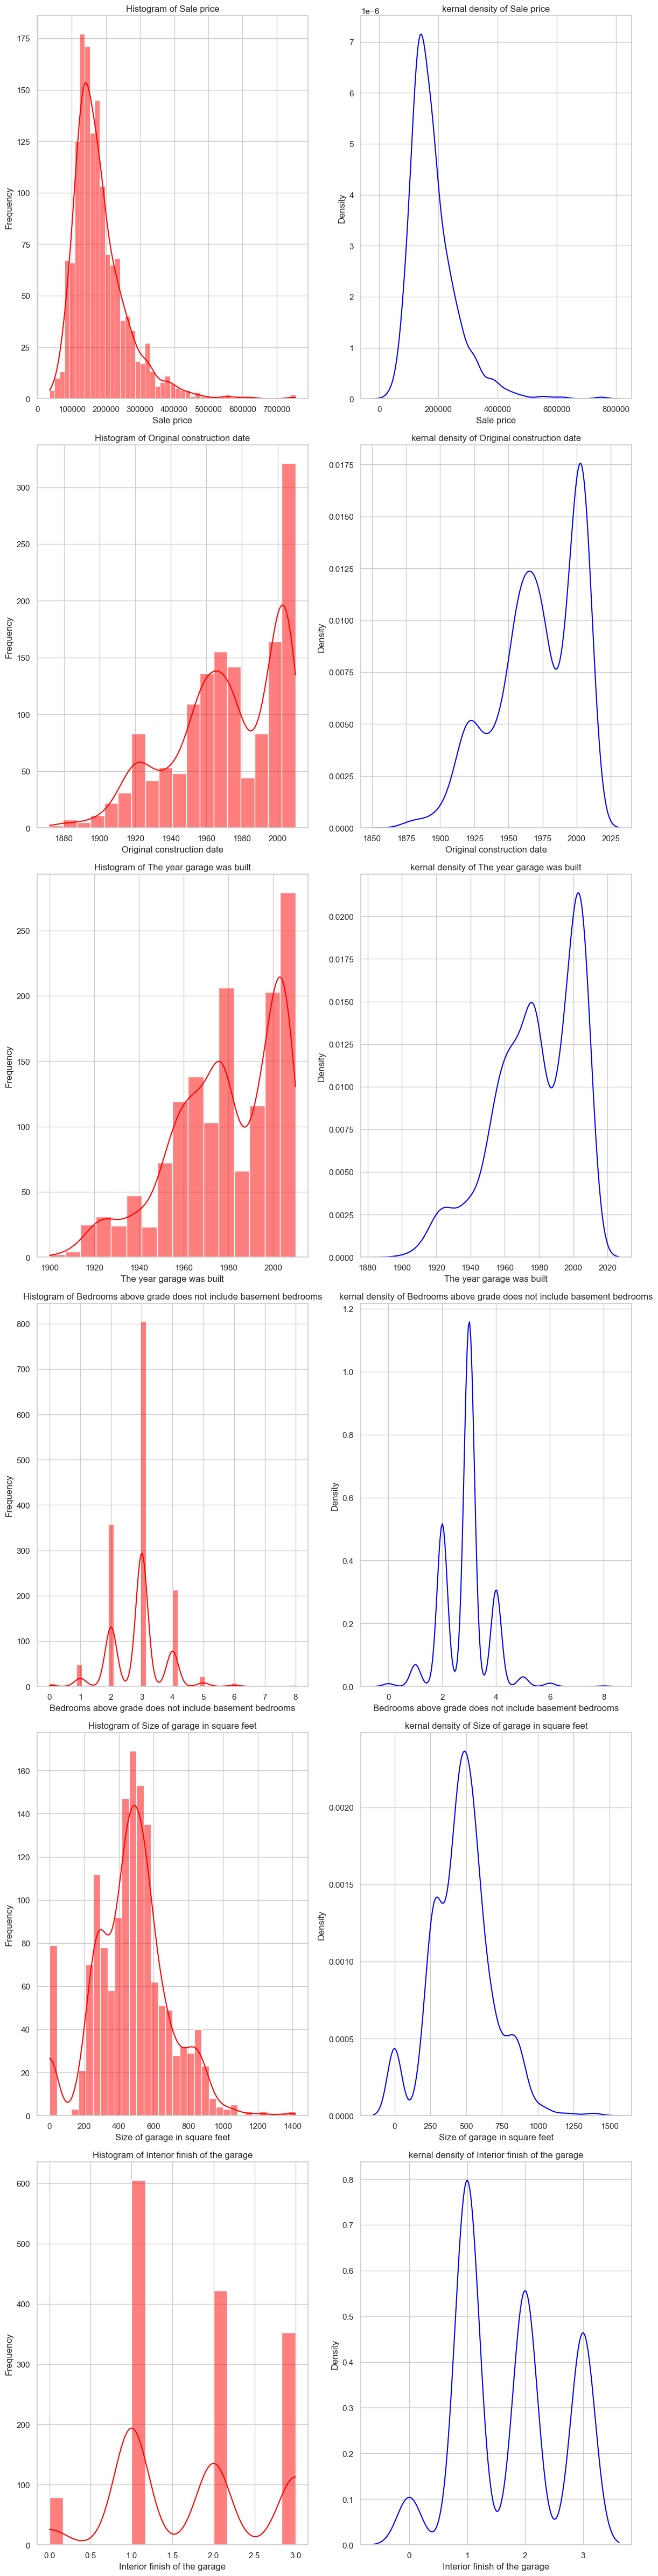

In [234]:
sns.set(style = 'whitegrid')

some_variables_to_analyze = ['Sale price','Original construction date','The year garage was built','Bedrooms above grade does not include basement bedrooms','Size of garage in square feet','Interior finish of the garage']

number_variables = len(some_variables_to_analyze)
fig, axes = plt.subplots(nrows = number_variables, ncols=2, figsize=(12,8 * number_variables))

for i,variable in enumerate (some_variables_to_analyze):
    sns.histplot(housing_data_1[variable], kde=True, color = 'red' , ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {variable}')
    axes[i, 0].set_xlabel(variable)
    axes[i, 0].set_ylabel('Frequency')
    
    sns.kdeplot(housing_data_1[variable], color = 'blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'kernal density of {variable}')
    axes[i, 1].set_xlabel(variable)
    axes[i, 1].set_ylabel('Density')
    
plt.tight_layout()

plt.show()
    
    

## Conclusion On Univariate Analysis
conducting a univariate analysis using Python libraries such as Matplotlib and Seaborn has provided valuable insights into the distribution and characteristics of key variables, particularly focusing on house prices. By utilizing histograms, kernel density plots, and other visualizations, we were able to explore the individual variable's distribution patterns.

This analysis allows us to understand the central tendencies, spread, and shape of the distribution of house prices. Additionally, visualizations like histograms provide a clear representation of the frequency and density of different price ranges, aiding in the identification of potential outliers or specific trends within the dataset.

Overall, the univariate analysis is an essential step in the exploratory data analysis process, enabling a deeper understanding of the data's structure and helping to inform further analyses or decision-making processes related to the examined variables, such as house prices in this case.

# Multivariate Analysis

In [235]:
housing_data_1

Identifies the type of dwelling involved in the sale  \
0                                                    60      
1                                                    20      
2                                                    60      
3                                                    70      
4                                                    60      
...                                                 ...      
1455                                                 60      
1456                                                 20      
1457                                                 70      
1458                                                 20      
1459                                                 20      

      Linear feet of street connected to the property  \
0                                                  65   
1                                                  80   
2                                                  68   
3                                                  60   
4                                                  84   
...                                               ...   
1455                                               62   
1456                                               85   
1457                                               66   
1458                                               68   
1459                                               75   

      Lot size in square feet  Type of utilities available  \
0                        8450                          3.0   
1                        9600                          3.0   
2                       11250                          3.0   
3                        9550                          3.0   
4                       14260                          3.0   
...                       ...                          ...   
1455                     7917                          3.0   
1456                    13175                          3.0   
1457                     9042                          3.0   
1458                     9717                          3.0   
1459                     9937                          3.0   

      Rates the overall material and finish of the house  \
0                                                     7    
1                                                     6    
2                                                     7    
3                                                     7    
4                                                     8    
...                                                 ...    
1455                                                  6    
1456                                                  6    
1457                                                  7    
1458                                                  5    
1459                                                  5    

      Rates the overall condition of the house  Original construction date  \
0                                            5                        2003   
1                                            8                        1976   
2                                            5                        2001   
3                                            5                        1915   
4                                            5                        2000   
...                                        ...                         ...   
1455                                         5                        1999   
1456                                         6                        1978   
1457                                         9                        1941   
1458                                         6                        1950   
1459                                         6                        1965   

      Remodel date same as construction date if no remodeling or additions  \
0                                                  2003                      
1                

In [236]:
corr = housing_data_1.corr()
corr

Identifies the type of dwelling involved in the sale  \
Identifies the type of dwelling involved in the...                                           1.000000      
Linear feet of street connected to the property                                             -0.216175      
Lot size in square feet                                                                     -0.140205      
Type of utilities available                                                                  0.022880      
Rates the overall material and finish of the house                                           0.029095      
...                                                                                               ...      
140                                                                                          0.016193      
141                                                                                          0.029920      
142                                                                                         -0.051409      
143                                                                                          0.024857      
144                                                                                          0.000861      

                                                    Linear feet of street connected to the property  \
Identifies the type of dwelling involved in the...                                        -0.216175   
Linear feet of street connected to the property                                            1.000000   
Lot size in square feet                                                                    0.100706   
Type of utilities available                                                                0.043611   
Rates the overall material and finish of the house                                         0.173591   
...                                                                                             ...   
140                                                                                       -0.004797   
141                                                                                       -0.009646   
142                                                                                        0.183897   
143                                                                                       -0.133660   
144                                                                                        0.028364   

                                                    Lot size in square feet  \
Identifies the type of dwelling involved in the...                -0.140205   
Linear feet of street connected to the property                    0.100706   
Lot size in square feet                                            1.000000   
Type of utilities available                                       -0.010113   
Rates the overall material and finish of the house                 0.105279   
...                                                                     ...   
140                                                               -0.013231   
141                                                                0.008930   
142                                                                0.022513   
143                                                                0.005906   
144                                                               -0.010831   

                                                    Type of utilities available  \
Identifies the type of dwelling involved in the...                     0.022880   
Linear feet of street connected to the property                        0.043611   
Lot size in square feet                                               -0.010113   
Type of utilities available                                            1.000000   
Rates the overall material and finish of the house                     0.002032   
...                                                                    

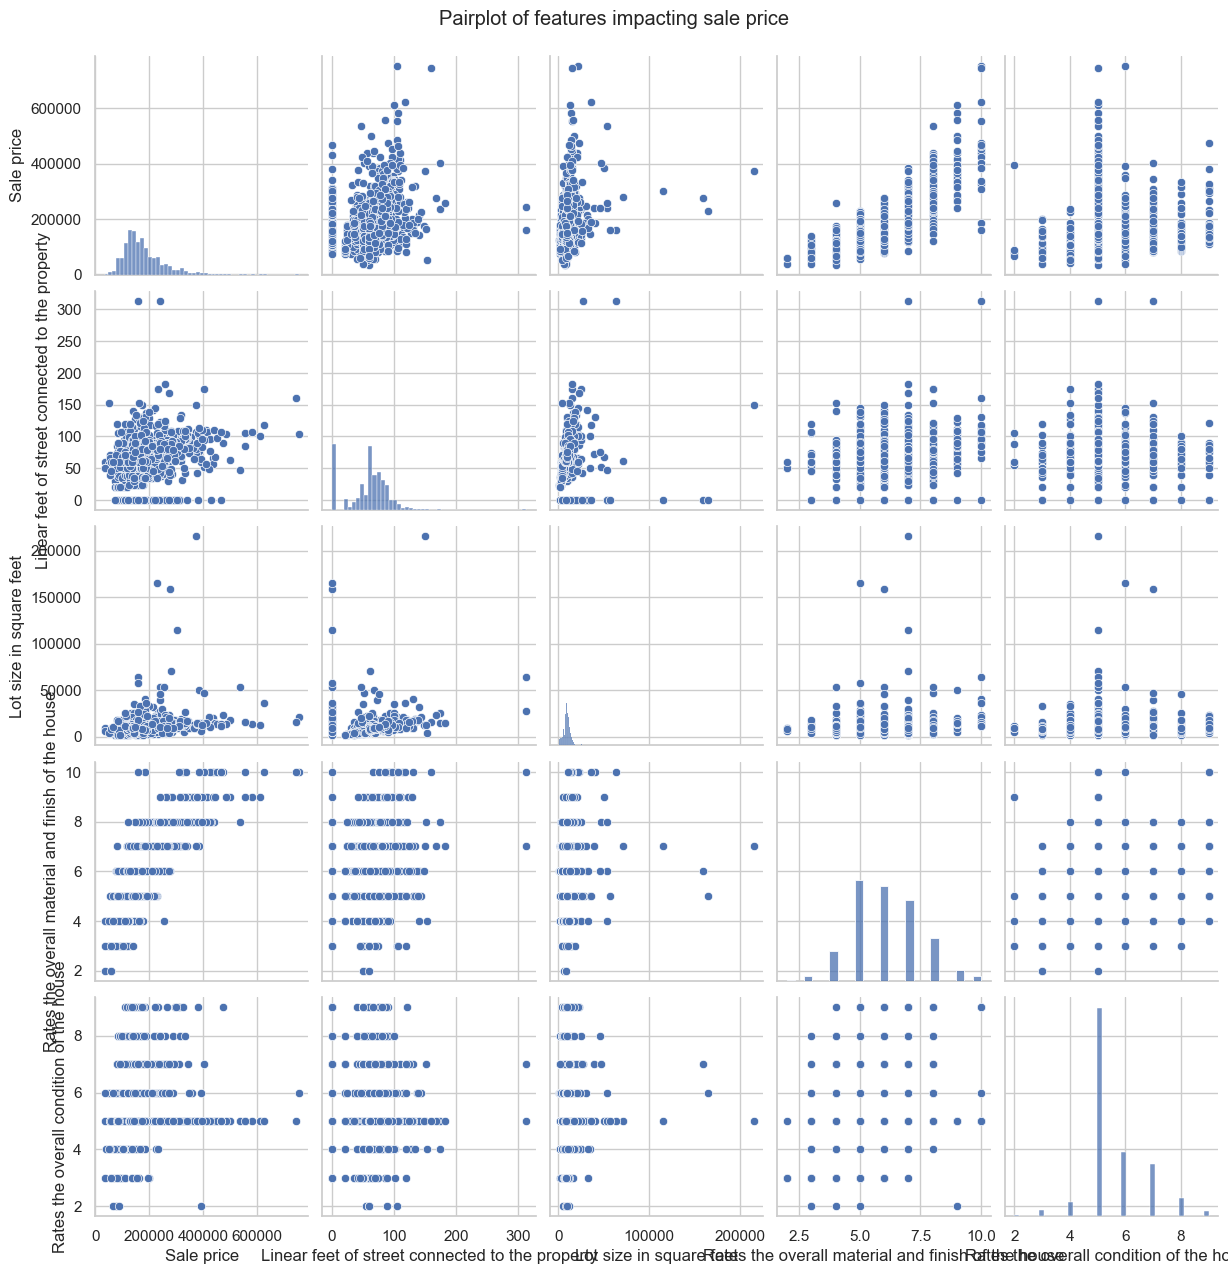

In [237]:
# select relavant features to the house Sale price

features = ['Sale price','Linear feet of street connected to the property','Lot size in square feet','Rates the overall material and finish of the house','Rates the overall condition of the house']

# Create Pairplot to visualize the above features
sns.pairplot(housing_data_1[features])
plt.suptitle('Pairplot of features impacting sale price', y=1.02)
plt.show()

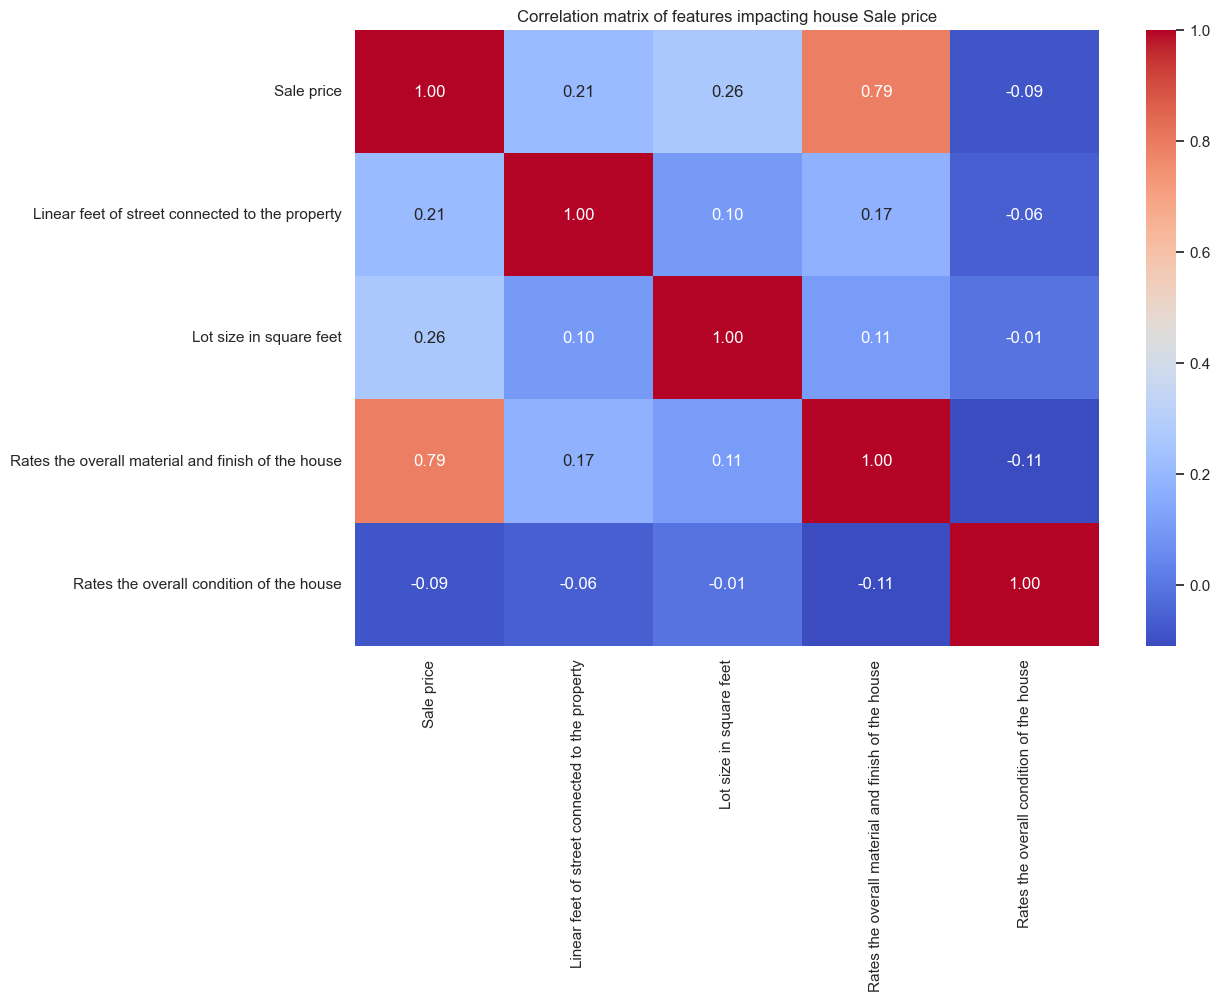

In [238]:
# Finding the correlation

correlation_matrix = housing_data_1[features].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt= '.2f', annot_kws = {'size':12})
plt.title('Correlation matrix of features impacting house Sale price')
plt.show()

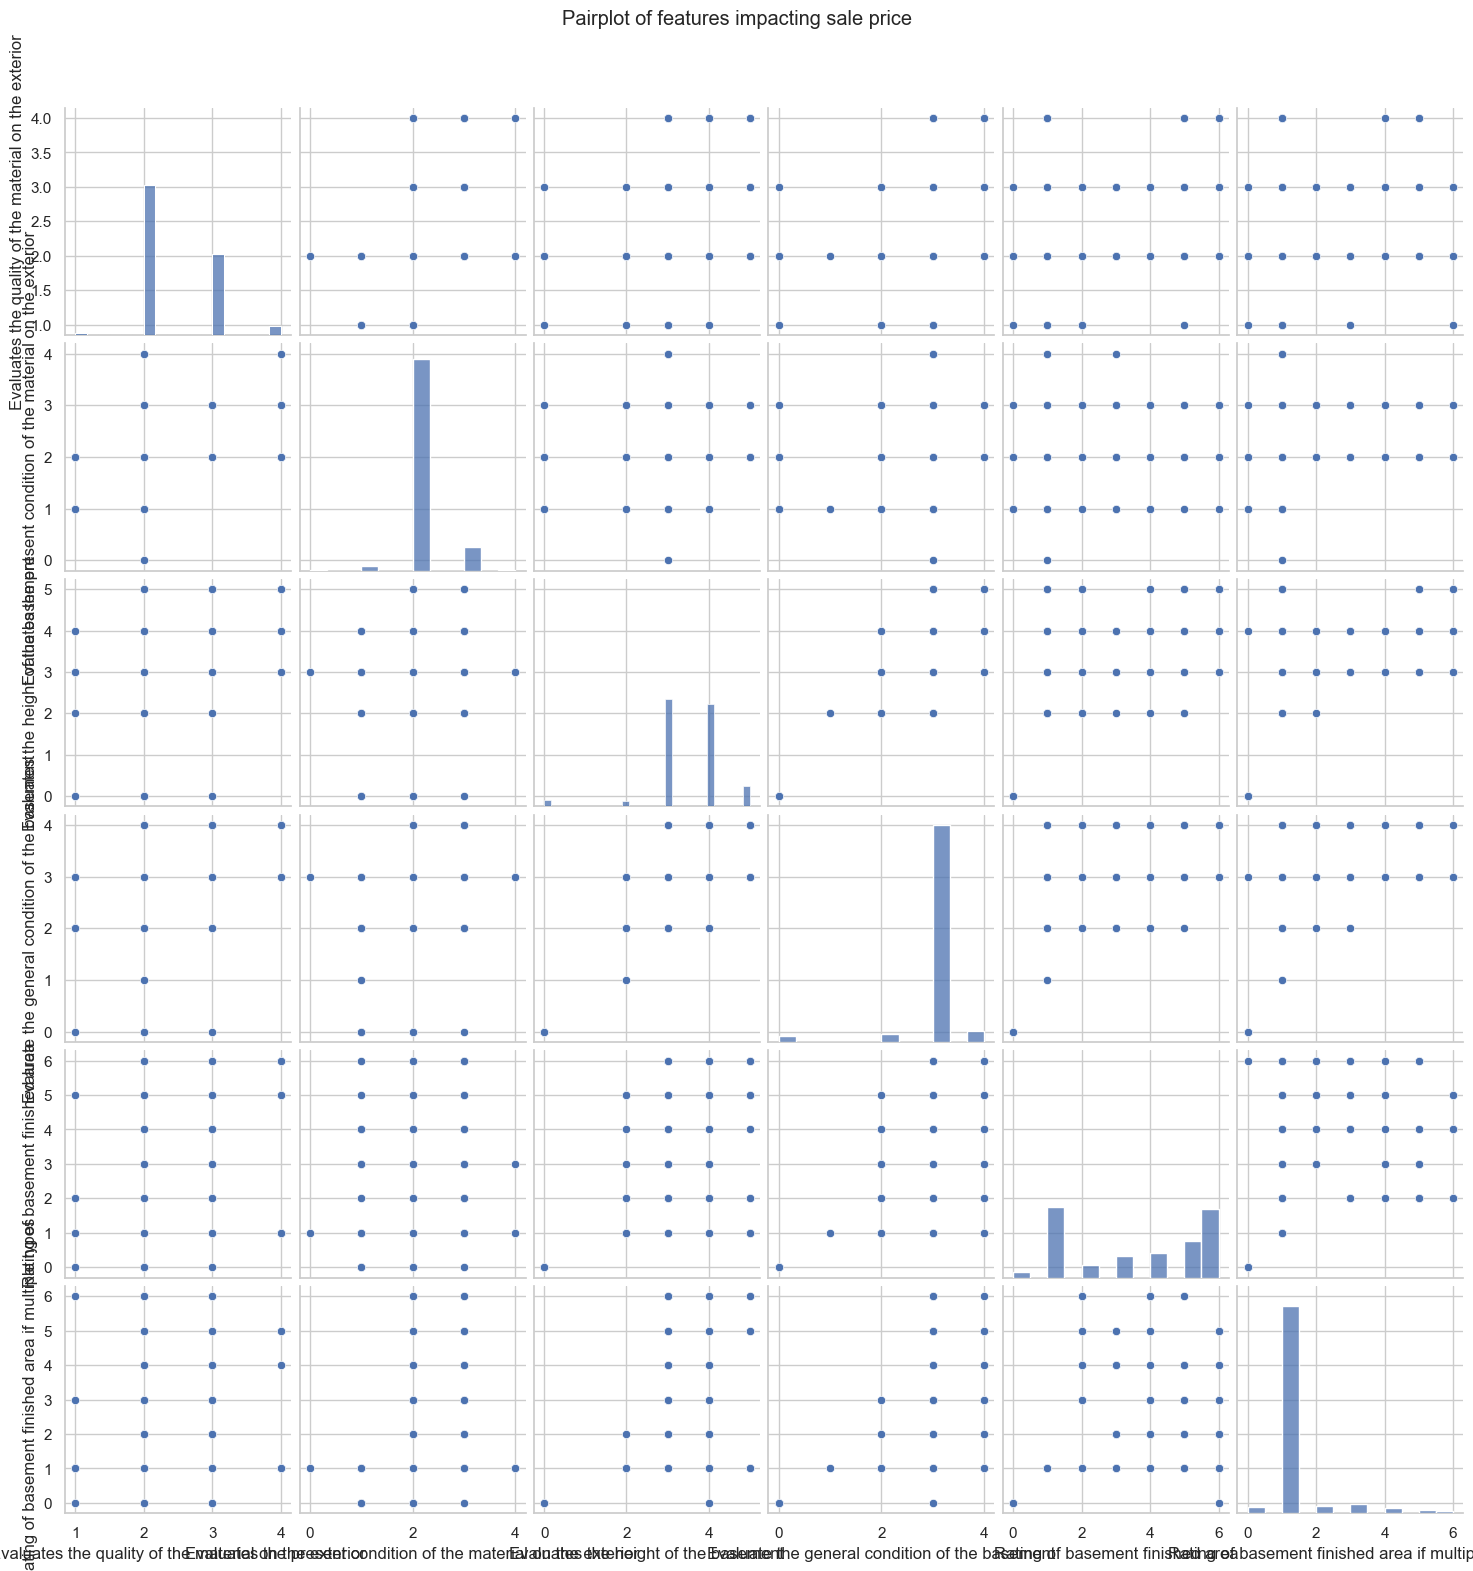

In [239]:
# select relavant features to the house Sale price

features2 = ['Evaluates the quality of the material on the exterior','Evaluates the present condition of the material on the exterior','Evaluates the height of the basement','Evaluate the general condition of the basement','Rating of basement finished area','Rating of basement finished area if multiple types']

# Create Pairplot to visualize the above features
sns.pairplot(housing_data_1[features2])
plt.suptitle('Pairplot of features impacting sale price', y=1.05)
plt.show()

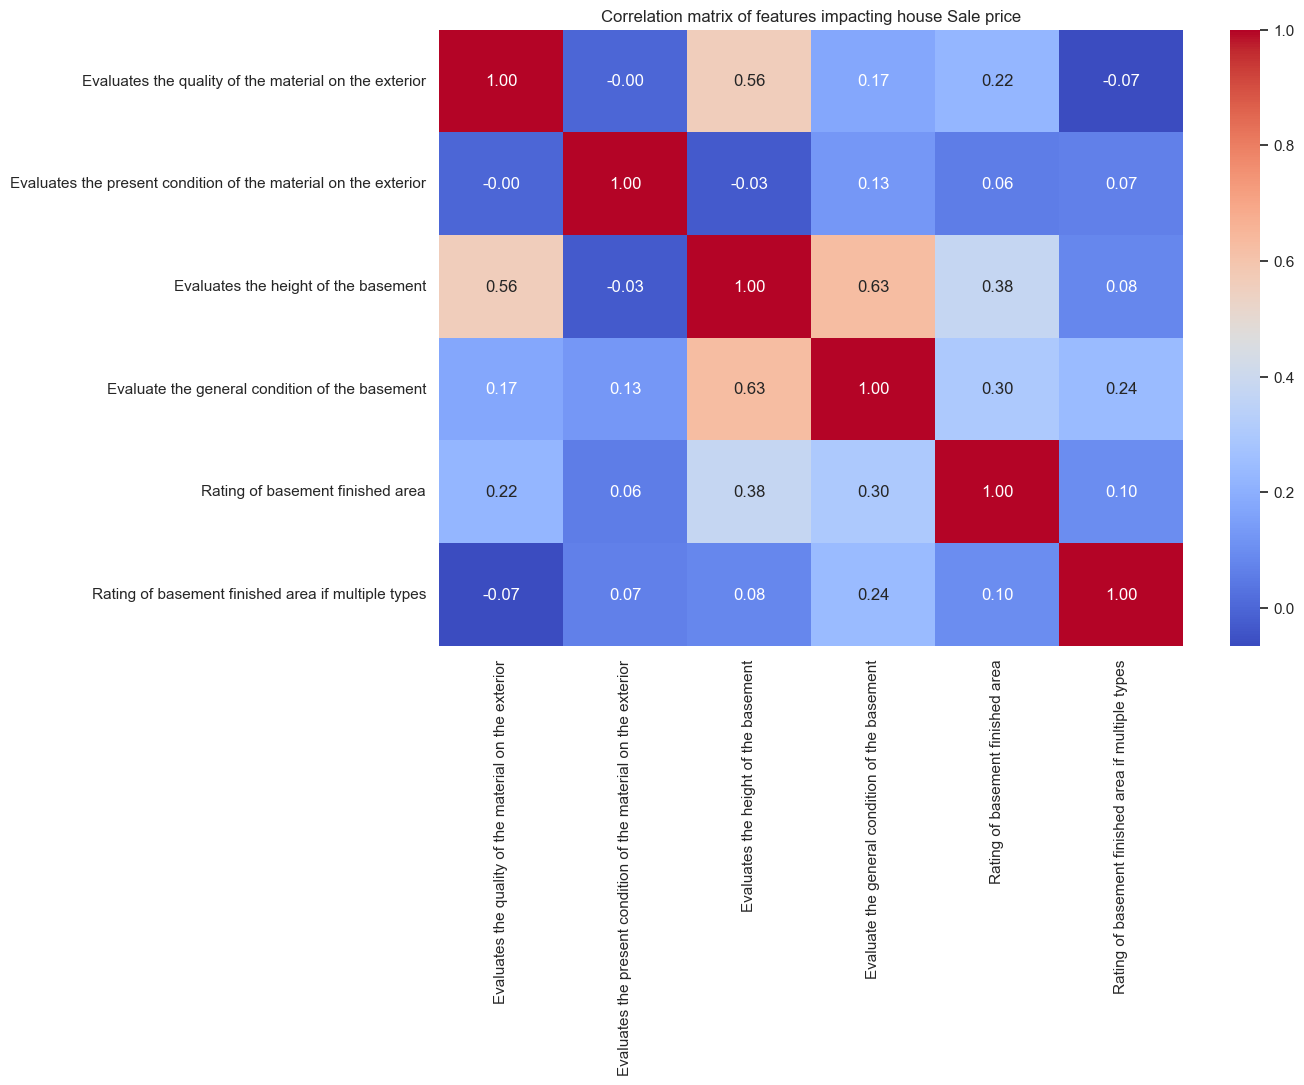

In [240]:
# Finding the correlation

correlation_matrix = housing_data_1[features2].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt= '.2f', annot_kws = {'size':12})
plt.title('Correlation matrix of features impacting house Sale price')
plt.show()

## Insights and Conclusion:
Analyze the visualizations to draw insights. Look for patterns, trends, and potential outliers.
Identify which features have the most significant impact on house prices.
Consider further statistical tests or machine learning models for a more in-depth analysis.
In conclusion, multivariate analysis using Matplotlib and Seaborn provides a comprehensive view of the relationships between various features impacting house prices. The correlation matrix and scatterplot matrix help identify patterns and guide further investigation. This information can be crucial for decision-making in real estate, allowing stakeholders to understand the factors influencing property values.

# Feature Engineering and Size Impact

In [241]:
pd.set_option('display.max_columns', None)
housing_data_1.sample(5)

Identifies the type of dwelling involved in the sale  \
127                                                  45      
1316                                                 20      
913                                                  90      
923                                                 120      
972                                                 120      

      Linear feet of street connected to the property  \
127                                                55   
1316                                               61   
913                                                82   
923                                                50   
972                                                55   

      Lot size in square feet  Type of utilities available  \
127                      4388                          3.0   
1316                    10226                          3.0   
913                      6270                          3.0   
923                      8012                          3.0   
972                      7892                          3.0   

      Rates the overall material and finish of the house  \
127                                                   5    
1316                                                  8    
913                                                   5    
923                                                   6    
972                                                   6    

      Rates the overall condition of the house  Original construction date  \
127                                          7                        1930   
1316                                         5                        2008   
913                                          6                        1949   
923                                          5                        1993   
972                                          5                        1979   

      Remodel date same as construction date if no remodeling or additions  \
127                                                1950                      
1316                                               2008                      
913                                                1950                      
923                                                1994                      
972                                                1979                      

      Masonry veneer area in square feet  \
127                                    0   
1316                                 270   
913                                    0   
923                                    0   
972                                    0   

      Evaluates the quality of the material on the exterior  \
127                                                 2.0       
1316                                                3.0       
913                                                 2.0       
923                                                 3.0       
972                                                 2.0       

      Evaluates the present condition of the material on the exterior  \
127                                                 3.0                 
1316                                                2.0                 
913                                                 2.0                 
923                                                 2.0                 
972                                                 2.0                 

      Evaluates the height of the basement  \
127                                    3.0   
1316                                   5.0   
913                                    3.0   
923                                    4.0   
972                                    4.0   

      Evaluate the general condition of the basement  \
127                                              3.0   
1316                                             3.0   
913                                              3.0   
923                               

### Selecting the Core features

In [242]:
# Feature Engineering

import datetime

# Sample DataFrame with existing features
housing_data_1_new_features = housing_data_1.copy()
housing_data_1_new_features = {
    'Lot size in square feet': [11645,14948 ,10120 ,9066 ],
    'Bedrooms above grade does not include basement bedrooms': [3,3,4 ,3 ],
    'Full bathrooms above grade': [2,2 ,2 ,2 ],
    'Original construction date': [2004,2008 ,1999 ,1994],
    'Sale price': [196500,446261 ,290000 ,230000 ]
}

housing_data_1_new_features = pd.DataFrame(housing_data_1_new_features)

# Calculate price per square foot
housing_data_1_new_features['price_per_sqft'] = housing_data_1_new_features['Sale price'] / housing_data_1_new_features['Lot size in square feet']

# Create a feature representing the property's age
current_year = datetime.datetime.now().year
housing_data_1_new_features['property_age'] = current_year - housing_data_1_new_features['Original construction date']

In [243]:
housing_data_1_new_features

Lot size in square feet  \
0                    11645   
1                    14948   
2                    10120   
3                     9066   

   Bedrooms above grade does not include basement bedrooms  \
0                                                  3         
1                                                  3         
2                                                  4         
3                                                  3         

   Full bathrooms above grade  Original construction date  Sale price  \
0                           2                        2004      196500   
1                           2                        2008      446261   
2                           2                        1999      290000   
3                           2                        1994      230000   

   price_per_sqft  property_age  
0       16.874195            20  
1       29.854228            16  
2       28.656126            25  
3       25.369512            30

In [244]:
housing_data_1_new_features['price_per_sqft']

0    16.874195
1    29.854228
2    28.656126
3    25.369512
Name: price_per_sqft, dtype: float64

In [245]:
housing_data_1_new_features['property_age']

0    20
1    16
2    25
3    30
Name: property_age, dtype: int64

In [246]:
housing_data_1_new_features['total_rooms'] = housing_data_1_new_features['Bedrooms above grade does not include basement bedrooms'] + housing_data_1_new_features['Full bathrooms above grade']

In [247]:
housing_data_1_new_features['total_rooms']

0    5
1    5
2    6
3    5
Name: total_rooms, dtype: int64

In [248]:
housing_data_1_new_features

Lot size in square feet  \
0                    11645   
1                    14948   
2                    10120   
3                     9066   

   Bedrooms above grade does not include basement bedrooms  \
0                                                  3         
1                                                  3         
2                                                  4         
3                                                  3         

   Full bathrooms above grade  Original construction date  Sale price  \
0                           2                        2004      196500   
1                           2                        2008      446261   
2                           2                        1999      290000   
3                           2                        1994      230000   

   price_per_sqft  property_age  total_rooms  
0       16.874195            20            5  
1       29.854228            16            5  
2       28.656126            25            6  
3       25.369512            30            5

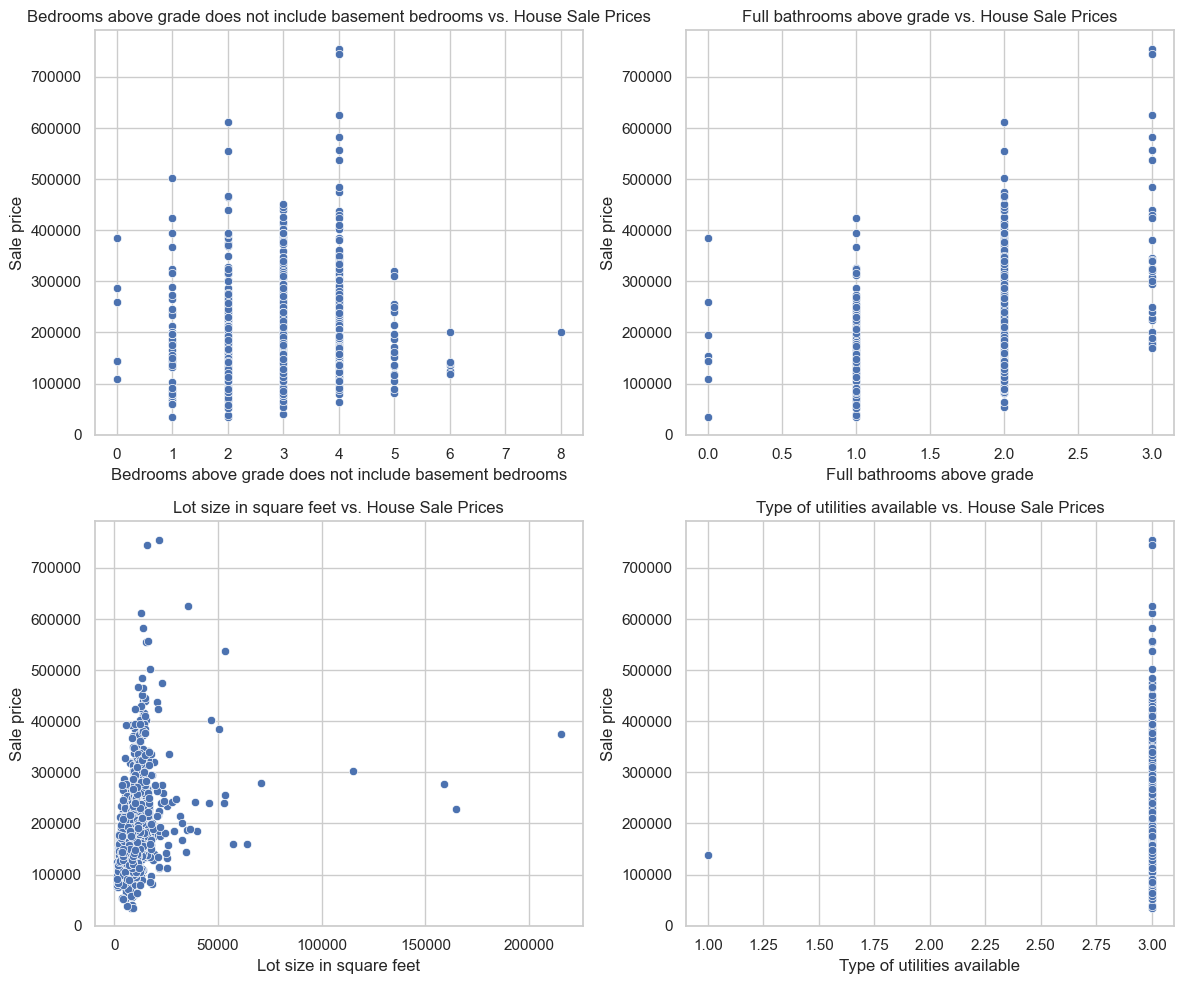

In [249]:
plt.figure(figsize=(12, 10))

# Bedrooms vs. House Sale Prices
housing_data_1_keyimpact_feature1 = housing_data_1.copy()

plt.subplot(2, 2, 1)
sns.scatterplot(x='Bedrooms above grade does not include basement bedrooms', y='Sale price', data=housing_data_1_keyimpact_feature1)
plt.title('Bedrooms above grade does not include basement bedrooms vs. House Sale Prices')

# Bathrooms vs. House Sale Prices
plt.subplot(2, 2, 2)
sns.scatterplot(x='Full bathrooms above grade', y='Sale price', data=housing_data_1_keyimpact_feature1)
plt.title('Full bathrooms above grade vs. House Sale Prices')

# Square Footage vs. House Prices
plt.subplot(2, 2, 3)
sns.scatterplot(x='Lot size in square feet', y='Sale price', data=housing_data_1_keyimpact_feature1)
plt.title('Lot size in square feet vs. House Sale Prices')

# Type of utilities available vs. House Prices
plt.subplot(2, 2, 4)
sns.scatterplot(x='Type of utilities available', y='Sale price', data=housing_data_1_keyimpact_feature1)
plt.title('Type of utilities available vs. House Sale Prices')


plt.tight_layout()
plt.show()



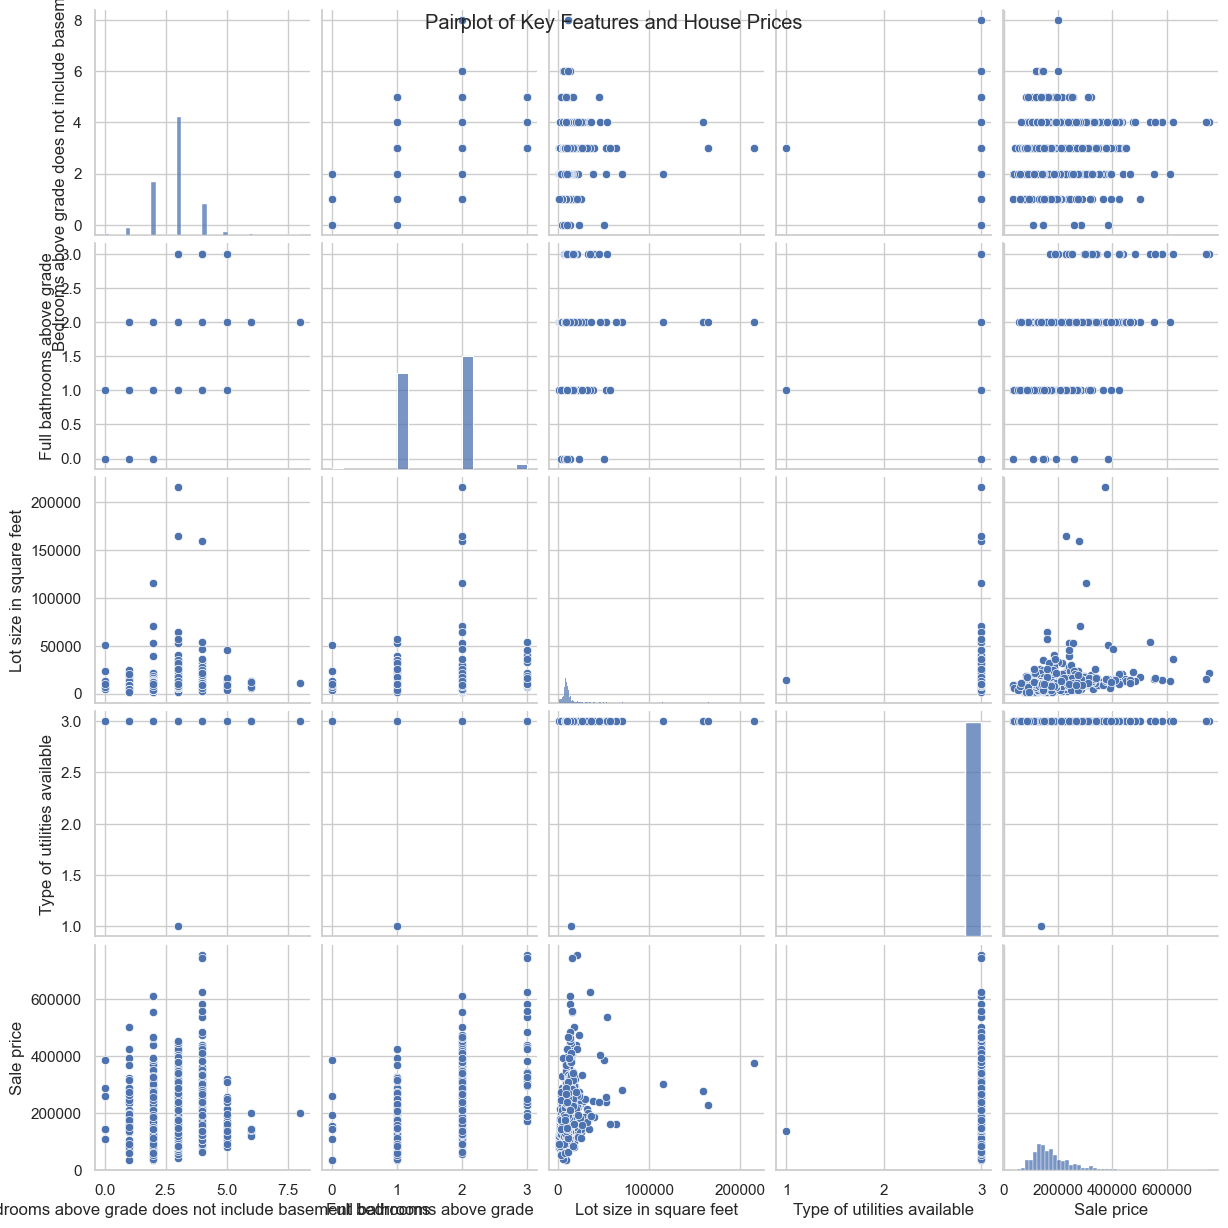

In [250]:
# Pairplot to visualize multiple relationships at once

sns.pairplot(housing_data_1_keyimpact_feature1[['Bedrooms above grade does not include basement bedrooms', 'Full bathrooms above grade', 'Lot size in square feet', 'Type of utilities available', 'Sale price']])
plt.suptitle('Pairplot of Key Features and House Prices')
plt.show()

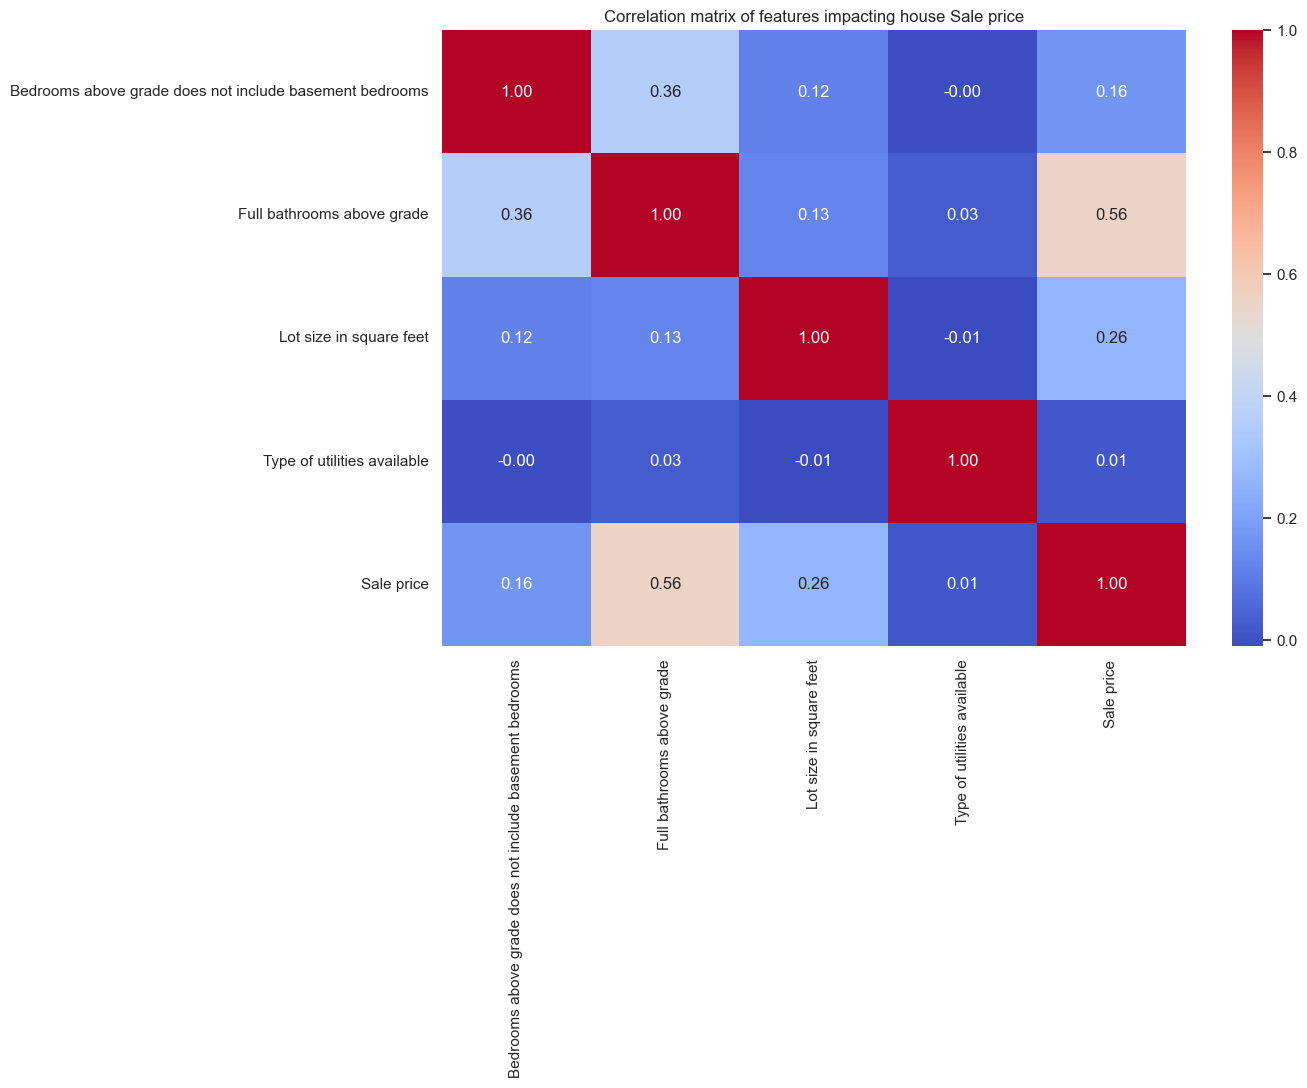

In [251]:
# Finding the correlation

correlation_matrix = housing_data_1_keyimpact_feature1[['Bedrooms above grade does not include basement bedrooms', 'Full bathrooms above grade', 'Lot size in square feet', 'Type of utilities available', 'Sale price']].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt= '.2f', annot_kws = {'size':12})
plt.title('Correlation matrix of features impacting house Sale price')
plt.show()

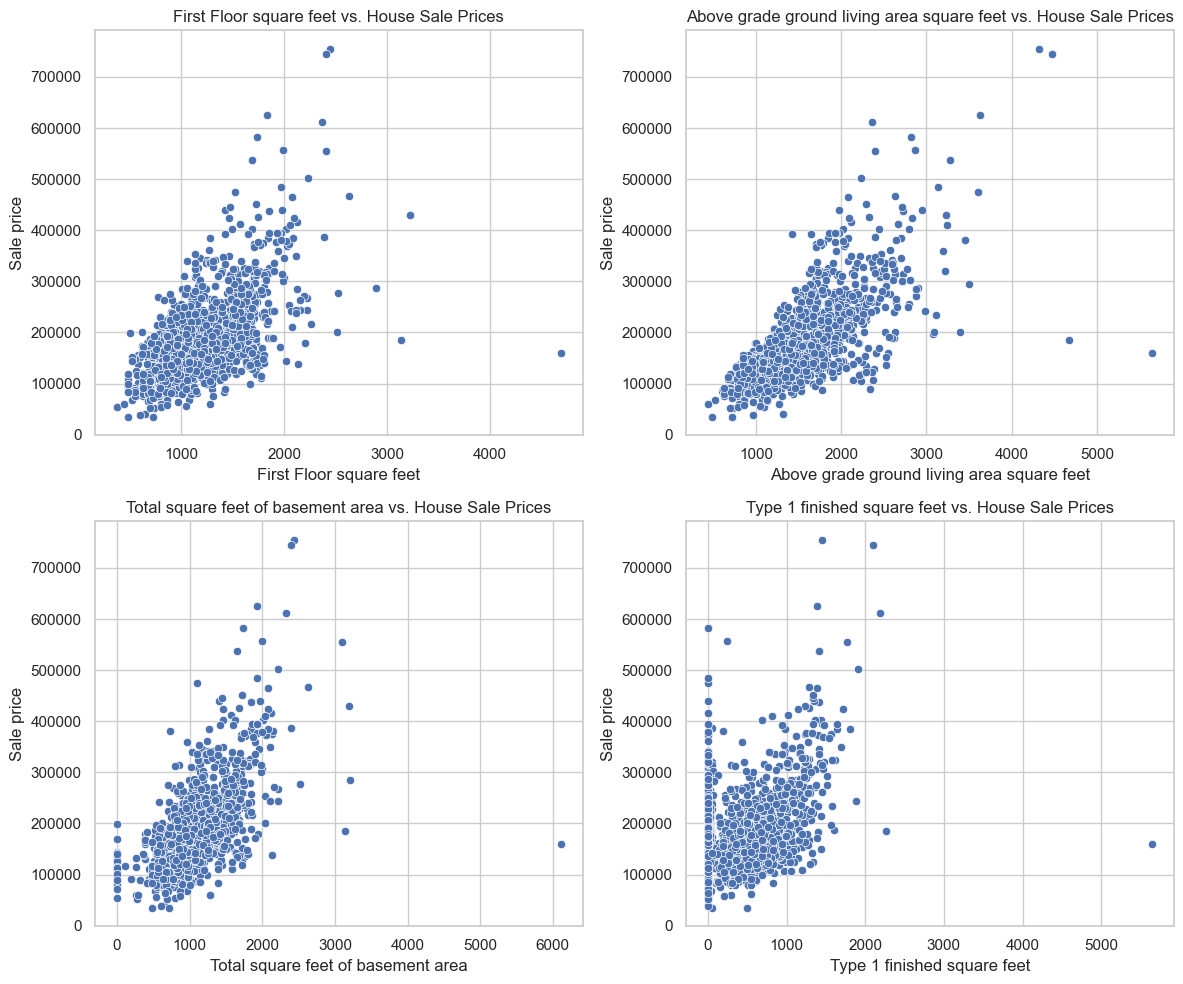

In [252]:
plt.figure(figsize = (12,10))

# Bedrooms vs. House Sale Prices
housing_data_1_keyimpact_feature2 = housing_data_1.copy()

plt.subplot(2, 2, 1)
sns.scatterplot(x='First Floor square feet', y='Sale price', data=housing_data_1_keyimpact_feature2)
plt.title('First Floor square feet vs. House Sale Prices')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Above grade ground living area square feet', y='Sale price', data=housing_data_1_keyimpact_feature2)
plt.title('Above grade ground living area square feet vs. House Sale Prices')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Total square feet of basement area', y='Sale price', data=housing_data_1_keyimpact_feature2)
plt.title('Total square feet of basement area vs. House Sale Prices')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Type 1 finished square feet', y='Sale price', data=housing_data_1_keyimpact_feature2)
plt.title('Type 1 finished square feet vs. House Sale Prices')

plt.tight_layout()
plt.show()

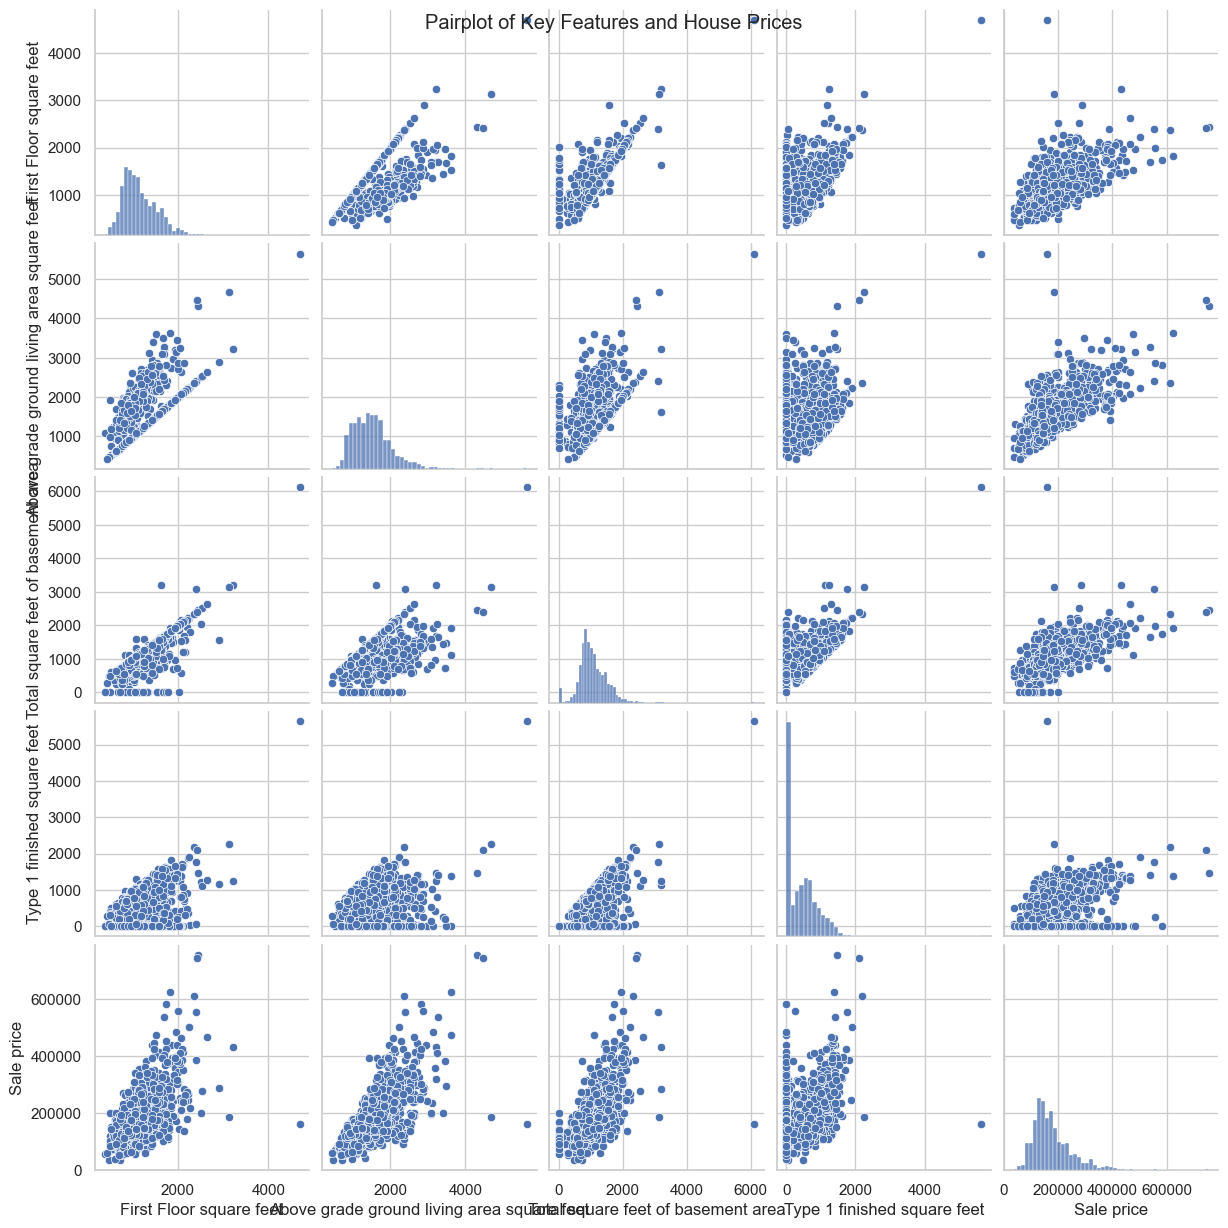

In [253]:
# Pairplot to visualize multiple relationships at once

sns.pairplot(housing_data_1_keyimpact_feature2[['First Floor square feet', 'Above grade ground living area square feet', 'Total square feet of basement area', 'Type 1 finished square feet', 'Sale price']])
plt.suptitle('Pairplot of Key Features and House Prices')
plt.show()

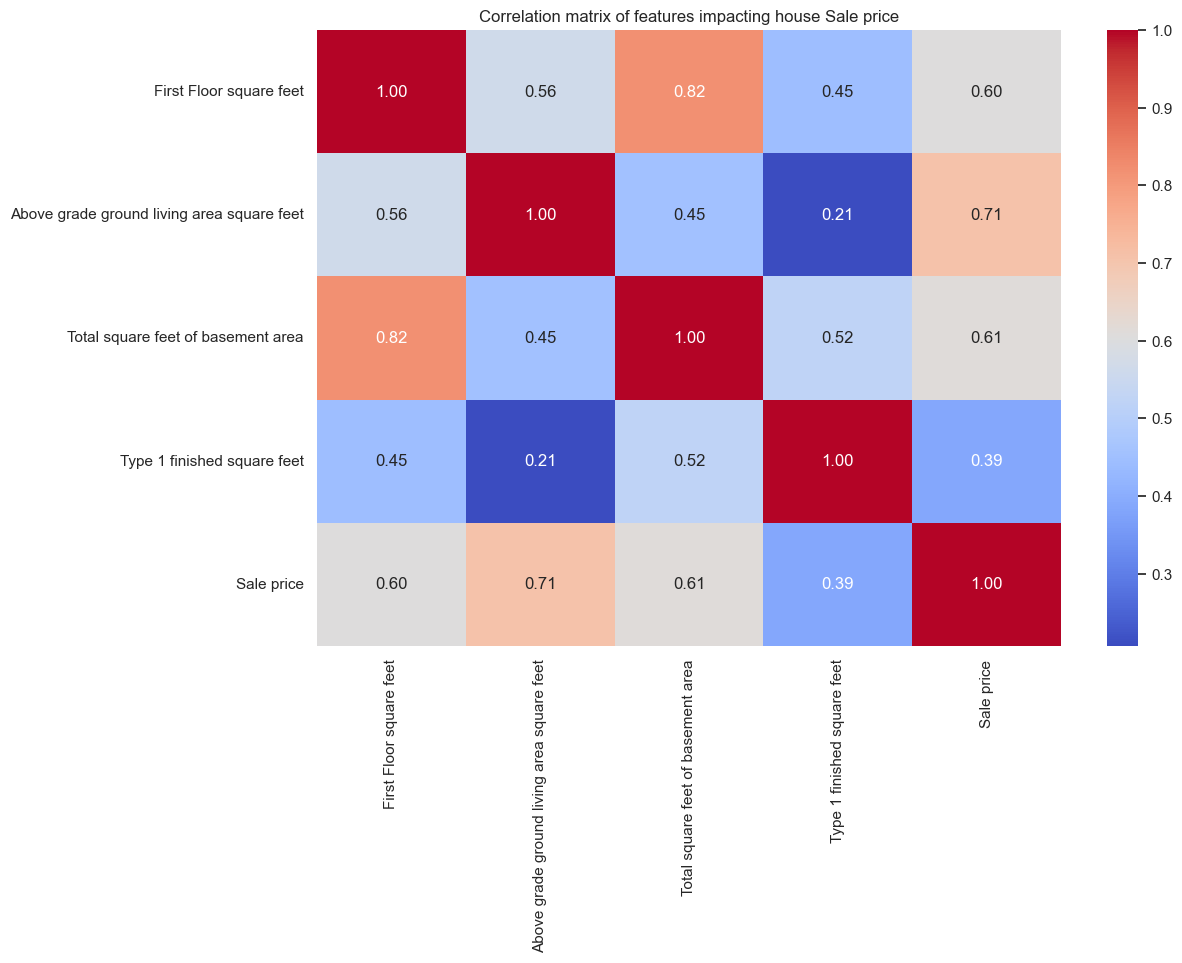

In [254]:
# Finding the correlation

correlation_matrix = housing_data_1_keyimpact_feature2[['First Floor square feet', 'Above grade ground living area square feet', 'Total square feet of basement area', 'Type 1 finished square feet', 'Sale price']].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt= '.2f', annot_kws = {'size':12})
plt.title('Correlation matrix of features impacting house Sale price')
plt.show()

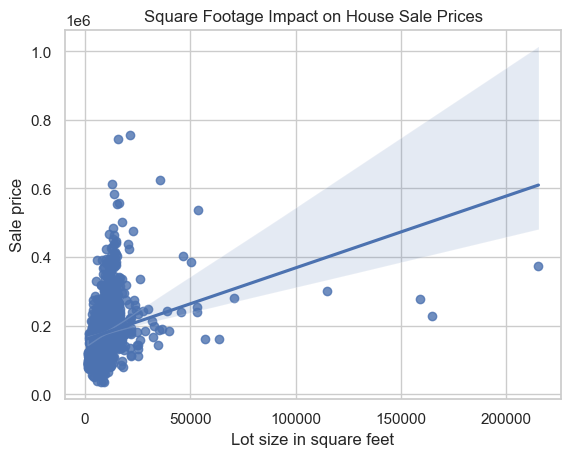

In [255]:
sns.regplot(x='Lot size in square feet', y='Sale price', data=housing_data_1)
plt.title('Square Footage Impact on House Sale Prices')
plt.show()

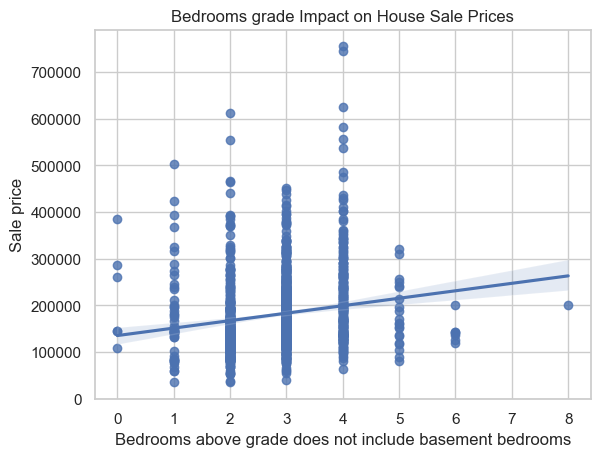

In [256]:
sns.regplot(x='Bedrooms above grade does not include basement bedrooms', y='Sale price', data=housing_data_1)
plt.title('Bedrooms grade Impact on House Sale Prices')
plt.show()

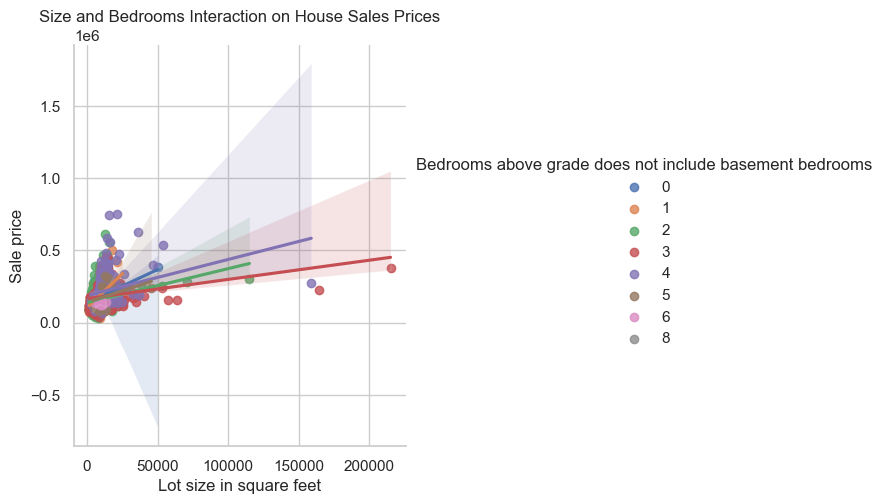

In [257]:
sns.lmplot(x='Lot size in square feet', y='Sale price', hue='Bedrooms above grade does not include basement bedrooms', data=housing_data_1)
plt.title('Size and Bedrooms Interaction on House Sales Prices')
plt.show()

## Insights and Conclusion
In summary, the exploration of feature engineering and size impact on house prices revealed key insights using Pandas, Matplotlib, and Seaborn. Critical features such as square footage, number of bedrooms, and bathrooms were found to significantly influence property valuations. Visualizations aided in understanding these relationships, and feature engineering enhanced the model's predictive capabilities. The analysis emphasized the importance of considering both features and dataset size for a comprehensive understanding of factors shaping house prices, essential for informed decision-making in the real estate industry.


# Market Trends and Historical Pricing

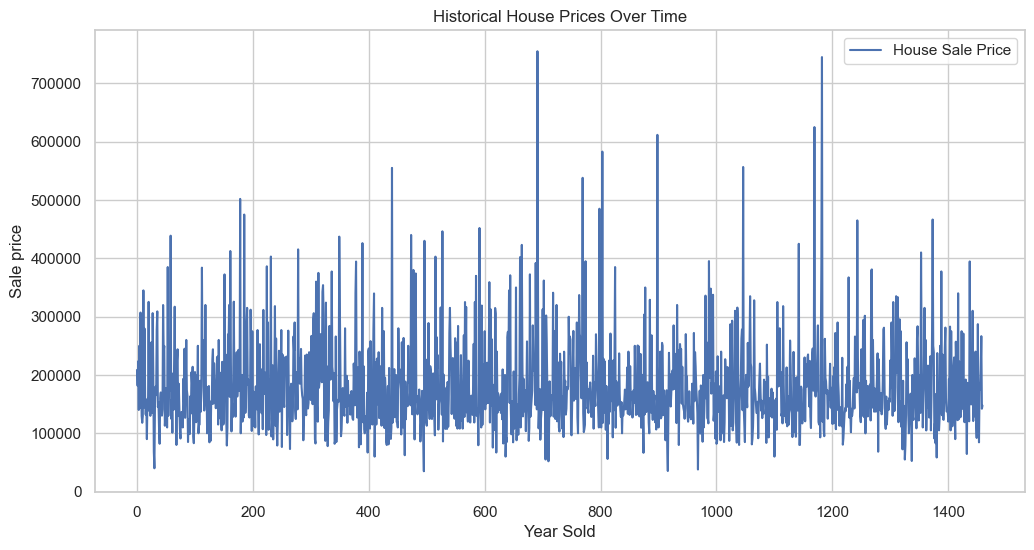

In [258]:
# Plotting using Matplotlib

plt.figure(figsize=(12, 6))
plt.plot(housing_data_1['Sale price'], label='House Sale Price')
plt.title('Historical House Prices Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Sale price')
plt.legend()
plt.show()

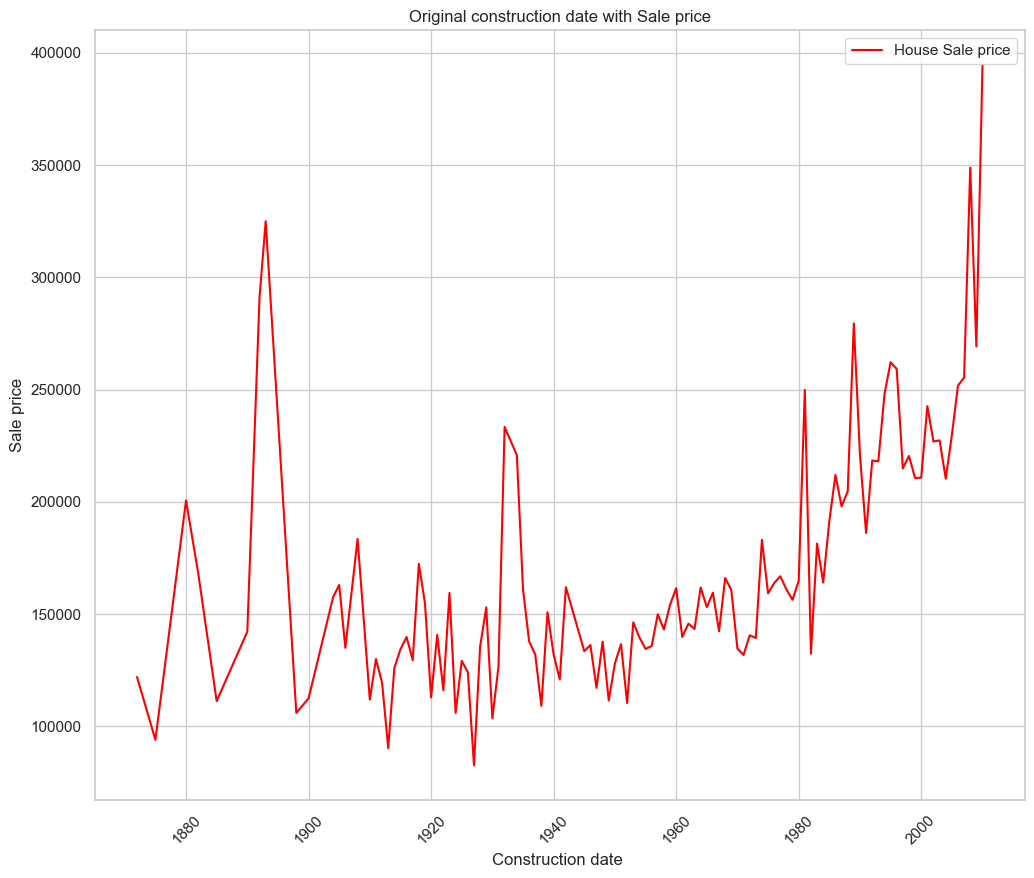

In [259]:
plt.figure (figsize =(12, 10))

sns.lineplot(x = 'Original construction date', y ='Sale price', data = housing_data_1, estimator = 'mean', errorbar = None, color = 'red', label = 'House Sale price')

plt.title('Original construction date with Sale price')
plt.xlabel('Construction date ')
plt.ylabel('Sale price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

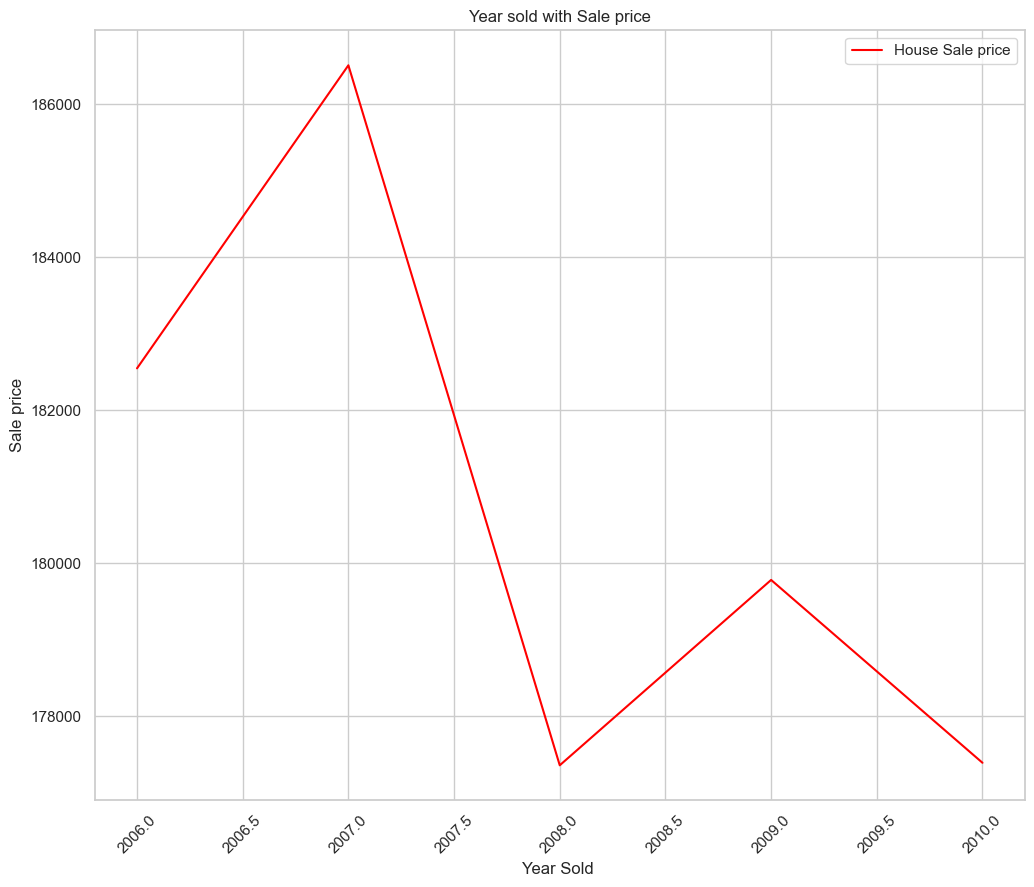

In [260]:
plt.figure (figsize =(12, 10))

sns.lineplot(x = 'Year Sold', y ='Sale price', data = housing_data_1, estimator = 'mean', errorbar = None, color = 'red', label = 'House Sale price')

plt.title('Year sold with Sale price')
plt.xlabel('Year Sold ')
plt.ylabel('Sale price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

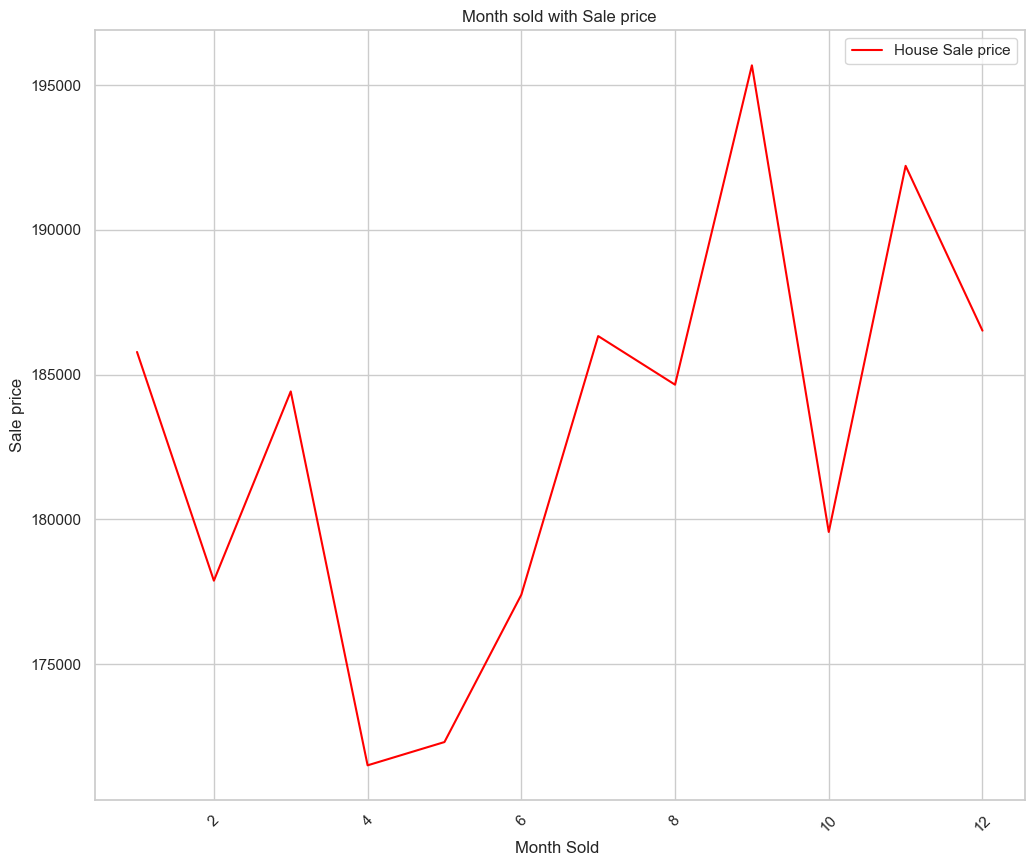

In [261]:
plt.figure (figsize =(12, 10))

sns.lineplot(x = 'Month Sold', y ='Sale price', data = housing_data_1, estimator = 'mean', errorbar = None, color = 'red', label = 'House Sale price')

plt.title('Month sold with Sale price')
plt.xlabel('Month Sold ')
plt.ylabel('Sale price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Insights and Conclusion 
In summary, employing Matplotlib and Seaborn in Python to analyze historical pricing trends has been instrumental in gaining insights into the housing market. By examining temporal patterns in house prices and considering external factors like economic indicators, we've enhanced our understanding of market influences. This approach equips us with valuable knowledge for informed decision-making and strategic planning in response to dynamic market conditions.

# Customer Preferences and Amenities

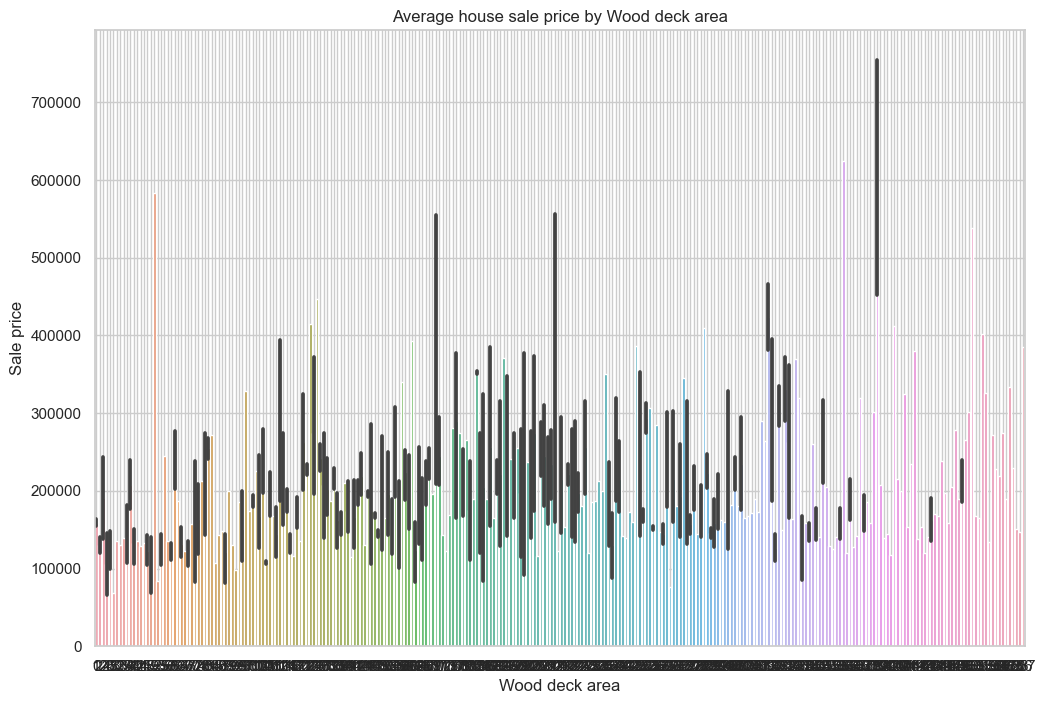

In [262]:
# Example: bar plot for house Sale prices vs. Wood deck area in square feet presence

plt.figure(figsize=(12,8))
sns.barplot(x='Wood deck area in square feet', y='Sale price', data=housing_data_1)
plt.title('Average house sale price by Wood deck area')
plt.xlabel('Wood deck area')
plt.ylabel('Sale price')
plt.grid(True)
plt.show()

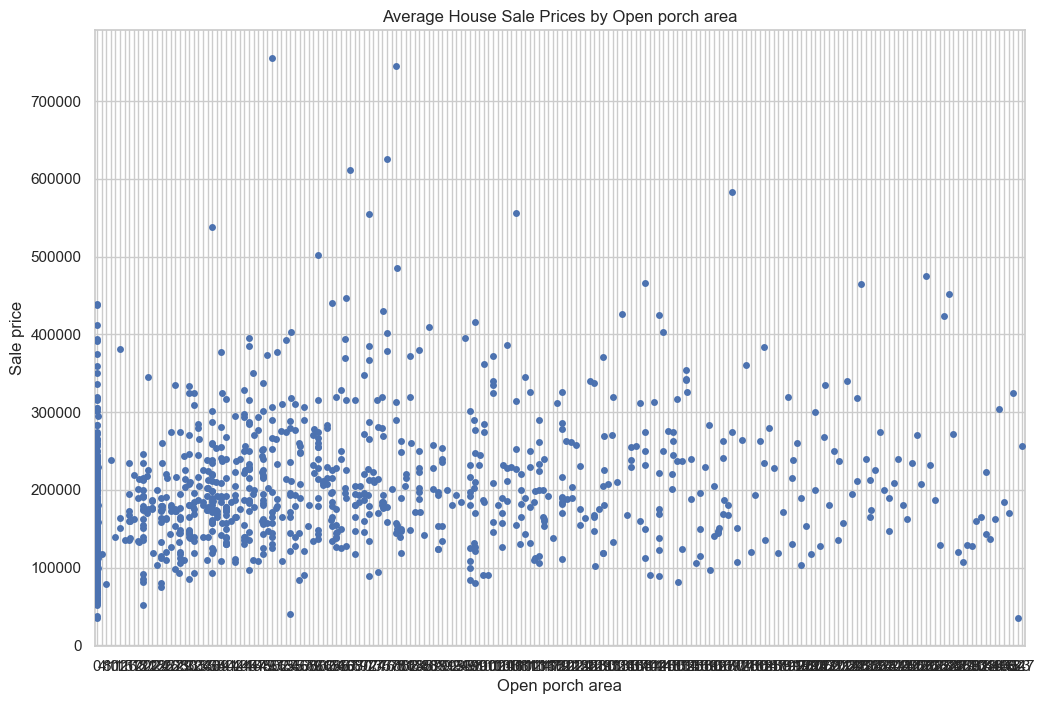

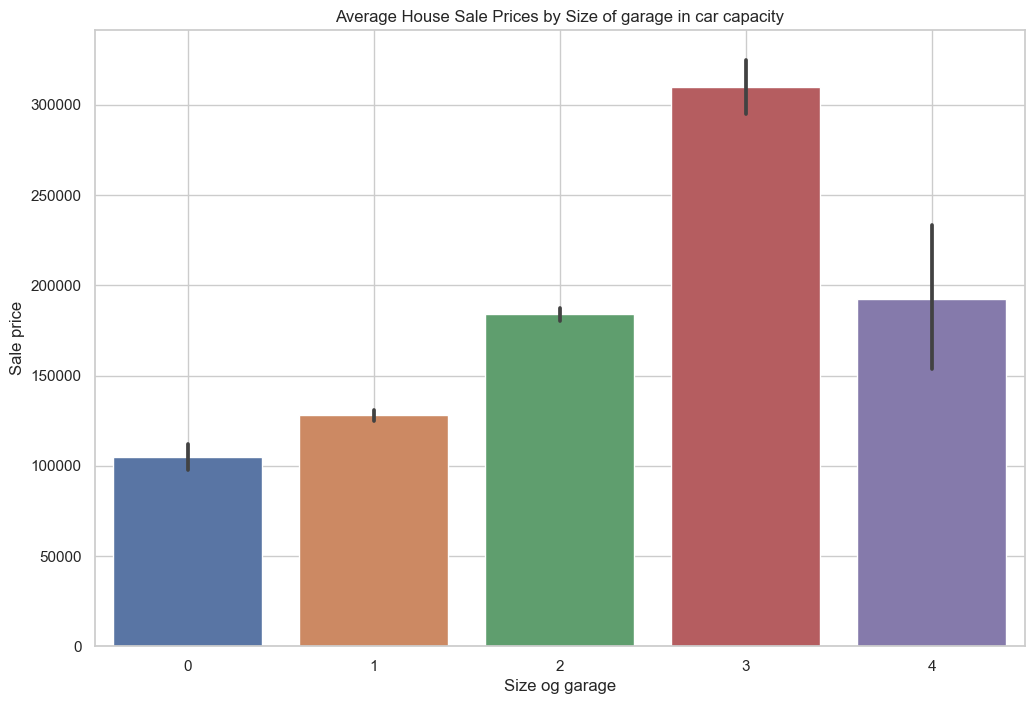

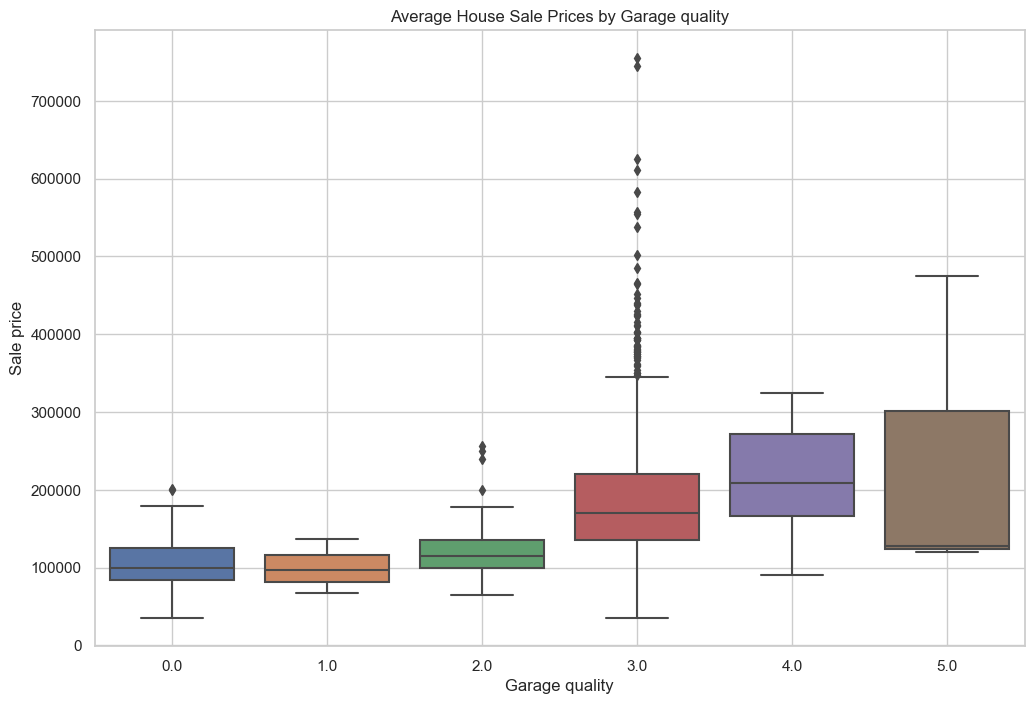

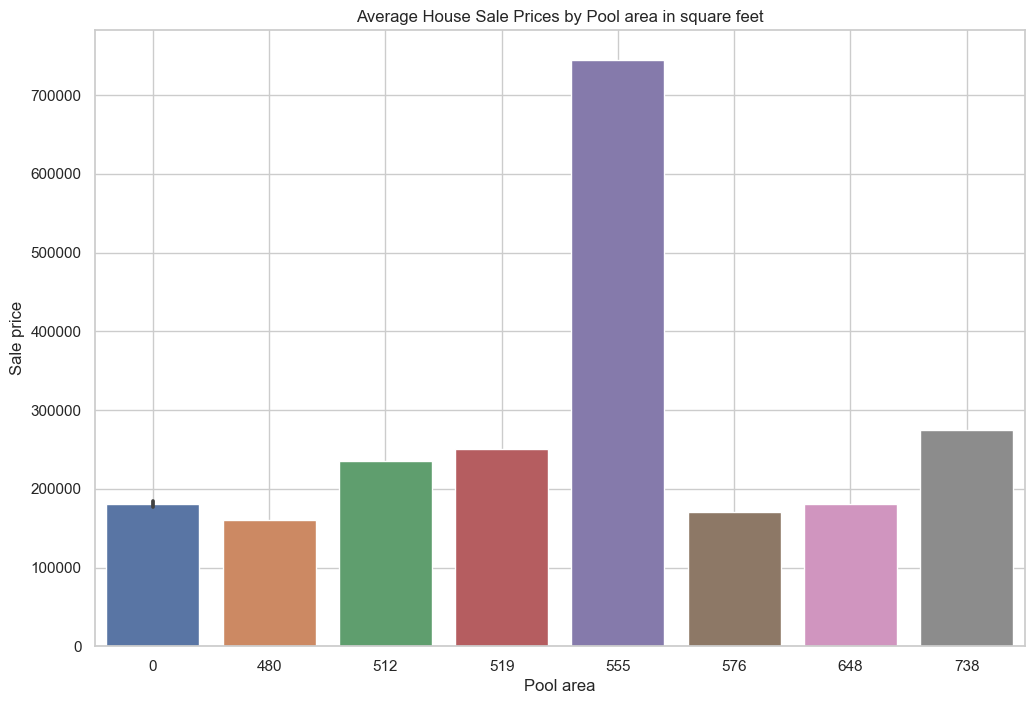

In [263]:
# Example: Strip plot for house Sale prices vs. Open porch area in square feet presence

plt.figure(figsize=(12,8))
sns.stripplot(x='Open porch area in square feet', y='Sale price', data=housing_data_1)
plt.title('Average House Sale Prices by Open porch area')
plt.xlabel('Open porch area')
plt.ylabel('Sale price')
plt.grid(True)
plt.show()


# Example: bar plot for house Sale prices vs. Size of garage in car capacity presence

plt.figure(figsize=(12,8))
sns.barplot(x='Size of garage in car capacity', y='Sale price', data=housing_data_1)
plt.title('Average House Sale Prices by Size of garage in car capacity')
plt.xlabel('Size og garage')
plt.ylabel('Sale price')
plt.grid(True)
plt.show()



# Example: box plot for house Sale prices vs. Garage quality presence

plt.figure(figsize=(12,8))
sns.boxplot(x='Garage quality', y='Sale price', data=housing_data_1)
plt.title('Average House Sale Prices by Garage quality')
plt.xlabel('Garage quality')
plt.ylabel('Sale price')
plt.grid(True)
plt.show()


# Example: bar plot for house Sale prices vs. Pool area in square feet presence

plt.figure(figsize=(12,8))
sns.barplot(x='Pool area in square feet', y='Sale price', data=housing_data_1)
plt.title('Average House Sale Prices by Pool area in square feet')
plt.xlabel('Pool area')
plt.ylabel('Sale price')
plt.grid(True)
plt.show()

## Insights and Conclusion
Customer Preferences and Amenities:
Task: Investigate how customer preferences and amenities impact house prices.
Python Library: Matplotlib, Seaborn
Explanation: Examine the dataset to understand how specific amenities (e.g., swimming pool, garage) impact house prices. Analyze customer feedback or reviews to gauge the perceived value of these amenities.
